# Content

## 1. Sales
1.1 [EDA](https://colab.research.google.com/drive/1io5VNWHmiDmn_rg9bKa1j0H6LqDNS4NR)  
1.2 [SPC](https://colab.research.google.com/drive/1PbqfbITrbjdQzJAGWF3PSCasTG7g7Wzy#scrollTo=3ON5yj9YfXxk)  
1.3 [FC](https://colab.research.google.com/drive/1hu78fzV_VS4bXGMnkidhgh9fPP1kFGWl#scrollTo=PeJZJm4YYtJ5)  
1.4 [Data Mining and RFM](https://colab.research.google.com/drive/1h28pnMQc8uKE8WTVBPwbWj7R1Tv3dx34)  
1.5 [Dashboard](https://colab.research.google.com/drive/1p8vbCfD991t8-4srvKDEm7souyviOzcQ#scrollTo=RCYNS8i8h4sa)  
1.6 [Market Basket](https://colab.research.google.com/drive/1iTeN6MO9LOQSy5rBdypyqJXe3nZX8DxR)  
1.7 [Collaborative Filtering](https://colab.research.google.com/drive/1JoeBe9Lz-47EhuuJ8FRRArUSxjOH0-Xd)  
1.8 [Hybrid Recommender](https://colab.research.google.com/drive/1urcbHXMQKsSpFjGUk8pj5AHgC076zM4d)  
1.9 Churn Prediction

# Von der Analyse zur Vorhersage
Nachdem wir in den vorherigen Kapiteln zunächst mit Exploratory Data Analysis (EDA) einen tiefen Einblick in unsere Daten gewonnen und im Anschluss mithilfe von Anomalieerkennung sowie Statistischer Prozessregelung (SPC) Unregelmäßigkeiten und Prozessabweichungen identifiziert haben, richten wir nun den Blick nach vorn.

Vorhersagen (Forecasting) sind letztlich der zentrale Anwendungsbereich von Machine Learning. Ziel ist es, zukünftige Entwicklungen auf Basis historischer Daten möglichst präzise zu prognostizieren. Dies kann für unterschiedlichste Fragestellungen entscheidend sein – von der Absatzplanung in Unternehmen, über die Wartungsplanung in der Industrie bis hin zur Energiebedarfsprognose.

## Warum Forecasts wichtig sind  
In einer datengetriebenen Welt reicht es nicht aus, nur den aktuellen Zustand zu kennen. Unternehmen müssen fundierte Entscheidungen treffen, bevor Ereignisse eintreten. Präzise Vorhersagen helfen dabei:

- Risiken zu minimieren, indem Engpässe oder Ausfälle frühzeitig erkannt werden

- Ressourcen optimal zu planen, etwa in Produktion, Logistik oder Personalplanung

- Wettbewerbsvorteile zu sichern, indem man schneller und proaktiver handelt als der Markt

- Kosten zu senken, durch vorausschauende Wartung (Predictive Maintenance) oder optimierte Bestandsführung

## Vom historischen Muster zur Zukunftsprojektion
Der Übergang von der Analyse zur Prognose erfordert ein fundiertes Verständnis der Datenstruktur. Dieses Verständnis festigen wir in diesem Kapitel durch statistische Modelle, mit deren Hilfe wir z.B. saisonale Effekte, Trends und zufällige Schwankungen identifizieren, was zu einer höheren Nachvollziehbarkeit führt. Zudem gehen wir darauf ein, wie man mit Unsicherheiten in Vorhersagen umgeht und wie sich Konfidenzintervalle (siehe auch Kapitel 2) interpretieren lassen. Anschließend werden wir dem statistischen Modell die Wirkungsweise eines maschinellen Lernmodells gegenüberstellen.

## Methodische Grundlagen
In diesem Kapitel beleuchten wir sowohl klassische statistische Verfahren als auch moderne Machine-Learning-Ansätze für Vorhersagen und deren Evaluierungsmetriken. Dazu gehören unter anderem:

- Zeitreihenanalyse mit Modellen wie ARIMA, SARIMA oder Exponential Smoothing

- Feature-basierte machine learning Modelle

- Evaluierungsmethoden wie MAE, RMSE oder MAPE zur objektiven Bewertung der Vorhersagequalität

Wir werden lernen, wie sich Daten für Forecasts vorbereiten, Modelle trainieren, validieren und optimieren lassen. Stets mit dem Ziel, nicht nur ein funktionierendes, sondern auch ein robustes und möglichst erklärbares Vorhersagemodell zu erhalten.  
  


Kapitel 1:
Begrifflichkeiten, die in diesem Kapitel neu sind:
- Dataframe
- Deskriptive Statistik
- Visualisierungen: Histogramme (Verteilungen)

Bibliotheken, die in diesem Kapitel neu sind:
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Plotly
- Pandas Profiling

Kapitel 2: Begrifflichkeiten, die in diesem Kapitel neu sind:
- Statistische Prozessregelung
- Ausreisser / Anomalien / Rauschen

Bibliotheken, die in diesem Kapitel neu sind:
- Plotly Express
- Statsmodels
- Fbprophet


Kapitel 3: Begrifflichkeiten, die in diesem Kapitel neu sind:
- Lineare Regression
- Konvergenz
- SARIMA

Bibliotheken, die in diesem Kapitel neu sind:
- Sklearn
- Tensorflow
- Scipy



In [ ]:
import pandas as pd
df = pd.read_excel("https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx")
df.head()

SalesDate  SalesValue  SalesAmount  Customer  SalesTransactionID  SalesItem
0 2018-09-28      8280.0           10         0                   0          0
1 2018-09-28      7452.0           10         0                   0          0
2 2019-04-23     21114.0           30         0                   1          0
3 2019-04-23      7038.0           10         0                   1          1
4 2019-04-23      7000.0            2         0                   1          2

# Vorhersage der Umsätze

## Baseline: Einfache lineare Regression (Statistisches Modell)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the specified URL
df = pd.read_excel("https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx")

# Drop unnecessary columns to focus on time series analysis
dfGrouped = df.drop(columns=['SalesValue', 'Customer', 'SalesTransactionID', 'SalesItem'])

# Convert 'SalesDate' to datetime objects for time-based operations
dfGrouped['SalesDate'] = pd.to_datetime(dfGrouped['SalesDate'])

# Set 'SalesDate' as the index for resampling
dfGrouped = dfGrouped.set_index('SalesDate')

# Resample the data to get the sum of 'SalesQuantity' for the start of each month ('MS')
monthly_df = dfGrouped.resample('MS').sum()

# Reset the index to turn the date index back into a column and drop any potential missing rows
d_df = monthly_df.reset_index().dropna()

# Rename columns to 'ds' (datestamp) and 'y' (value) for convention
d_df.columns = ['ds', 'y']

# This converts the date into a number that can be used for calculation, so we have a numerical feature for the regression.
d_df['time'] = d_df['ds'].map(pd.Timestamp.toordinal)


Nun berechnen wir manuell die lineare Regression. Es geht darum,  der Variable Zeit (X) die Variable Umsätze (y) gegenüberzustellen.   
Genauer gesagt ist Zeit die unabhängige Variable und Umsätze die abhängige Variable, die in Abhängigkeit von der Zeit vorhergesagt werden soll.  
Im ML- Kontext würde man von Feature (X) und Target (y) sprechen, wie wir später noch sehen werden.

Manual calculation complete.
Intercept (b0): -5694927.79
Slope/Coefficient (b1): 7.8143


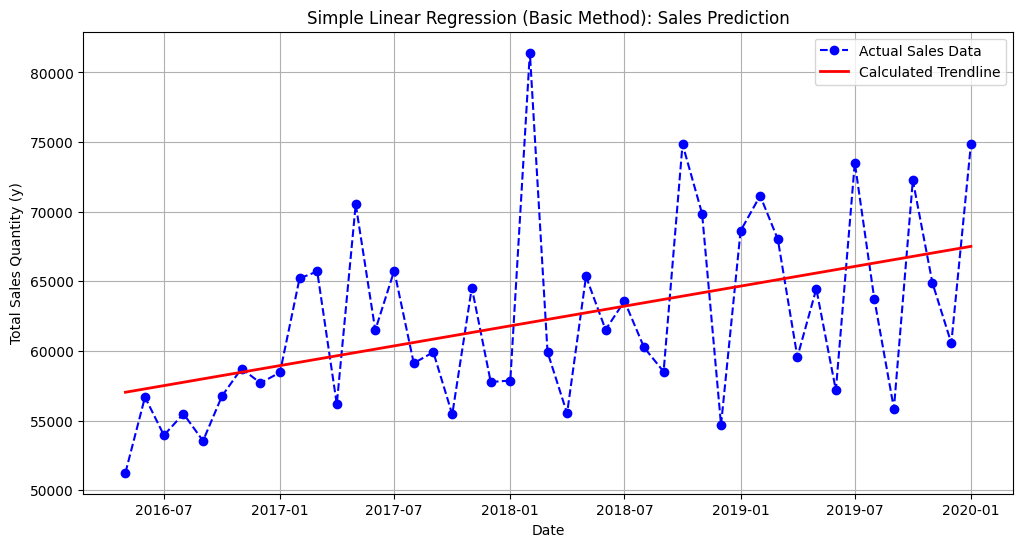

In [ ]:
X = d_df['time']
y = d_df['y']



## Aufgabe: Wie berechnet man die lineare Regression?

In [ ]:
# Tragen Sie hier Ihre Gedanken ein...




























In [ ]:
# Calculate the mean of X and y
x_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate the terms for the slope (b1) formula
# Slope formula: b1 = Σ((xi - x_mean) * (yi - y_mean)) / Σ((xi - x_mean)^2)
numerator = np.sum((X - x_mean) * (y - y_mean))
denominator = np.sum((X - x_mean)**2)

# Calculate the slope (b1)
b1 = numerator / denominator

# Intercept formula: b0 = y_mean - b1 * x_mean
b0 = y_mean - (b1 * x_mean)

print(f"Intercept (b0): {b0:.2f}")
print(f"Slope/Coefficient (b1): {b1:.4f}")

Die Vorhersagen zu erstellen ist dann tatsächlich nur eine Codezeile.

In [ ]:
# Use the calculated slope and intercept to create the regression line.
y_pred = b0 + b1 * X

# Aufgabe: Wie stellt man das Ergebnis am besten dar?

In [ ]:
# Geben Sie hier Ihren Code ein...


































Wie in Kapitel 1 und 2 bereits erlebt, ist die graphhische Aufbereitung der Ergebnisse eine hilfreiche Darstellungsweise.

In [ ]:
# Visualisierungsrahmen in Zoll
plt.figure(figsize=(12, 6))

# Plot the actual monthly sales data using the actual dates on the x-axis
plt.plot(d_df.ds, y, color='blue', label='Actual Sales Data', marker='o', linestyle='--')

# Plot the calculated trendline using the actual dates on the x-axis
plt.plot(d_df.ds, y_pred, color='red', linewidth=2, label='Calculated Trendline')

plt.title('Simple Linear Regression (Basic Method): Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity (y)')
plt.legend()
plt.grid(True)
plt.show()

## Aufgabe: Wie kann man bewerten, ob es sich um eine gute Vorhersage handelt?  
Tipp: Kapitel 1 und Kapitel 2 (z.B. Lage und Streuung)

In [ ]:
# Tragen Sie hier Ihre Gedanken ein...































Lasst uns noch einmal rekapitulieren, welche Erkenntnisse wir beim Kapitel EDA über die Sales Quantity erlangt haben:
Der Mittelwert weicht relativ stark vom Median ab, was nicht auf Normalverteilung der Umsätze schließen lässt. Ausreißer haben einen relativ großen Einfluss auf den Mittelwert und einen weniger starken Einfluss auf den Median.
Dies ist wichtig zu bedenken, wenn es um das Messen des Fehlers zwischen vorhergesagten und tatsächlich erzielten Werten geht.

### Fehlerterme

Um zu beurteilen wie gut das Modell die Realität getroffen hat, vergleichen wir die **vorhergesagten Werte** mit den **tatsächlichen Werten**. Der Unterschied zwischen diesen beiden ist der **Fehler (Error)**. Eine **Fehlermetrik** ist ein Werkzeug, das all diese Fehler nimmt und sie in einer einzigen, aussagekräftigen Zahl zusammenfasst.

---

Verschiedene Arten von Fehlern und Metriken, die für diesen Kurs relevant sind:

# Bias (Verzerrung)
Bias beschreibt die durchschnittliche systematische Abweichung deines Modells von den tatsächlichen Werten. Das Modell hat einen **Bias**, wenn es dazu neigt, immer in eine bestimmte Richtung falsch zu liegen.
* **Over-shooting (Überschießen):** Das Modell sagt die Werte durchgehend zu hoch voraus (z.B. werden die Verkäufe immer zu optimistisch geschätzt).
* **Under-shooting (Unterschießen):** Das Modell sagt die Werte durchgehend zu niedrig voraus (z.B. werden die Verkäufe immer zu pessimistisch geschätzt).

#### Präzision (Precision) & Genauigkeit (Accuracy)
Diese Begriffe werden oft verwechselt, sind aber für **Klassifikationsprobleme** (z.B. "Ist dieses Bild eine Katze oder ein Hund?") von Bedeutung, nicht für die Vorhersage von Zahlen.
* **Präzision:** Sie misst, wie viele der vom Modell als "positiv" vorhergesagten Fälle auch wirklich positiv waren. Beispiel: Von 100 E-Mails, die das Modell als Spam erkennt, sind 95 tatsächlich Spam. Die Präzision wäre 95 %. Es geht also darum, wie viele deiner positiven Vorhersagen richtig waren.
* **Genauigkeit (Accuracy):** Sie misst, wie viele Vorhersagen das Modell insgesamt richtig gemacht hat. Das schließt sowohl die korrekten Vorhersagen für "positiv" als auch für "negativ" ein. Wenn 95 von 100 E-Mails richtig als Spam erkannt wurden und 98 von 100 E-Mails richtig als kein Spam erkannt wurden, wäre die Genauigkeit sehr hoch.



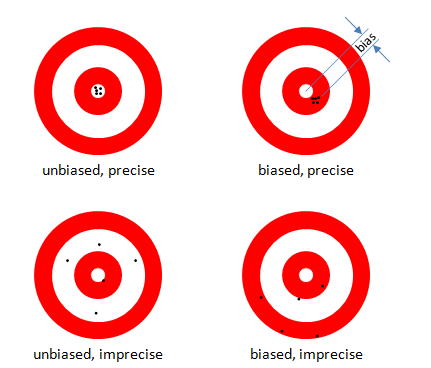

---

### MAE vs. MSE vs. RMSE: Der Unterschied zwischen Median und Mittelwert

Bei der Vorhersage von Zahlenwerten sind der **Mittlere Absolute Fehler (MAE)**, der **Mittlere Quadratische Fehler (MSE)** und der **Wurzel der Mittleren Quadratischen Fehler (RMSE)** die wichtigsten Metriken. Sie unterscheiden sich grundlegend darin, wie sie mit Fehlern, insbesondere mit **Ausreißern**, umgehen.

#### Was ist der Unterschied zwischen Mittelwert und Median?

Um das zu verstehen, ein kurzes Beispiel: Stell dir eine Gruppe von fünf Personen vor, deren Monatsgehälter 1.000 €, 1.200 €, 1.500 €, 1.800 € und 10.000 € (ein Ausreißer!) betragen.

* **Mittelwert (Durchschnitt):** Die Summe aller Gehälter geteilt durch die Anzahl der Personen: $(1.000 + 1.200 + 1.500 + 1.800 + 10.000) / 5 = 3.100 €$. Der Mittelwert wird stark durch den Ausreißer verzerrt.
* **Median:** Der Wert in der Mitte, wenn alle Werte der Größe nach sortiert sind. Hier ist es der Wert an dritter Stelle: 1.500 €. Der Median wird kaum vom Ausreißer beeinflusst.

Das ist der Kerngedanke: Der **Mittelwert** ist empfindlich gegenüber Ausreißern, der **Median** nicht.

  
Der **MAE (Mean Absolute Error)** und der **RMSE (Root Mean Squared Error)** sind zwei der am häufigsten verwendeten Metriken, um die Qualität eines Vorhersagemodells zu bewerten. Sie messen beide den durchschnittlichen Fehler, den ein Modell bei seinen Vorhersagen macht, aber sie tun dies auf unterschiedliche Weise.


#### Mittlerer Absoluter Fehler (MAE)

Der MAE berechnet den Durchschnitt aller **absoluten Fehler**. Ein Fehler von -5 oder +5 hat den gleichen Einfluss auf das Ergebnis.

* **MAE zielt auf den Median:** Da er Ausreißer nicht quadratisch bestraft, ist er robuster gegenüber diesen. Große Fehler haben einen linearen, nicht überproportionalen Einfluss auf den MAE.
* **Vorteil:** Er ist leicht zu interpretieren, da das Ergebnis in der gleichen Einheit wie deine Daten steht (z.B. Euro, Stückzahlen).

#### Mittlerer Quadratischer Fehler (MSE)

Der MSE misst den Durchschnitt der **quadrierten Fehler** zwischen den vorhergesagten und den tatsächlichen Werten. Er ist das, was viele Modelle intern minimieren.

* **MSE zielt auf den Mittelwert:** Durch das Quadrieren werden große Fehler überproportional stark gewichtet. Ein Fehler von 10 wird zu 100, ein Fehler von 2 wird zu 4. Die Strafe für große Fehler ist also sehr hoch.
* **Vorteil:** Er bestraft große Fehler sehr stark, was in vielen Fällen erwünscht ist, z.B. wenn ein großer Fehler in der Vorhersage sehr kostspielig wäre.
* **Nachteil:** Die Einheit des MSE ist nicht intuitiv (z.B. $Euro^2$), da die Fehler quadriert werden. Deshalb wird oft der RMSE verwendet.

#### Wurzel der Mittleren Quadratischen Fehler (RMSE)

Der RMSE ist einfach die **Quadratwurzel des MSE**.

* **RMSE zielt ebenfalls auf den Mittelwert:** Wie der MSE bestraft er Ausreißer stark.
* **Vorteil:** Im Gegensatz zum MSE ist die Einheit des RMSE wieder dieselbe wie die der Originaldaten (z.B. Euro). Das macht ihn deutlich besser interpretierbar als den MSE. Man kann ihn als die "typische" Fehlergröße des Modells verstehen.


---

### Der MAE: Robuster gegenüber Ausreißern

Der **Mean Absolute Error (MAE)** berechnet den Durchschnitt der absoluten Differenzen zwischen den tatsächlichen und den vorhergesagten Werten. Das bedeutet, er behandelt jeden Fehler gleich, unabhängig von seiner Größe.

* Ein großer Vorteil des MAE ist seine **Robustheit gegenüber Ausreißern**. Da die Fehler nicht quadriert werden, haben einzelne, große Fehler (Ausreißer) keinen übermäßig großen Einfluss auf das Endergebnis.
* Aus diesem Grund ist der MAE oft die bevorzugte Metrik, wenn der Datensatz viele Ausreißer enthält oder eine schiefe Verteilung aufweist. Er schützt das Modell davor, sich zu stark auf diese extremen Werte zu konzentrieren.
* Um den MAE zu optimieren, muss das Modell versuchen, den Median der Fehler zu minimieren, was bedeutet, dass die Hälfte der Vorhersagen unter- und die andere Hälfte überschätzt wird.

---

### Der RMSE: Stärker für die Modellierung des Mittelwerts

Der **Root Mean Squared Error (RMSE)** basiert auf dem **Mean Squared Error (MSE)**, der die quadrierten Differenzen zwischen den tatsächlichen und vorhergesagten Werten mittelt. Anschließend wird die Wurzel aus diesem Wert gezogen, um die ursprüngliche Einheit wiederherzustellen.

* Der RMSE **gewichtete größere Fehler stärker**. Da die Fehler quadriert werden, bevor sie gemittelt werden, wird ein großer Fehler überproportional ins Gewicht fallen. Ein einzelner, großer Vorhersagefehler kann den RMSE also deutlich verschlechtern.
* Diese Eigenschaft macht den RMSE sensibler für Ausreißer, was in manchen Fällen ein Nachteil sein kann.
* Ein Vorteil des RMSE ist, dass er, im Gegensatz zum MAE, dazu tendiert, eine **unvoreingenommene (unbiased)** Vorhersage zu begünstigen, bei der die geschätzten Gesamtwerte den tatsächlichen Gesamtwerten entsprechen. Die Optimierung des RMSE zielt darauf ab, den Mittelwert der Fehler zu minimieren, was zu einer Vorhersage führt, die im Durchschnitt korrekt ist.




### Ausreißer: Ein Problem oder ein wichtiges Signal?

Ein **Ausreißer** ist ein Datenpunkt, der sich stark von den anderen unterscheidet. Ob du ihn im Training behalten oder entfernen sollst, hängt davon ab, ob er:
* Ein **Messfehler** ist (z.B. jemand hat aus Versehen 10.000 statt 100 eingegeben). Solche Fehler solltest du entfernen.
* Ein **echtes, aber seltenes Ereignis** ist (z.B. ein Feiertag, der zu extrem hohen Verkäufen führt). In diesem Fall möchtest du dein Modell eventuell auf diesen Ausreißer trainieren, weil er eine wichtige Information enthält.





### Wann MAE eine schlechte Wahl ist: Intermittierende Nachfrage

Stell dir vor, du verkaufst Ersatzteile, die nur alle paar Monate oder Jahre gekauft werden. Die meisten Tage hast du **keine Nachfrage (intermittierende Nachfrage)**.

In diesem Szenario wäre der **MAE** eine schlechte Wahl für deine Fehlermetrik:
* Ein Modell, das **immer 0 vorhersagt**, hätte einen sehr geringen MAE. Da an den meisten Tagen tatsächlich 0 Nachfrage herrscht, wäre der Fehler null.
* Das Problem: Obwohl der MAE-Wert hervorragend aussieht, ist die Vorhersage nutzlos! Wenn an einem Tag tatsächlich 5 Teile verkauft werden, das Modell aber 0 vorhersagt, ist das für deine Lagerhaltung katastrophal. Der "optimale" MAE-Wert führt hier zu einem völlig unbrauchbaren Modell.
* In solchen Fällen werden oft spezielle, für intermittierende Nachfrage optimierte Metriken verwendet (z.B. Mean Absolute Scaled Error (MASE), oft auch in der Variante Scaled Mean Absolute Error (sMAE)).



### Wann sollte man welchen Wert wählen?

Die Wahl zwischen MAE und RMSE hängt von der spezifischen Situation ab. Es gibt keine absolute „richtige“ Antwort.

* Wählen Sie den **MAE**, wenn Ihr Datensatz viele Ausreißer enthält und Sie nicht möchten, dass diese das Modell übermäßig beeinflussen. Er bietet einen Schutz gegen verzerrte Vorhersagen, die durch extreme Werte verursacht werden.
* Wählen Sie den **RMSE**, wenn es entscheidend ist, große Fehler zu bestrafen und eine unvoreingenommene Vorhersage zu erhalten. Er ist die bessere Wahl, wenn Sie sicherstellen möchten, dass das Modell im Durchschnitt korrekt ist und eine Minimierung des Gesamtfehlers angestrebt wird.

Es ist eine gute Praxis, beide Metriken zu berücksichtigen. Wenn die Werte von MAE und RMSE sehr ähnlich sind, deutet dies auf eine geringe Anzahl von Ausreißern hin. Ein großer Unterschied zwischen den beiden Werten kann jedoch ein deutliches Anzeichen für das Vorhandensein von Ausreißern sein, was Ihnen hilft, die Stärken und Schwächen Ihres Modells besser zu verstehen.

Wir wollen nun den Unterschied zwischen MAE und RMSE anhand eines einfachen Beispiels veranschaulichen, bei dem ein großer einzelner Fehler das RMSE-Ergebnis stark beeinflusst.

In diesem Beispiel werden die monatlichen Umsätze prognostiziert. Die Prognosen liegen in den meisten Monaten sehr nah an den tatsächlichen Werten, mit Ausnahme des Monats **April**, in dem die Prognose einen sehr großen Fehler aufweist.



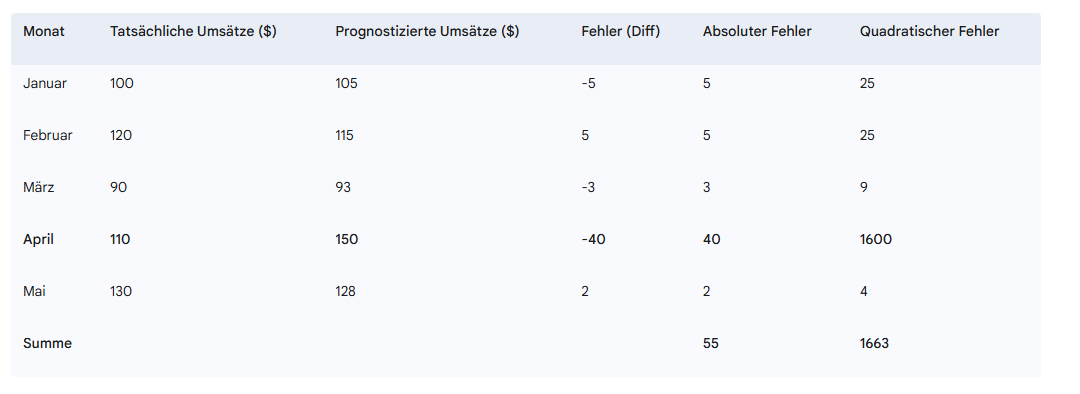

### Berechnung des MAE (Mittlerer Absoluter Fehler)

Der MAE berechnet den Durchschnitt der absoluten Fehler. Dabei werden alle Fehler gleich gewichtet.

$$MAE = \frac{\sum |Fehler|}{n}$$

$$MAE = \frac{5 + 5 + 3 + 40 + 2}{5} = \frac{55}{5} = 11$$

Der **MAE** beträgt **11**.

***

### Berechnung des RMSE (Wurzel aus dem mittleren quadratischen Fehler)

Der RMSE berechnet die Wurzel aus dem Durchschnitt der quadratischen Fehler. Durch das Quadrieren werden große Fehler überproportional stärker gewichtet.

$$RMSE = \sqrt{\frac{\sum Fehler^2}{n}}$$

$$RMSE = \sqrt{\frac{25 + 25 + 9 + 1600 + 4}{5}} = \sqrt{\frac{1663}{5}} = \sqrt{332,6} \approx 18,24$$

Der **RMSE** beträgt **18,24**.

***

### Fazit und Veranschaulichung des Unterschieds

Der **RMSE** (18,24) ist in unserem Beispiel deutlich höher als der **MAE** (11). Dies liegt an dem einen großen Fehler von 40 im April:

* Der **MAE** hat diesen Fehler einfach als 40 in die Summe aufgenommen, was das Endergebnis nicht extrem nach oben getrieben hat.
* Der **RMSE** hat den Fehler zunächst quadriert ($40^2 = 1600$). Dieser eine Wert dominiert die gesamte Summe der Fehlerquadrate (1663) und sorgt dafür, dass das Endergebnis signifikant ansteigt.

Dies zeigt, wie der **RMSE** **große Fehler stärker 'bestraft'** und somit sensibler auf Ausreißer in den Prognosen reagiert.

Wir entscheiden uns nun also dazu, den MAE und RMSE (jeweils auch in %), sowie den MSE ausgeben zu lassen.

In [ ]:
# Calculate the difference between actual and predicted values
errors = y - y_pred

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(errors))

# Mean Squared Error (MSE)
mse = np.mean(errors**2)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Percentage errors in relation to the mean
mae_percent = (mae / y_mean) * 100
rmse_percent = (rmse / y_mean) * 100 # This is also known as the Coefficient of Variation of the RMSE

print("--- Model Error Metrics ---")
print(f"Mittlerer Absoluter Fehler (MAE): {mae:.2f}")
print(f"Mittlerer Absoluter Fehler (MAE %): {mae_percent:.2f}%")
print(f"Mittlerer Quadratischer Fehler (MSE): {mse:.2f}")
print(f"Wurzel der Mittleren Quadratischen Fehler (RMSE): {rmse:.2f}")
print(f"Wurzel der Mittleren Quadratischen Fehler (RMSE %): {rmse_percent:.2f}%\n")

--- Model Error Metrics ---
Mittlerer Absoluter Fehler (MAE): 4686.54
Mittlerer Absoluter Fehler (MAE %): 7.53%
Mittlerer Quadratischer Fehler (MSE): 35219268.16
Wurzel der Mittleren Quadratischen Fehler (RMSE): 5934.58
Wurzel der Mittleren Quadratischen Fehler (RMSE %): 9.53%



Anm.: Ein prozentualer Wert für den MSE ist unüblich, da die Einheiten (quadrierte Werte) nicht direkt mit dem Mittelwert vergleichbar sind. Der prozentuale RMSE (auch als Variationskoeffizient des RMSE bekannt) ist hingegen eine gängige Metrik, um die relative Größe des Fehlers zu bewerten.

Unsere erstellte lineare Regression können wir auch in die Zukunft extrapolieren (prognostizieren).

# Aufgabe: Vervollständigen Sie die date_range Funktion so, dass die ab dem letzten historischen Wert die nächsten 6 Monate in die Zukunft vorhergesagt werden


Forecast for the next 6 months:
          ds        y_pred
0 2020-02-01  67754.413338
1 2020-03-01  67981.027243
2 2020-04-01  68223.269693
3 2020-05-01  68457.697870
4 2020-06-01  68699.940321
5 2020-07-01  68934.368498


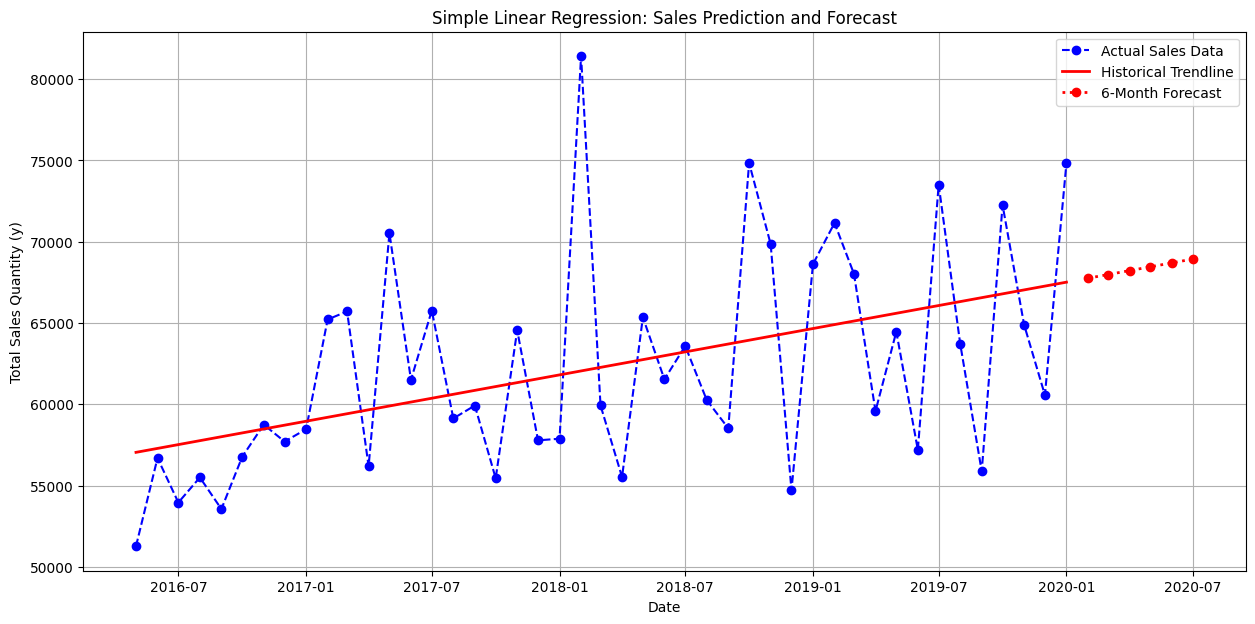

In [ ]:
# Get the last date from the historical data to start the forecast from there
last_date = d_df['ds'].iloc[-1]

# Create a date range for the next 6 months, starting from the month after the last historical date
future_dates = pd.date_range(Geben Sie hier Ihren Code ein)

# Create a new DataFrame for the forecast
forecast_df = pd.DataFrame({'ds': future_dates})

# Convert the future dates to their ordinal values for prediction
forecast_df['time'] = forecast_df['ds'].map(pd.Timestamp.toordinal)

# Predict future sales using the calculated slope and intercept
forecast_df['y_pred'] = b0 + b1 * forecast_df['time']

print("\nForecast for the next 6 months:")
print(forecast_df[['ds', 'y_pred']])




In [ ]:
# Get the last date from the historical data to start the forecast from there
last_date = d_df['ds'].iloc[-1]

# Create a date range for the next 6 months, starting from the month after the last historical date
future_dates = pd.date_range(start=last_date, periods=7, freq='MS')[1:]

# Create a new DataFrame for the forecast
forecast_df = pd.DataFrame({'ds': future_dates})

# Convert the future dates to their ordinal values for prediction
forecast_df['time'] = forecast_df['ds'].map(pd.Timestamp.toordinal)

# Predict future sales using the calculated slope and intercept
forecast_df['y_pred'] = b0 + b1 * forecast_df['time']

print("\nForecast for the next 6 months:")
print(forecast_df[['ds', 'y_pred']])

In [ ]:
# Visualization with Forecast
# Plot the original monthly data, the trendline, and the forecast.
plt.figure(figsize=(15, 7))

# Plot the actual historical sales data
plt.plot(d_df.ds, y, color='blue', label='Actual Sales Data', marker='o', linestyle='--')

# Plot the calculated trendline on historical data
plt.plot(d_df.ds, y_pred, color='red', linewidth=2, label='Historical Trendline')

# Plot the forecasted trendline for the next 6 months
plt.plot(forecast_df.ds, forecast_df.y_pred, color='red', linewidth=2, linestyle=':', marker='o', label='6-Month Forecast')

plt.title('Simple Linear Regression: Sales Prediction and Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity (y)')
plt.legend()
plt.grid(True)
plt.show()

# Aufgabe: Nehmen Sie nur die Daten, die >= 1.5.2019 sind
Werfen wir nun einen Blick auf die Fehlerwerte, wenn man nur den Zeitraum ab Mai 2019 betrachtet. Es gibt zahlreiche unterschiedliche Heransgehensweisen, um einen Datensatz für einen bestimmten Zeitraum zu filtern. An dieser Stelle wollen wir bewusst nicht iloc verwenden

In [ ]:
date_filter = d_df['ds'] # Geben Sie hier Ihren Code ein...

























In [ ]:
# Create a boolean mask to filter for dates from 2019-05-01
date_filter = d_df['ds'] >= '2019-05-01'

# Apply the filter to the true values and the predicted values
y_truth_filtered = y[date_filter]
y_pred_filtered = y_pred[date_filter]

# Calculate the errors for the filtered period
errors = y_truth_filtered - y_pred_filtered

# Calculate the mean of the filtered true values for percentage calculations
y_truth_mean_filtered = np.mean(y_truth_filtered)

# Mittlerer Absoluter Fehler (MAE)
mae = np.mean(np.abs(errors))

# Mittlerer Quadratischer Fehler (MSE)
mse = np.mean(np.square(errors))

# Wurzel der Mittleren Quadratischen Fehler (RMSE)
rmse = np.sqrt(mse)

# Prozentuale Fehler im Verhältnis zum Mittelwert des gefilterten Zeitraums
mae_percent = (mae / y_truth_mean_filtered) * 100
rmse_percent = (rmse / y_truth_mean_filtered) * 100

print("--- Model Error Metrics (from 2019-05-01) ---")
print(f"Mittlerer Absoluter Fehler (MAE): {mae:.2f}")
print(f"Mittlerer Absoluter Fehler (MAE %): {mae_percent:.2f}%")
print(f"Mittlerer Quadratischer Fehler (MSE): {mse:.2f}")
print(f"Wurzel der Mittleren Quadratischen Fehler (RMSE): {rmse:.2f}")
print(f"Wurzel der Mittleren Quadratischen Fehler (RMSE %): {rmse_percent:.2f}%\n")

--- Model Error Metrics (from 2019-05-01) ---
Mittlerer Absoluter Fehler (MAE): 5791.30
Mittlerer Absoluter Fehler (MAE %): 8.87%
Mittlerer Quadratischer Fehler (MSE): 42805878.81
Wurzel der Mittleren Quadratischen Fehler (RMSE): 6542.62
Wurzel der Mittleren Quadratischen Fehler (RMSE %): 10.03%



### Aufgabe: Was sind Vor- und Nachteile einer solchen Vorhersage?

## Benchmark: SARIMA

### Was ist SARIMA?

SARIMA steht für **S**easonal **A**uto**R**egressive **I**ntegrated **M**oving **A**verage. Es handelt sich um ein hochentwickeltes statistisches Modell zur Analyse und Vorhersage von Zeitreihen-Daten, die sowohl einen Trend als auch eine saisonale Komponente aufweisen. Es ist eine Erweiterung des weit verbreiteten ARIMA-Modells, die es ermöglicht, regelmäßige, sich wiederholende Muster in den Daten zu erfassen, wie zum Beispiel monatliche, vierteljährliche oder jährliche Schwankungen.

---

### Wie funktioniert SARIMA?

Das SARIMA-Modell zerlegt eine Zeitreihe in drei Hauptkomponenten, die es dann mathematisch modelliert:

* **Autoregressiver (AR) Teil:** Dieser Teil geht davon aus, dass der aktuelle Wert einer Zeitreihe eine lineare Abhängigkeit von vergangenen Werten hat.
* **Integrierten (I) Teil:** Dieser Teil behandelt Trends in den Daten. Er verwendet Differenzierung, um die Daten stationär zu machen, was bedeutet, dass der Mittelwert und die Varianz über die Zeit konstant bleiben.
* **Gleitender Durchschnitt (MA) Teil:** Dieser Teil modelliert die Abhängigkeit des aktuellen Werts vom Fehler der vorherigen Vorhersagen.

Die Besonderheit von SARIMA ist der **saisonale Teil**, der die gleichen drei Komponenten (AR, I, MA) auf die saisonalen Muster anwendet. Dieser Teil wird durch die Parameter **(P, D, Q, s)** dargestellt, wobei **s** die Periodizität der Saisonalität angibt (z. B. s=12 für monatliche Daten mit jährlicher Saisonalität).



Anbei ein konkretes Beispiel, um das Muster klar aufzuzeigen.

* **Tägliche Schwankungen:** Die Verkäufe am **Freitag** und **Samstag** sind immer höher als an den anderen Tagen der Woche.
* **Monatliche/Saisonale Schwankungen:** Im **Sommer** (Juni, Juli, August) steigen die Verkäufe drastisch an, während sie im **Winter** (Dezember, Januar, Februar) stark zurückgehen.

Ein einfaches ARIMA-Modell würde die wöchentlichen Schwankungen erfassen, aber die starken saisonalen Muster über die Jahreszeiten nicht berücksichtigen können. Hier kommt SARIMA ins Spiel.

---

## Die SARIMA-Komponenten in der Praxis

SARIMA zerlegt die Eis-Verkaufsdaten in zwei Arten von Mustern:

1.  **Kurzfristige, nicht-saisonale Muster:**
    * **Autoregressiver (AR) Teil:** Ein höherer Verkauf am Donnerstag lässt auf einen höheren Verkauf am Freitag schließen. Das Modell nutzt diese tägliche Abhängigkeit, um den aktuellen Wert zu schätzen. Wenn die Verkäufe gestern hoch waren, werden sie heute wahrscheinlich auch hoch sein.
    * **Integrierten (I) Teil:** Der allgemeine Trend der Verkäufe. Wenn die Verkäufe im Laufe der Zeit kontinuierlich leicht steigen (z.B. aufgrund von Bevölkerungswachstum), glättet SARIMA diesen Trend heraus, um die reinen, kurzfristigen Schwankungen besser modellieren zu können. Es berechnet die **Differenz** der Verkäufe zwischen zwei aufeinanderfolgenden Tagen, um den Trend zu eliminieren.
    * **Gleitender Durchschnitt (MA) Teil:** Wenn Sie die Verkäufe von heute vorhergesagt haben und Ihre Vorhersage gestern leicht zu niedrig war, korrigiert das Modell die heutige Vorhersage nach oben, um den gestrigen Fehler auszugleichen. Es lernt also aus seinen eigenen Fehlern.

2.  **Langfristige, saisonale Muster:**
    * **Saisonale Autoregressive (SAR) Teil:** Die Verkäufe im Juli eines Jahres sind stark von den Verkäufen im Juli des Vorjahres abhängig. SARIMA erkennt diese Abhängigkeit und nutzt sie, um die Prognose zu verbessern. Es sieht, dass der Verkauf jeden Sommer ansteigt.
    * **Saisonale Integrierte (SI) Teil:** Wenn der Verkauf jeden Sommer steigt, handelt es sich um einen saisonalen Trend. SARIMA berechnet die **Differenz** der Verkäufe zwischen einem bestimmten Monat in diesem Jahr und demselben Monat im Vorjahr, um diesen saisonalen Trend zu entfernen.
    * **Saisonale Gleitender Durchschnitt (SMA) Teil:** Wenn das Modell die Verkäufe vom letzten Juli unterschätzt hat, berücksichtigt es diesen Fehler bei der Vorhersage für den kommenden Juli.

Durch die Kombination dieser Komponenten kann das SARIMA-Modell eine sehr präzise Vorhersage für die zukünftigen Eis-Verkäufe erstellen, die sowohl die täglichen als auch die jährlichen Muster berücksichtigt.

---

### Was ist das Ziel?

Das Ziel von SARIMA ist es, die verborgenen Muster in den Daten zu identifizieren und zu quantifizieren, um die zukünftige Entwicklung so präzise wie möglich zu prognostizieren. Durch die Kombination von nicht-saisonalen **(p, d, q)** und saisonalen **(P, D, Q, s)** Parametern ist SARIMA in der Lage, sowohl kurzfristige als auch langfristige Abhängigkeiten in einer Zeitreihe zu erfassen und zu modellieren.

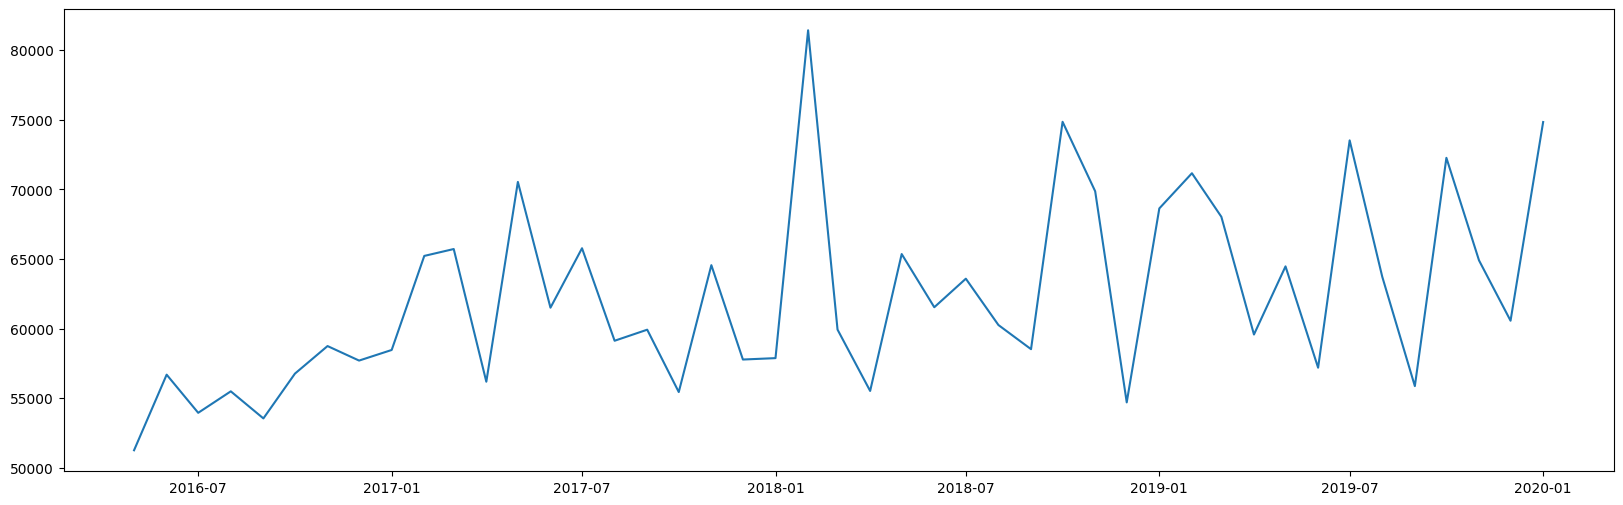

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel("https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx")

# Create a new DataFrame 'dfGrouped' by dropping specified columns from the original DataFrame 'df'.
dfGrouped = df.drop(columns=['SalesValue', 'Customer', 'SalesTransactionID', 'SalesItem'])

# Convert the 'SalesDate' column in 'dfGrouped' from a string or object type to a proper datetime format. This is crucial for performing time-based operations.
dfGrouped['SalesDate'] = pd.to_datetime(dfGrouped['SalesDate'])

# A datetime index is required for time series resampling.
dfGrouped = dfGrouped.set_index('SalesDate')

# 'MS' groups the data by the start of each month, .sum() then aggregates all values within each month by calculating their sum.
daily_df = dfGrouped.resample('MS').sum()

# Reset the index of 'daily_df', turning the datetime index back into a regular column. .dropna() is then used to remove any rows with missing values that might have resulted from resampling.
d_df = daily_df.reset_index().dropna()

# Rename the columns of 'd_df' to 'ds' (datestamp) and 'y' (value).
d_df.columns = ['ds', 'y']

# 'facecolor='w'' sets the background to white.
# 'figsize=(20, 6)' sets the figure dimensions to 20 inches in width and 6 inches in height.
fig = plt.figure(facecolor='w', figsize=(20, 6))

# 'd_df.ds' provides the x-axis values (dates).
# 'd_df.y' provides the y-axis values (the aggregated monthly sums).
plt.plot(d_df.ds, d_df.y)


Werfen wir an dieser Stelle noch einmal einen Blick auf die Zeitreihe, so wie wir es schon aus Kapitel 2 kennen.

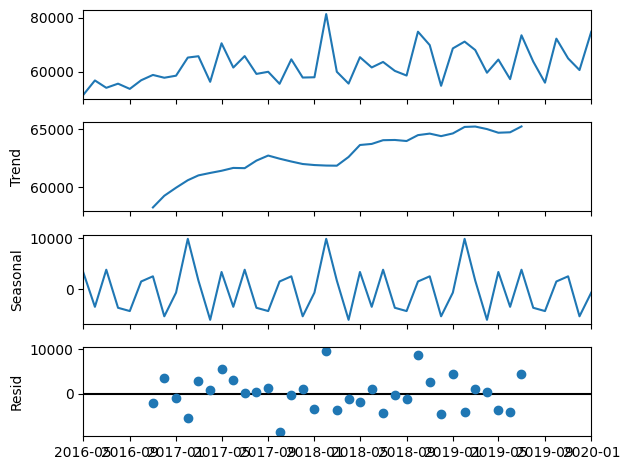

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = sm.tsa.seasonal_decompose(daily_df, model='additive')
#An additive (model is made up of observed, trend, seasonal and residual (noise) components) model is linear where changes
#over time are consistently made by the same amount. A linear seasonality has the same frequency (width of cycles) and
#amplitude (height of cycles).
fig = decomposition.plot()
plt.show()

## Aufgabe: Optimieren Sie graphische Ausgabe  
Optimieren Sie z.B. die Breite des Graphen oder Interaktivität

In [ ]:
# Geben Sie hier Ihren Code ein...



























In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots to display all components of the decomposition
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=("Observed", "Trend", "Seasonal", "Residuals"),
    shared_xaxes=True,
    vertical_spacing=0.1
)

# Plot the Observed data
fig.add_trace(
    go.Scatter(x=daily_df.index, y=decomposition.observed, mode='lines+markers', name='Observed'),
    row=1, col=1
)

# Plot the Trend component
fig.add_trace(
    go.Scatter(x=daily_df.index, y=decomposition.trend, mode='lines', name='Trend', line=dict(color='#ef4444', width=3)),
    row=2, col=1
)

# Plot the Seasonal component
fig.add_trace(
    go.Scatter(x=daily_df.index, y=decomposition.seasonal, mode='lines+markers', name='Seasonal'),
    row=3, col=1
)

# Plot the Residuals component
fig.add_trace(
    go.Scatter(x=daily_df.index, y=decomposition.resid, mode='markers', name='Residuals', marker=dict(color='#6366f1')),
    row=4, col=1
)

# Update layout for a cleaner look
fig.update_layout(
    title_text="Interactive Seasonal Decomposition of Sales Data",
    height=800,
    showlegend=False
)

# Add titles for each subplot
fig.update_yaxes(title_text="Observed", row=1, col=1)
fig.update_yaxes(title_text="Trend", row=2, col=1)
fig.update_yaxes(title_text="Seasonal", row=3, col=1)
fig.update_yaxes(title_text="Residuals", row=4, col=1)

# Show the plot
fig.show()

### Komponenten einer Zeitreihe

Das Diagramm besteht aus vier einzelnen Plots, die die vier Komponenten der Zeitreihe darstellen:

#### 1. Observed (Originaldaten, auch als actual oder Istdaten bezeichnet)
* Dies ist der **obere Plot** und zeigt Ihre originalen Daten.
* Er repräsentiert die gesamte Umsatzhistorie, genau wie sie in Ihren Rohdaten vorliegt. Wir sehen alle Schwankungen, sowohl die regelmäßigen als auch die zufälligen.

#### 2. Trend
* Dieser Plot zeigt die **langfristige Richtung** der Daten.
* Er glättet die Schwankungen und zeigt, ob Ihre Verkäufe über die Zeit **tendenzielle steigen, fallen oder konstant** bleiben. Es ist so, als würde man die Hauptmelodie eines Liedes hören, ohne die schnellen Noten.

#### 3. Seasonality (Saisonalität)
* Dieser Plot stellt die **regelmäßig wiederkehrenden Muster** in den Daten dar.
* In dem monatlichen Umsatzdaten könnte dies beispielsweise einen jährlichen Anstieg in der Weihnachtszeit oder eine Schwäche im Sommer zeigen. Die Kurve wiederholt sich in einem festen Intervall.

#### 4. Residual (Restwert/Zufällige Schwankung)
* Dieser Plot zeigt die **unvorhersehbaren Schwankungen** oder das "Rauschen", die nach der Entfernung von Trend und Saisonalität übrig bleiben.
* Es handelt sich um die zufälligen Fehler oder Ereignisse, die nicht Teil eines wiederkehrenden Musters sind. Ein kleiner, unregelmäßiger Ausschlag in diesem Plot deutet darauf hin, dass Trend und Saisonalität die meisten Ihrer Daten erklären.




Mit der Konvergenz in der SARIMA-Grid-Search ist gemeint, dass der Computer eine mathematisch stabile Lösung für die von Ihnen gewählten Parameter findet.

Stellen Sie es sich wie das Anpassen einer Kurve an eine Reihe von Datenpunkten vor:

Erfolgreiche Konvergenz: Wenn die Parameterkombination (p, d, q, etc.) gut zu den Daten passt, findet der Computer eine klare, eindeutige Kurve, die die Daten gut beschreibt. Dieser Prozess wird als "Konvergenz" bezeichnet.

Fehlerhafte Konvergenz: Wenn die Parameter nicht zu den Daten passen, kann der Computer keine sinnvolle Kurve finden. Es ist, als würde er versuchen, eine gerade Linie durch einen Kreis zu legen – es funktioniert einfach nicht. Der Computer gibt dann einen Fehler aus, weil er keine stabile Lösung berechnen kann.

In [ ]:
# Import the warnings library to control how warnings are handled.
import warnings
# Import the itertools library, which provides tools for creating iterators for efficient looping.
import itertools
# Import NumPy for numerical operations, aliased as np.
import numpy as np
# Import pyplot from matplotlib for creating plots, aliased as plt.
import matplotlib.pyplot as plt

# Ignore any warning messages that might be generated. This is often used to keep the output clean.
warnings.filterwarnings("ignore")
# Set the plotting style to 'fivethirtyeight' for visually appealing graphs.
plt.style.use('fivethirtyeight')

# Import the pandas library for data manipulation and analysis, aliased as pd.
import pandas as pd
# Import the statsmodels library for statistical modeling, including time series analysis, aliased as sm.
import statsmodels.api as sm
# Import the main matplotlib library to customize plot parameters.
import matplotlib
# Import the SciPy library for scientific and technical computing.
import scipy as sp


# --- Matplotlib Plotting Defaults ---
# Set the default font size for axes labels in all plots.
matplotlib.rcParams['axes.labelsize'] = 14
# Set the default font size for x-axis tick labels.
matplotlib.rcParams['xtick.labelsize'] = 12
# Set the default font size for y-axis tick labels.
matplotlib.rcParams['ytick.labelsize'] = 12
# Set the default text color to black ('k').
matplotlib.rcParams['text.color'] = 'k'


# --- ARIMA Parameter Generation ---
# Define a range of values for the p, d, and q parameters of the ARIMA model.
# p: The order of the autoregressive (AR) part of the model.
# d: The degree of differencing (the I part of the model).
# q: The order of the moving-average (MA) part of the model.
# Here, p, d, and q can each be 0 or 1.
p = d = q = range(0, 2)

# Generate all possible combinations of (p, d, q) using itertools.product.
# This creates a list of tuples for the non-seasonal part of the model.
pdq = list(itertools.product(p, d, q))

# Generate all possible combinations for the seasonal part of the model.
# This is similar to the step above but adds a seasonality period of 12 (for monthly data).
# The format is (P, D, Q, s), where s=12.
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# --- Print Example Parameter Combinations ---
# This section demonstrates what the generated parameter combinations look like.
# These combinations are typically used in a "grid search" to find the best-fitting model.
print('Examples of parameter combinations for Seasonal ARIMA...')
# A SARIMAX model is defined by both a non-seasonal order (p,d,q) and a seasonal order (P,D,Q,s).
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
# Specify that warning messages should be ignored. This is often done in grid searches
# because some parameter combinations can lead to numerical issues that generate warnings,
# which would otherwise clutter the output.
warnings.filterwarnings("ignore")

# --- Grid Search for Optimal SARIMAX Parameters ---

# Start a loop that iterates through each non-seasonal parameter combination (p,d,q) stored in 'pdq'.
for param in pdq:
    # Start a nested loop that iterates through each seasonal parameter combination (P,D,Q,s)
    # stored in 'seasonal_pdq'. This creates a comprehensive grid search.
    for param_seasonal in seasonal_pdq:
        # Use a try-except block to handle potential errors. Some parameter combinations
        # are invalid or can cause convergence issues, and this ensures the loop doesn't crash.
        try:
            # Define the SARIMAX model using the statsmodels library.
            mod = sm.tsa.statespace.SARIMAX(daily_df, # The time series data
                                          order=param, # The non-seasonal order (p,d,q)
                                          seasonal_order=param_seasonal, # The seasonal order (P,D,Q,s)
                                          # Don't enforce stationarity/invertibility conditions. This prevents
                                          # the model from throwing errors for some parameter sets, allowing
                                          # a wider range of models to be tested.
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

            # Fit the defined SARIMAX model to the data. This is the most computationally
            # intensive step, where the model's coefficients are estimated.
            results = mod.fit()

            # Print the model parameters and the resulting AIC (Akaike Information Criterion).
            # The AIC is a statistical measure used to compare different models; a lower AIC
            # value generally indicates a better model fit for the given data.
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

        # If an error occurs in the 'try' block for a given set of parameters...
        except:
            # ...simply skip that combination and move to the next one in the loop.
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1099.163998928554
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1548.4411082272447
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:658.9026779112539
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:414.28774985802374
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:683.7258073082883
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:662.9333288270066
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:432.4745945740263
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:411.9746920755855
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1047.1741614357848
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:37278.52460337176
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:640.8326801685489
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:396.585794503205
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:796.8097653935765
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:750.8358712820119
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:434.52703863185445
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:393.7383286759668
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:909.4243332384875
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1273.4029732295987
ARIMA(

Umgang mit Konvergenzproblemen in der SARIMA-Grid-Search
Wenn Sie versuchen, alle möglichen Parameterkombinationen für ein SARIMA-Modell zu testen, stoßen Sie zwangsläufig auf Kombinationen, die mathematisch instabil sind oder nicht zu den Daten passen. Dies führt häufig zu Fehlern wie ValueError oder LinAlgError, die den gesamten Prozess stoppen würden.

Die try-except-Struktur in unserem Code ist eine elegante Methode, um diese Fehler zu handhaben.

Warum treten diese Fehler auf?

Nicht-stationäre Daten: Das SARIMA-Modell setzt voraus, dass die Zeitreihe nach den Differenzierungsschritten (d und D) stationär ist. Wenn die gewählten Differenzierungsparameter nicht ausreichen, um die Stationarität zu erreichen, kann der Algorithmus nicht konvergieren.

Zu viele Parameter: Das Modell kann überkomplex werden, wenn Sie zu viele AR- oder MA-Parameter (p, q, P, Q) gleichzeitig auswählen. Dies kann zu numerischen Instabilitäten führen.

Ungültige Parameterkombinationen: Einige Kombinationen von p, d, q und P, D, Q sind einfach nicht sinnvoll für die zugrundeliegenden Daten.

Warum ignorieren wir die Fehler?

Indem wir die Fehler mit try-except abfangen und continue verwenden, stellen wir sicher, dass die Grid-Search-Schleife nicht abbricht. Stattdessen wird die problematische Parameterkombination übersprungen und der Algorithmus fährt mit der nächsten Kombination fort. Dies ermöglicht es uns, den Suchprozess abzuschließen und ein potenziell gutes Modell zu finden, auch wenn einige Kombinationen fehlschlagen. Das Ziel ist nicht, für jede mögliche Kombination ein Modell zu finden, sondern das beste Modell aus den erfolgreichen Konvergenzen zu identifizieren.

Um die beste ARIMA-Parameterkombination zu finden, wählen wir diejenige mit dem niedrigsten **AIC (Akaike Information Criterion)** aus.



Der ausgeführte **Grid-Search**-Code hat mehrere (p,d,q)(P,D,Q,s)-Kombinationen getestet und für jede den AIC-Wert ausgegeben. Das AIC ist ein statistisches Maß, das die Qualität eines Modells bewertet, indem es dessen Anpassungsgüte mit seiner Einfachheit in Einklang bringt.

Es ist wie beim Golf Punktestand: Je niedriger der AIC-Wert, desto besser ist das Modell.

* **Überprüfen der Ausgabe:** Sehen Sie sich die Liste der Ergebnisse an, die von Ihrem Skript ausgegeben wurde.
* **Den niedrigsten AIC-Wert finden:** Suchen Sie die Zeile mit der kleinsten Zahl nach **AIC:**.
* **Parameter identifizieren:** Die (p,d,q)- und (P,D,Q,12)-Werte in derselben Zeile sind Ihre optimalen Parameter.

In [ ]:
import warnings
import itertools
import pandas as pd
import statsmodels.api as sm

# Set best_aic to a very large number (infinity) so any initial model's AIC will be lower.
best_aic = float('inf')
best_pdq = None
best_seasonal_pdq = None
best_results = None

# Suppress warning messages to keep the output clean.
warnings.filterwarnings("ignore")

print("Finding the best SARIMAX model parameters...")

# Loop through all non-seasonal and seasonal parameter combinations.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Define and fit the SARIMAX model for the current combination.
            mod = sm.tsa.statespace.SARIMAX(daily_df,
                                          order=param,
                                          seasonal_order=param_seasonal,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
            results = mod.fit(disp=False) # disp=False suppresses convergence output

            # Check if the current model's AIC is lower than the best AIC found so far.
            if results.aic < best_aic:
                # If it is, update the best_aic, best parameters, and store the results object.
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_results = results

        except:
            # If a combination of parameters causes an error, just skip it.
            continue

# After checking all combinations, print the best results.
print("\n--- Best Model Found ---")
print('Best SARIMAX{}x{}12 model - AIC: {:.2f}'.format(best_pdq, best_seasonal_pdq, best_aic))

# It's also good practice to print the summary of the best model.
print("\n--- Model Summary ---")
print(best_results.summary())

Finding the best SARIMAX model parameters...

--- Best Model Found ---
Best SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 model - AIC: 376.39

--- Model Summary ---
                                     SARIMAX Results                                      
Dep. Variable:                        SalesAmount   No. Observations:                   45
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -185.196
Date:                            Thu, 14 Aug 2025   AIC                            376.393
Time:                                    12:13:57   BIC                            379.064
Sample:                                05-01-2016   HQIC                           376.761
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

# Aufgabe: Hier wird automatisch die beste Parameterkombination gefunden. Handelt es sich hierbei bereits um Machine Learning?

In [ ]:
# Geben Sie hier Ihre Gedanken ein...






























##  Zentrale Unterschiede SARIMA vs. Machine Learning

| **Aspekt**          | **SARIMA**                                                                                                    | **Machine Learning (z. B. Random Forest, XGBoost, LSTM)**                             |
| ------------------- | ------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------- |
| **Modelltyp**       | Parametrisch: feste Struktur (AR, I, MA, ggf. saisonale Terme)                                                | Nicht-parametrisch oder hochflexibel: keine feste Funktionsform                       |
| **Modellannahmen**  | Starke Annahmen: Stationarität, lineare Zusammenhänge, homoskedastische Residuen, Normalverteilung der Fehler | Wenige bis keine Annahmen über Datenverteilung oder Linearität                        |
| **Erklärbarkeit**   | Sehr gut: jeder Parameter (p,d,q,P,D,Q) hat eine klare statistische Bedeutung                                 | Oft Black-Box (besonders bei neuronalen Netzen), Interpretation schwieriger           |
| **Training**        | Parameterschätzung via Maximum-Likelihood oder OLS, sehr effizient                                            | Training oft rechenintensiver (Gradient Descent, Bäume wachsen, Netzwerke optimieren) |
| **Inputdaten**      | Nutzt fast ausschließlich die **Vergangenheit der Zielvariable**                                              | Kann viele zusätzliche Features nutzen (z. B. Feiertage, Wetter, externe Indikatoren) |
| **Ziel**            | Modelliert Zeitreihe direkt und erklärt sie                                                                   | Lernt beliebige Muster/Korrelationen, Fokus auf Vorhersagegüte                        |
| **Automatisierung** | Parameterwahl kann automatisiert werden (Grid-Search, AIC/BIC-Minimierung)                                    | Hyperparameter-Tuning ebenfalls üblich, aber Suchraum oft größer und komplexer        |
| **Generalisation**  | Starke theoretische Grundlage → gut interpretierbar, aber weniger flexibel bei komplexen Mustern              | Kann sehr komplexe Muster erfassen, aber auch overfitten                              |

---



1. Die Koeffizienten (ma.L1 und ma.S.L12)
Die Koeffizienten zeigen, wie das Modell die Fehler der Vergangenheit nutzt, um die aktuelle Vorhersage zu verbessern.

ma.L1 (Moving Average, Lag 1): Dieser Koeffizient beschreibt den Einfluss des Fehlers aus dem vorherigen Monat auf die aktuelle Vorhersage. Ein negativer Wert deutet darauf hin, dass ein Überschuss im letzten Monat mit einem korrigierten, niedrigeren Wert für den aktuellen Monat einhergeht.

ma.S.L12 (Seasonal Moving Average, Lag 12): Dieser Koeffizient beschreibt den Einfluss des Fehlers aus dem gleichen Monat des Vorjahres (der Saisonalität) auf die aktuelle Vorhersage.

2. Der p-Wert
Der p-Wert hilft uns, die statistische Signifikanz eines Koeffizienten zu beurteilen.

Regel: Ist der p-Wert kleiner als 0.05, betrachten wir den Koeffizienten als statistisch signifikant. Das bedeutet, dass der entsprechende Parameter wahrscheinlich einen echten Einfluss auf die Vorhersage hat.

Beispiel: Ein p-Wert von 0.000 für ma.S.L12 würde bedeuten, dass die Saisonalität (der Fehler vom Vorjahr) einen sehr starken und verlässlichen Einfluss auf die aktuellen Verkaufszahlen hat.

1. Koeffizienten (ma.L1 und ma.S.L12)
Stellen Sie sich die Vorhersage wie eine Wettervorhersage vor. Die Koeffizienten sind die Regeln, die das Modell verwendet. Sie sagen dem Modell, wie stark es sich bei der aktuellen Vorhersage an den Vorhersagefehlern aus der Vergangenheit orientieren soll.

ma.L1 (Moving Average, Lag 1): Dieser Koeffizient schaut auf den Fehler des letzten Monats. War die tatsächliche Nachfrage im letzten Monat höher als vorhergesagt? Dann wird das Modell die Vorhersage für den aktuellen Monat entsprechend anpassen.

ma.S.L12 (Seasonal Moving Average, Lag 12): Dieser Koeffizient ist besonders wichtig für saisonale Daten. Er schaut auf den Fehler aus dem gleichen Monat des Vorjahres. War die Nachfrage im letzten Dezember höher als erwartet, wird das Modell dies bei der Vorhersage für diesen Dezember berücksichtigen.

2. Der p-Wert
Der p-Wert ist wie ein Beweis dafür, dass eine Regel (Koeffizient) wirklich wichtig ist und nicht nur Zufall.

Regel: Wenn der p-Wert kleiner als 0.05 ist, dann ist der Beweis stark genug. Das bedeutet, dass der Koeffizient einen statistisch signifikanten Einfluss hat. Das Modell sollte ihn also verwenden.

Beispiel: Ein p-Wert von 0.000 für ma.S.L12 ist ein sehr starker Beweis. Er sagt uns, dass der Einfluss der Saisonalität (also der Vergleich mit dem Vorjahr) definitiv kein Zufall ist, sondern ein wichtiger Faktor für die Vorhersage.

In [ ]:
# Import the statsmodels library, aliased as sm, which provides the tools for statistical modeling.
import statsmodels.api as sm

# Define the SARIMAX model with the best parameters found from the grid search.
mod = sm.tsa.statespace.SARIMAX(
    daily_df,  # The time series data to be modeled.

    # Set the non-seasonal order (p,d,q). These values were chosen because they
    # yielded the lowest AIC in the previous model selection step.
    order=(1, 1, 1),

    # Set the seasonal order (P,D,Q,s). These values also came from the best-performing
    # model in the grid search. The '12' indicates a yearly seasonality (12 months).
    seasonal_order=(1, 1, 0, 12),

    # These parameters are set to False to prevent the model from throwing errors if the
    # chosen parameters do not strictly satisfy the mathematical conditions of stationarity
    # or invertibility. This allows for a more flexible model fit.
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the specified SARIMAX model to the data.
# The 'results' object contains all the information about the fitted model,
# including coefficients, statistics, and methods for diagnostics and forecasting.
results = mod.fit()

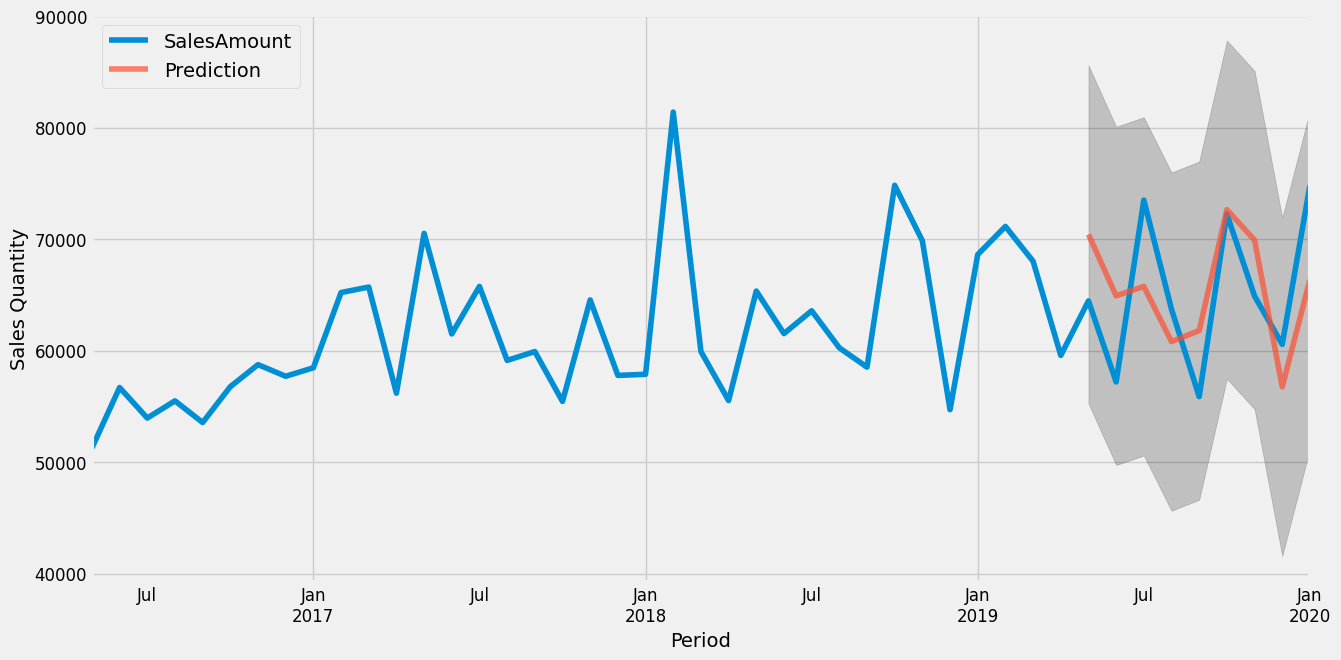

In [ ]:
# Generate predictions for a specific period within the dataset.
# 'start=pd.to_datetime('2019-05-01')' specifies the starting point for the predictions.
# 'dynamic=False' means the model makes one-step-ahead forecasts. At each point, it uses the
# true value from the previous step to predict the current one. This is useful for model validation.
pred = results.get_prediction(start=pd.to_datetime('2019-05-01'), dynamic=False)

# Get the confidence interval for the predictions. This provides a range within which
# the true value is expected to fall with a certain probability (typically 95%).
pred_ci = pred.conf_int()

# --- Plotting the Results ---

# Plot the observed data from the year 2016 onwards.
# 'ax' stores the plot's axes object, so we can add more layers to the same plot.
ax = daily_df['2016':].plot(label='Observed')

# Plot the model's predicted mean values on the same axes ('ax').
# 'alpha=.7' makes the line slightly transparent for better visualization.
pred.predicted_mean.plot(ax=ax, label='Prediction', alpha=.7, figsize=(14, 7))

# Fill the area between the upper and lower bounds of the confidence interval.
# This shaded region visually represents the uncertainty in the predictions.
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0], # Lower bound of the confidence interval
                pred_ci.iloc[:, 1], # Upper bound of the confidence interval
                color='k', alpha=.2) # Set color to black with 20% opacity

# Set the labels for the x and y axes to make the plot informative.
ax.set_xlabel('Period')
ax.set_ylabel('Sales Quantity')

# Display the legend, which will show the labels for the "Observed" and "Prediction" lines.
plt.legend()

# Render and display the final plot.
plt.show()

Das Fitten ist ein automatisierter Prozess, bei dem das Modell systematisch verschiedene Parameter ausprobiert, um die Differenz zwischen seinen Vorhersagen und den tatsächlichen Datenpunkten so klein wie möglich zu machen. Es sucht nach der mathematisch optimalen Kombination von Faktoren, die die Vergangenheit am besten erklären.


1.SARIMA versucht, jeden Datenpunkt als eine Kombination aus vier verschiedenen Komponenten vorherzusagen:

- Autoregressive (AR - Anteil 'p'): Die Annahme, dass der heutige Wert vom gestrigen (oder vorletzten, etc.) Wert abhängt. Das Modell lernt einen Koeffizienten (ϕ), der angibt, wie stark der Einfluss vergangener Werte ist.  
Analogie: Das heutige Wetter ist wahrscheinlich ähnlich wie das gestrige.


- Integrated (I - Anteil 'd'): Bevor das Modell arbeitet, werden die Daten oft "differenziert". Das heißt, statt der absoluten Verkaufszahlen (100, 110, 105, ...) betrachtet das Modell die Veränderungen (+10, -5, ...). Das macht die Datenreihe stabiler (stationär) und den Trend leichter zu erkennen.
Analogie: Es ist einfacher, das Wachstum eines Kindes vorherzusagen, wenn man sich auf die Wachstumsrate (cm pro Monat) konzentriert statt auf seine absolute Größe.

- Moving Average (MA - Anteil 'q'): Die Annahme, dass die Vorhersage korrigiert werden kann, indem man die Fehler der letzten Vorhersagen berücksichtigt.
Analogie: Wenn du beim Autofahren in einer Kurve zu weit nach links lenkst (ein Fehler), korrigierst du beim nächsten Mal leicht nach rechts.

Das Modell lernt einen Koeffizienten (θ), der bestimmt, wie stark vergangene Fehler die nächste Vorhersage beeinflussen sollen.

- Seasonal (S - Anteil 'P, D, Q, s'): Dies ist das Geniale an SARIMA. Es wendet genau die drei obigen Prinzipien (AR, I, MA) noch einmal an, aber auf saisonaler Ebene. Bei den Monatsdaten mit s=12 schaut das Modell also:

- Wie hängt der Wert vom gleichen Monat des Vorjahres ab? (Saisonales AR)

- Wie sieht die Veränderung zum Vorjahresmonat aus? (Saisonales Differenzieren)

- Wie können wir die Vorhersage basierend auf dem Fehler vom Vorjahresmonat korrigieren? (Saisonales MA)



2. Der "Fitten"-Prozess: Maximum Likelihood Estimation (MLE)
Dein Code results = mod.fit() startet den eigentlichen Anpassungsprozess. SARIMA verwendet hierfür eine statistische Methode namens Maximum Likelihood Estimation (MLE). Das klingt kompliziert, die Idee dahinter ist aber intuitiv.

Stell dir vor, du hast viele Regler für all diese Koeffizienten (ϕ
1
​
 ,θ
1
​
 ,Φ
1
​
 ,Θ
1
​
 , etc.).

Startpunkt: Der Algorithmus beginnt mit zufälligen oder standardmäßigen Einstellungen für alle Regler.

Vorhersage & Fehlerberechnung: Mit diesen Einstellungen geht das Modell durch deine gesamten historischen Daten (z.B. von 2016 bis 2019) und macht für jeden einzelnen Monat eine "Ein-Schritt-Voraus-Prognose". Es berechnet dann für jeden Punkt den Fehler, also die Differenz (Tatsächlicher Wert - Vorhergesagter Wert). Diese Fehler werden Residuen genannt.

Bewertung (Likelihood): Jetzt kommt der entscheidende Schritt. Der Algorithmus stellt sich die Frage: "Wenn mein Modell (mit den aktuellen Regler-Einstellungen) die Welt perfekt beschreiben würde, wie wahrscheinlich wäre es, genau diese Fehler (Residuen) zu beobachten?" Diese Wahrscheinlichkeit ist die Likelihood (Plausibilität). Ziel ist es, diese Likelihood zu maximieren.

Optimierung: Ein interner Optimierungsalgorithmus (oft "L-BFGS" genannt) verstellt nun die Regler leicht in die Richtung, die eine höhere Likelihood verspricht.

Wiederholung: Die Schritte 2 bis 4 werden sehr oft wiederholt. Der Algorithmus "tastet" sich iterativ an die perfekten Regler-Einstellungen heran, bis keine weitere Verbesserung der Likelihood mehr möglich ist.

Das Endergebnis – das results-Objekt – enthält genau diese optimalen Koeffizienten, die die Wahrscheinlichkeit, deine historischen Daten zu erzeugen, maximieren.





Die Schleife testet verschiedene Kombinationen von (p,d,q) und (P,D,Q,s).

Für jede einzelne Kombination führt sie den kompletten, oben beschriebenen MLE-Fit-Prozess durch.

Am Ende vergleicht sie alle fertigen Modelle anhand des Akaike Information Criterion (AIC). Der AIC ist im Grunde die Maximum-Likelihood-Schätzung korrigiert um einen "Strafwert" für die Komplexität des Modells.

Das Modell mit dem niedrigsten AIC (ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:108.050) bietet den besten Kompromiss aus guter Vorhersageleistung und Einfachheit und wird daher für die endgültige Analyse ausgewählt.

Wie gut schlägt sich nun also dieser SARIMA Ansatz gegenüber der Einfachen Linearen Regression?

In [ ]:
# Extract the predicted values
y_forecasted = pred.predicted_mean

# Select the single column from the DataFrame to turn it into a Series.
# .iloc[:, 0] selects all rows and the first (and likely only) column.
y_truth_series = daily_df.iloc[:, 0]

# Now, slice the Series to get the corresponding true values.
y_truth = y_truth_series['2019-05-01':]

# Calculate the mean of the true values for percentage calculations
y_truth_mean = np.mean(y_truth)

# Mittlerer Absoluter Fehler (MAE)
mae = np.mean(np.abs(y_truth - y_forecasted))

# Mittlerer Quadratischer Fehler (MSE)
mse = ((y_forecasted - y_truth) ** 2).mean()

# Wurzel der Mittleren Quadratischen Fehler (RMSE)
rmse = np.sqrt(mse)

# Prozentuale Fehler im Verhältnis zum Mittelwert
mae_percent = (mae / y_truth_mean) * 100
rmse_percent = (rmse / y_truth_mean) * 100

print("\n--- SARIMAX Model Error Metrics ---")
print(f"Mittlerer Absoluter Fehler (MAE): {mae:.2f}")
print(f"Mittlerer Absoluter Fehler (MAE %): {mae_percent:.2f}%")
print(f"Mittlerer Quadratischer Fehler (MSE): {mse:.2f}")
print(f"Wurzel der Mittleren Quadratischen Fehler (RMSE): {rmse:.2f}")
print(f"Wurzel der Mittleren Quadratischen Fehler (RMSE %): {rmse_percent:.2f}%\n")




--- SARIMAX Model Error Metrics ---
Mittlerer Absoluter Fehler (MAE): 5332.45
Mittlerer Absoluter Fehler (MAE %): 8.17%
Mittlerer Quadratischer Fehler (MSE): 34521846.23
Wurzel der Mittleren Quadratischen Fehler (RMSE): 5875.53
Wurzel der Mittleren Quadratischen Fehler (RMSE %): 9.00%



### Aufgabe: Abgleich der Ergebnisse
Vergleichen wir nun die Ergebnisse dieser SARIMA gegen die Lineare Regression von weiter oben. Wir werfen sowohl einen Blick auf die Fehlermetriken, als auch einen vergleichenden Blick auf die Visualisierungen. Überrascht uns dieses Ergebnis?

In [ ]:
y_forecasted = pred.predicted_mean

# Select the single column from the DataFrame to turn it into a Series.
# .iloc[:, 0] selects all rows and the first (and likely only) column.
y_truth_series = daily_df.iloc[:, 0]

# Now, slice the Series to get the corresponding true values.
y_truth = y_truth_series['2019-05-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 34521846.23


In [ ]:
y_forecasted

SalesDate
2019-05-01    70433.978617
2019-06-01    64918.319336
2019-07-01    65765.943799
2019-08-01    60810.614033
2019-09-01    61801.671165
2019-10-01    72651.900672
2019-11-01    69934.278356
2019-12-01    56750.699102
2020-01-01    66361.870763
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
y_truth

SalesDate
2019-05-01    64466
2019-06-01    57192
2019-07-01    73512
2019-08-01    63722
2019-09-01    55871
2019-10-01    72258
2019-11-01    64899
2019-12-01    60565
2020-01-01    74828
Freq: MS, Name: SalesAmount, dtype: int64

# Aufgabe: Berechnen Sie die Residuen

In [ ]:
# Geben Sie hier Ihren Code ein...






















In [ ]:
comparison_df = pd.DataFrame({'Actual': y_truth,
                              'Forecast': y_forecasted})
# Add a 'Difference' column to explicitly show the error for each month.
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Forecast']

# Round the specific columns to one decimal place
comparison_df['Forecast'] = comparison_df['Forecast'].round(1)
comparison_df['Difference'] = comparison_df['Difference'].round(1)

# Display the updated DataFrame
print(comparison_df)

            Actual  Forecast  Difference
SalesDate                               
2019-05-01   64466   70434.0     -5968.0
2019-06-01   57192   64918.3     -7726.3
2019-07-01   73512   65765.9      7746.1
2019-08-01   63722   60810.6      2911.4
2019-09-01   55871   61801.7     -5930.7
2019-10-01   72258   72651.9      -393.9
2019-11-01   64899   69934.3     -5035.3
2019-12-01   60565   56750.7      3814.3
2020-01-01   74828   66361.9      8466.1


Interessehalber wollen wir sehen, wie SARIMA weiter in die Zukunft prognostiziert.

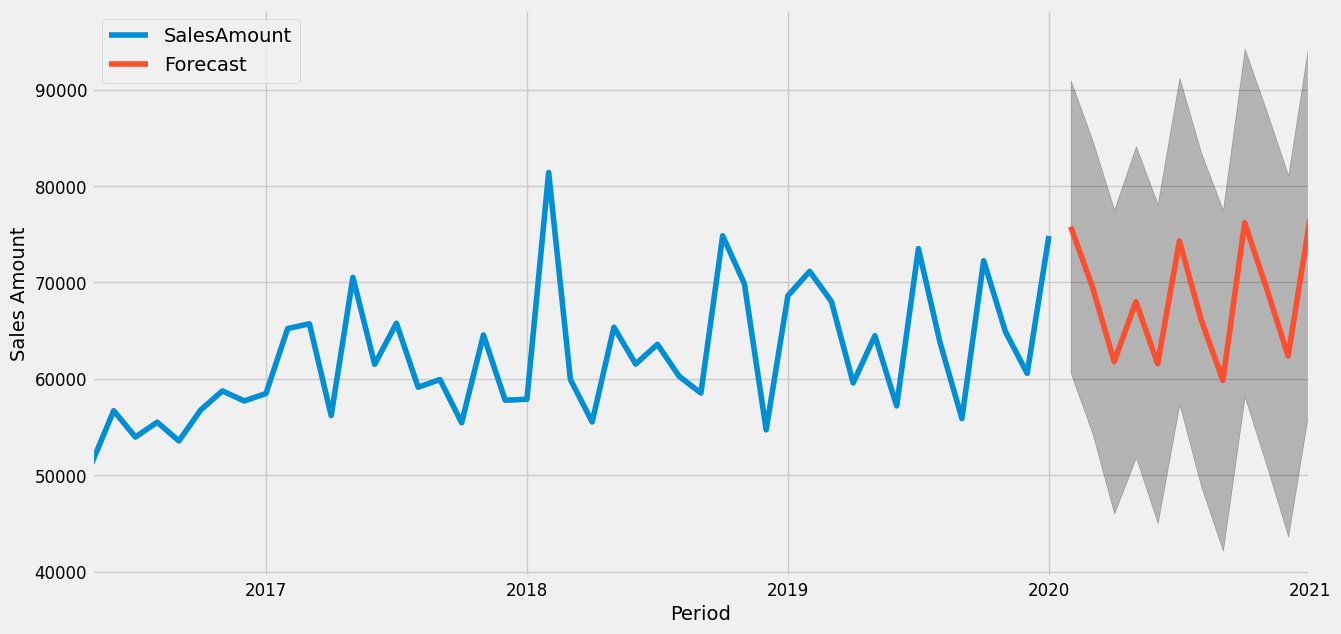

In [ ]:
# Generate a forecast for future periods using the fitted model.
# 'get_forecast()' is used for out-of-sample predictions.
# 'steps=12' specifies that we want to predict the next 12 time periods (e.g., 12 months)
# beyond the end of the original dataset.
pred_uc = results.get_forecast(steps=12)

# Get the confidence interval for the future forecast. This provides an upper and
# lower bound for the predictions, illustrating the forecast's uncertainty.
pred_ci = pred_uc.conf_int()

# --- Plotting the Forecast ---

# Plot the entire historical time series data.
# 'ax' stores the plot's axes object, allowing us to add more layers to the same chart.
ax = daily_df.plot(label='Observed', figsize=(14, 7))

# Plot the forecasted mean values on the same axes ('ax').
# This line will extend from the end of the observed data into the future.
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

# Fill the area between the upper and lower bounds of the confidence interval.
# This shaded region visually represents the uncertainty, which typically grows
# larger as the forecast extends further into the future.
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0], # The lower bound of the confidence interval.
                pred_ci.iloc[:, 1], # The upper bound of the confidence interval.
                color='k', alpha=.25) # Set color to black with 25% opacity.

# Set the labels for the x and y axes for clarity.
ax.set_xlabel('Period')
ax.set_ylabel('Sales Amount')

# Display the legend to identify the 'Observed' and 'Forecast' lines.
plt.legend()

# Render and display the complete plot.
plt.show()

Aufgabe: Welchen Einfluss hat der Schätzhorizont auf die Vorhersage?

In [ ]:
# Geben Sie hier Ihre Gedanken ein...

































In [ ]:
print (pred_uc.predicted_mean)

2020-02-01    75793.210186
2020-03-01    69548.512520
2020-04-01    61785.326853
2020-05-01    67996.761749
2020-06-01    61578.823355
2020-07-01    74299.622290
2020-08-01    66140.710454
2020-09-01    59834.177576
2020-10-01    76204.728417
2020-11-01    69444.821369
2020-12-01    62378.964979
2021-01-01    76556.129482
Freq: MS, Name: predicted_mean, dtype: float64


### Zusammenfassung des SARIMA-Benchmark

1.  **Datenaufbereitung:** Der Prozess beginnt mit der Bereinigung der Daten. Irrelevante Spalten werden entfernt und die Datum-Spalte wird in ein passendes Datumsformat umgewandelt. Anschließend werden die Daten in einer monatlichen Reihe zusammengefasst, indem die Werte für jeden Monat aufsummiert werden (`resample('MS')`). Dieser Schritt ist entscheidend, da er die saubere, regelmäßige Zeitreihe erzeugt, die das Modell benötigt.
2.  **Modellauswahl (Grid Search):** Anstatt die Parameter des Modells zu erraten, sucht der Code systematisch nach den besten. Er erstellt ein "Raster" (Grid) aller möglichen Kombinationen für die nicht-saisonalen (`p, d, q`) und saisonalen (`P, D, Q`) Ordnungen des SARIMA-Modells. Anschließend durchläuft der Code jede einzelne Kombination, trainiert ein Modell und berechnet das **AIC (Akaike Information Criterion)**. Die Kombination, die zum **niedrigsten AIC** führt, wird als die beste ausgewählt.
3.  **Endgültiges Modelltraining & Evaluation:** Mit den besten Parametern aus der Grid Search wird ein finales Modell auf den Daten trainiert. Um dessen Leistung zu überprüfen, erstellt der Code In-Sample-Prognosen (`get_prediction`) und vergleicht diese mit den historischen Daten. Der **Mean Squared Error (MSE)** wird berechnet, um die Güte des Modells zu quantifizieren.
4.  **Prognose:** Abschließend wird das Modell verwendet, um die Zukunft vorherzusagen (`get_forecast`). Es erstellt Prognosen für die nächsten 12 Monate, inklusive eines **Konfidenzintervalls**, das den Unsicherheitsbereich angibt. Dieser gesamte Prozess wird dann visualisiert, indem die historischen Daten, die Prognose des Modells und die Konfidenzbänder in einem Diagramm dargestellt werden.

### Aufgabe: Was sind Vor- und Nachteile der SARIMA Methodik gegenüber einer einfachen Regression?
- Welche Nachteile bestehen weiterhin bei diesen statistischen Methoden?

## SARIMA im Vergleich zu Machine-Learning-Modellen

Das hier verwendete SARIMA-Modell unterscheidet sich grundlegend von einem typischen Machine-Learning-Modell (wie XGBoost, Random Forest oder einem neuronalen Netzwerk wie einem LSTM).

| Merkmal | **SARIMA-Modell (statistisch)** | **Machine-Learning-Modell** |
| :--- | :--- | :--- |
| **Lernmethode** | Es „passt“ eine strikte mathematische Gleichung an die Daten an, basierend auf statistischen Eigenschaften wie vergangenen Werten, vergangenen Fehlern und Saisonalität. | Es „lernt“ komplexe, nicht-lineare Muster und Wechselwirkungen aus den Daten. Es geht weniger um eine einzelne Gleichung, sondern mehr um einen Algorithmus, der Muster findet. |
| **Dateneingabe** | **Univariat:** Es verwendet nur die vergangenen Werte der einzelnen Variablen, die es vorhersagen soll (z. B. vergangene Verkäufe, um zukünftige Verkäufe vorherzusagen). | **Multivariat:** Seine größte Stärke ist die Verwendung mehrerer Eingabefunktionen. Es kann vergangene Verkäufe *sowie* Marketingausgaben, Feiertage, Wetter, Werbeaktionen usw. verwenden, um zukünftige Verkäufe vorherzusagen. |
| **Interpretierbarkeit** | **Hoch (White Box):** Die Parameter des Modells (p, d, q) haben eine klare statistische Bedeutung. Man kann verstehen, *warum* es eine bestimmte Vorhersage trifft, basierend auf der Struktur der Daten. | **Niedrig (oft eine Black Box):** Es kann sehr schwierig sein, genau zu verstehen, warum ein komplexes neuronales Netzwerk eine bestimmte Vorhersage getroffen hat. Die gelernten Zusammenhänge können zu komplex sein, um sie direkt zu interpretieren. |
| **Annahmen** | Es beruht auf statistischen Annahmen, hauptsächlich, dass die Zeitreihe **stationär** ist (oder gemacht werden kann). | Es hat weitaus weniger statistische Annahmen, was es flexibler für komplexe, reale Daten macht, die keinem sauberen Muster folgen. |

---

## SARIMA als sinnvolles Baseline-Modell

In jedem Modellierungsprojekt ist ein **Baseline** (oder eine Benchmark) ein einfaches, standardmäßiges Modell, das einen Vergleichspunkt bietet. Zuerst erstellt man ein Baseline-Modell, und jedes fortgeschrittenere Modell, das man später entwickelt, muss den Baseline schlagen“ können, um seinen Nutzen zu beweisen.

SARIMA ist aus mehreren Hauptgründen eine ausgezeichnete Wahl für ein Baseline-Modell in Zeitreihen:

1.  **Es ist ein starker Gegner:** SARIMA ist kein schwaches Modell. Es ist sehr effektiv darin, Trends und Saisonalität zu erfassen und liefert oft sehr genaue Prognosen. Wenn dein komplexes ML-Modell ein gut abgestimmtes SARIMA nicht übertreffen kann, ist das ein Zeichen dafür, dass die zusätzliche Komplexität keinen Mehrwert bringt.
2.  **Es legt eine Leistungsgrenze fest:** Es beantwortet die Frage: „Wie gut können wir mit einem einfachen, schnellen und interpretierbaren Ansatz sein?“ Jede Verbesserung durch ein ML-Modell kann dann an dieser soliden Basis gemessen werden.
3.  **Kosten-Nutzen-Analyse:** ML-Modelle können in der Entwicklung, im Training und in der Bereitstellung teuer sein. Wenn ein einfaches SARIMA-Modell Prognosen liefert, die zu 98 % so genau sind wie die eines riesigen neuronalen Netzwerks, kann sich das Unternehmen entscheiden, dass die geringfügige Verbesserung die zusätzlichen Kosten und die Komplexität nicht wert ist. Der Baseline liefert die Daten, die für diese Entscheidung benötigt werden.

## Machine Learning

Maschinelles Lernen (ML) ist ein Bereich der künstlichen Intelligenz (KI), der Computern die Fähigkeit verleiht, aus Daten zu lernen und Vorhersagen zu treffen, ohne explizit für jede einzelne Aufgabe programmiert zu werden.

### Wie funktioniert es?

Statt eine Reihe von spezifischen Anweisungen zu erhalten (z. B. "wenn A, dann tue B"), wird ein ML-Modell mit großen Mengen an Daten gefüttert. Es lernt, Muster und Zusammenhänge in diesen Daten zu erkennen. Anschließend verwendet das Modell dieses gelernte Wissen, um Entscheidungen zu treffen oder Vorhersagen über neue, unbekannte Daten zu treffen.

---

### Hauptarten des maschinellen Lernens

Es gibt drei Hauptkategorien, die sich danach unterscheiden, wie das Modell lernt:

1.  **Überwachtes Lernen (Supervised Learning)**: Das Modell lernt aus gelabelten Daten, das heißt, jedes Datenelement ist bereits mit der richtigen Antwort versehen. Das Ziel ist es, eine Funktion zu lernen, die eine Eingabe auf eine Ausgabe abbildet. Ein Beispiel ist das Training eines Modells, das Bilder von Katzen und Hunden identifiziert, wobei jedes Bild bereits als "Katze" oder "Hund" markiert ist.
2.  **Unüberwachtes Lernen (Unsupervised Learning)**: Das Modell erhält ungelabelte Daten und muss eigenständig Muster oder Strukturen erkennen. Es wird verwendet, um Daten zu gruppieren (Clustering) oder um die Datenkomplexität zu reduzieren. Ein Beispiel wäre die Gruppierung von Kunden nach ihrem Kaufverhalten ohne vorherige Kategorien.
3.  **Bestärkendes Lernen (Reinforcement Learning)**: Ein Agent lernt, wie er sich in einer Umgebung verhalten muss, um eine Belohnung zu maximieren. Das Modell probiert verschiedene Aktionen aus und lernt aus den Konsequenzen (Belohnung oder Strafe), welche Aktionen am besten zum gewünschten Ergebnis führen. Ein klassisches Beispiel ist ein KI-Agent, der lernt, ein Videospiel zu spielen.

---

### Wofür wird es verwendet?

Maschinelles Lernen ist in unserem Alltag allgegenwärtig. Beispiele sind:

* **Empfehlungssysteme**: Amazon empfiehlt Produkte, Netflix Filme.
* **Spracherkennung**: Sprachassistenten wie Siri oder Alexa.
* **Betrugserkennung**: Banken erkennen ungewöhnliche Transaktionen.
* **Autonomes Fahren**: Fahrzeuge, die ihre Umgebung erkennen und darauf reagieren können.

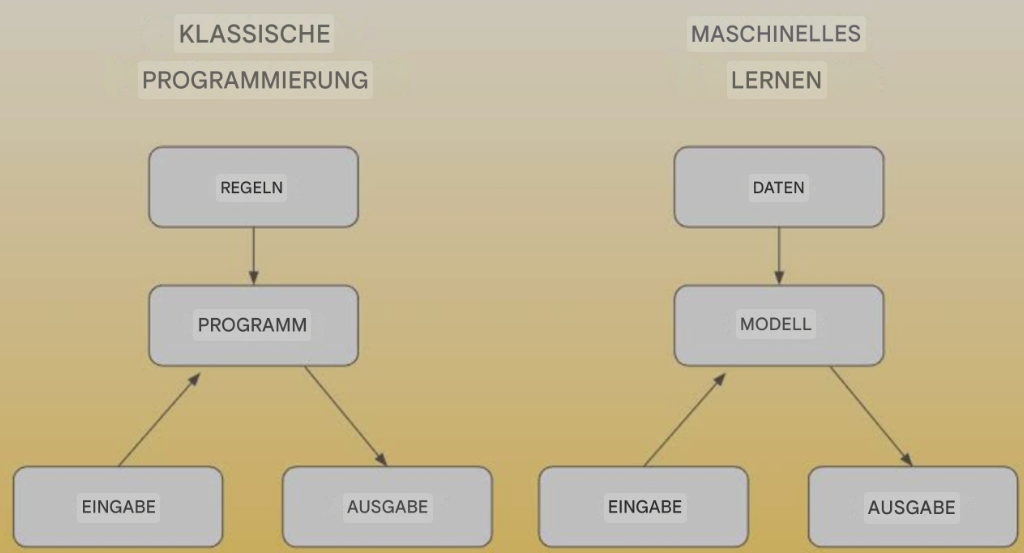

In diesem [scrollytelling](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) Artikel wird das Prinzip des maschinellen Lernens auf eindrückliche Weise erläutert.

### Train-Test Split
## Das Train-Test-Split-Verfahren: Eine einfache Erklärung

Stellen wir uns vor, wir möchten ein Kind auf eine Matheprüfung vorbereiten. Wir würden sicherlich nicht alle Aufgaben aus dem Lehrbuch zum Üben geben und dann genau dieselben Aufgaben in der Prüfung stellen. Das Kind würde einfach die Lösungen auswendig lernen, ohne wirklich zu verstehen, wie man die Probleme löst. Ein fairer Test besteht aus neuen (aber ähnlichen), vorher nicht gesehenen Aufgaben.

Im Machine Learning ist das **Train-Test-Split-Verfahren** genau das gleiche Prinzip. Es ist eine grundlegende Methode, um zu überprüfen, wie gut ein Modell neue, unbekannte Daten verallgemeinern kann.

Typischerweise werden die Daten in einem bestimmten Verhältnis aufgeteilt, z. B. **80 % für das Training und 20 % für das Testen**. Es ist entscheidend, dass die Aufteilung **zufällig** erfolgt. So stellen wir sicher, dass sowohl das Trainings- als auch das Test-Set eine repräsentative Stichprobe der gesamten Daten darstellt.

### Was ist das Ziel?

Das Ziel ist es, die Daten, die wir zum Trainieren Ihres Modells haben, in zwei Teile aufzuteilen:

1.  **Trainings-Set (Trainingsdaten):** Dies ist der größte Teil Ihrer Daten. Er wird verwendet, um das Modell zu **"trainieren"**. Das Modell lernt aus diesen Daten, Muster und Beziehungen zu erkennen. Es ist so, als würde das Kind mit diesen Aufgaben üben.

2.  **Test-Set (Testdaten):** Dies ist der kleinere Teil Ihrer Daten. Er wird verwendet, um das trainierte Modell zu **"evaluieren"**. Das Modell macht Vorhersagen auf diesen Daten, die es noch nie zuvor gesehen hat. Es ist so, als würde man dem Kind die neuen Prüfungsaufgaben geben.



### Warum ist das so wichtig?

Indem Sie das Modell an einem separaten, ungesehenen Test-Set testen, können wir beurteilen, wie gut es in der realen Welt funktionieren würde. Dies hilft uns, zwei Hauptprobleme zu vermeiden:

* **Überanpassung (Overfitting):** Das Modell lernt die Trainingsdaten so gut auswendig, dass es jede kleine Abweichung als wichtig betrachtet. Es passt sich perfekt an die Trainingsdaten an, kann aber bei neuen Daten keine guten Vorhersagen treffen. Das wäre, wie wenn das Kind nur die auswendig gelernten Lösungen kann. Ein hohes Maß an Überanpassung würde dazu führen, dass das Modell auf dem Trainings-Set sehr gut abschneidet, aber auf dem Test-Set sehr schlecht.

* **Unteranpassung (Underfitting):** Das Modell ist zu einfach und hat die grundlegenden Muster in den Trainingsdaten nicht gelernt. Es ist, als ob das Kind nicht genug geübt hat und sowohl bei den Übungsaufgaben als auch in der Prüfung versagt.




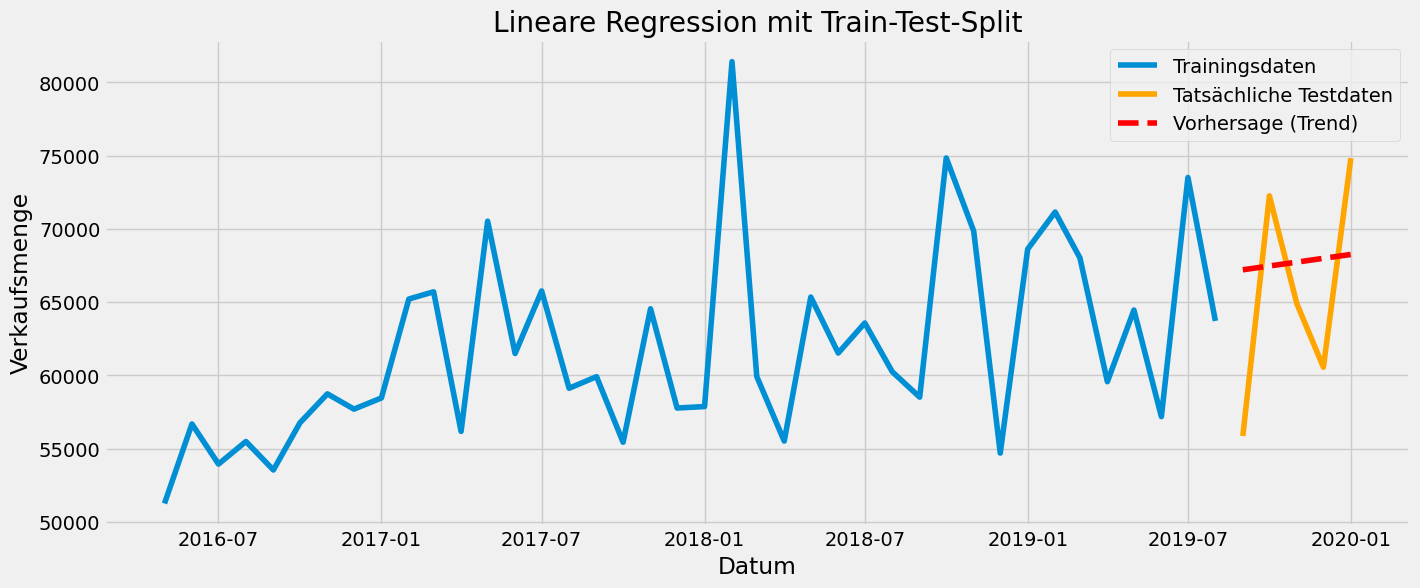

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx")
dfGrouped = df.drop(columns=['SalesValue', 'Customer', 'SalesTransactionID', 'SalesItem'])
dfGrouped['SalesDate'] = pd.to_datetime(dfGrouped['SalesDate'])
dfGrouped = dfGrouped.set_index('SalesDate')
monthly_df = dfGrouped.resample('MS').sum()
d_df = monthly_df.reset_index().dropna()
d_df.columns = ['ds', 'y']

# --- Schritt 1: Erstellen Sie das numerische Feature für die Zeit ---
d_df['time'] = np.arange(len(d_df.index))

# --- Schritt 2: Führen Sie den Train-Test-Split durch ---
# Wir teilen die Daten zeitlich auf. Die ersten ~80% sind zum Trainieren,
# die restlichen ~20% zum Testen.
split_index = int(len(d_df) * 0.8)
train_data = d_df.iloc[:split_index]
test_data = d_df.iloc[split_index:]

# --- Schritt 3: Bereiten Sie die Trainings- und Testdaten vor ---
# Trainingsdaten
X_train = train_data.loc[:, ['time']].values
y_train = train_data.loc[:, 'y'].values

# Testdaten
X_test = test_data.loc[:, ['time']].values
y_test = test_data.loc[:, 'y'].values

# --- Schritt 4: Trainieren Sie das Modell NUR auf den Trainingsdaten ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Schritt 5: Machen Sie Vorhersagen für den Testzeitraum ---
# Das Modell hat die Testdaten noch nie gesehen.
predictions = model.predict(X_test)

# --- Schritt 6: Visualisieren Sie die Ergebnisse ---
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 6))

# Plotten der Trainingsdaten, Testdaten und Vorhersagen
plt.plot(train_data['ds'], y_train, label='Trainingsdaten')
plt.plot(test_data['ds'], y_test, label='Tatsächliche Testdaten', color='orange')
plt.plot(test_data['ds'], predictions, label='Vorhersage (Trend)', color='red', linestyle='--')

plt.title('Lineare Regression mit Train-Test-Split')
plt.xlabel('Datum')
plt.ylabel('Verkaufsmenge')
plt.legend()
plt.show()

In [ ]:
# Wir bewerten, wie gut die Vorhersagen ('predictions') mit den
# tatsächlichen Werten ('y_test') übereinstimmen.
errors = y_test - predictions

# Mittlerer Absoluter Fehler (MAE)
mae = np.mean(np.abs(errors))

# Wurzel der Mittleren Quadratischen Fehler (RMSE)
rmse = np.sqrt(np.mean(errors**2))

# Berechnung des prozentualen Fehlers im Verhältnis zum Mittelwert der Testdaten
y_test_mean = np.mean(y_test)
mae_percent = (mae / y_test_mean) * 100
rmse_percent = (rmse / y_test_mean) * 100

print("--- Metriken zur Bewertung der Vorhersage auf Testdaten ---")
print(f"Mittlerer Absoluter Fehler (MAE): {mae:.2f}")
print(f"  -> Die Vorhersage weicht im Durchschnitt um diesen Wert von der Wahrheit ab.")
print(f"Wurzel der Mittleren Quadratischen Fehler (RMSE): {rmse:.2f}")
print(f"  -> Ähnlich wie MAE, bestraft aber größere Fehler stärker.")
print(f"Prozentualer MAE: {mae_percent:.2f}%")
print(f"Prozentualer RMSE: {rmse_percent:.2f}%\n")

--- Metriken zur Bewertung der Vorhersage auf Testdaten ---
Mittlerer Absoluter Fehler (MAE): 6310.40
  -> Die Vorhersage weicht im Durchschnitt um diesen Wert von der Wahrheit ab.
Wurzel der Mittleren Quadratischen Fehler (RMSE): 7043.46
  -> Ähnlich wie MAE, bestraft aber größere Fehler stärker.
Prozentualer MAE: 9.67%
Prozentualer RMSE: 10.79%



## Aufgabe: Welche Rolle spielt die Gruppierung der Umsätze in Bezug auf Vorhersagen?

In [ ]:
# Geben Sie hier Ihre Gedanken ein...






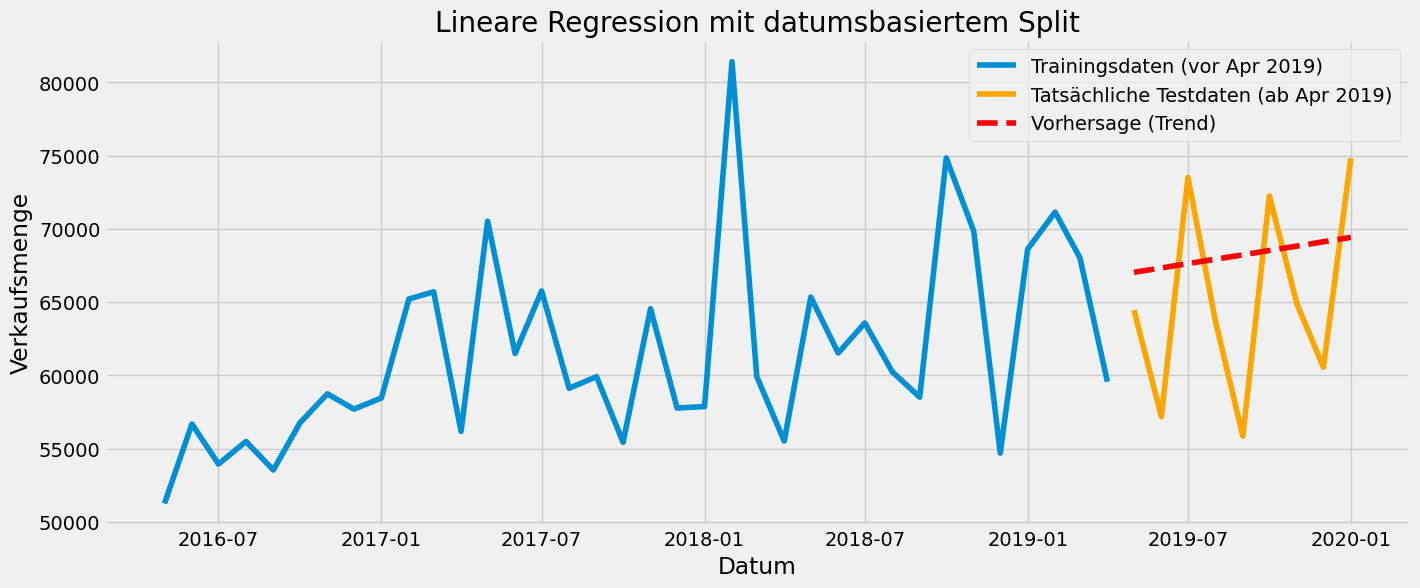

In [ ]:
# anstatt des 80/20 Splits, nehmen wir nun die Testdaten ab 1.5.2019
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx")
dfGrouped = df.drop(columns=['SalesValue', 'Customer', 'SalesTransactionID', 'SalesItem'])
dfGrouped['SalesDate'] = pd.to_datetime(dfGrouped['SalesDate'])
dfGrouped = dfGrouped.set_index('SalesDate')
monthly_df = dfGrouped.resample('MS').sum()
d_df = monthly_df.reset_index().dropna()
d_df.columns = ['ds', 'y']

# --- Schritt 1: Erstellen Sie das numerische Feature für die Zeit ---
d_df['time'] = np.arange(len(d_df.index))

# --- Schritt 2: Führen Sie den Train-Test-Split nach Datum durch ---
# Wir definieren ein festes Datum für den Split.
split_date = '2019-05-01'
train_data = d_df[d_df['ds'] < split_date]
test_data = d_df[d_df['ds'] >= split_date]

# --- Schritt 3: Bereiten Sie die Trainings- und Testdaten vor ---
# Trainingsdaten
X_train = train_data.loc[:, ['time']].values
y_train = train_data.loc[:, 'y'].values

# Testdaten
X_test = test_data.loc[:, ['time']].values
y_test = test_data.loc[:, 'y'].values

# --- Schritt 4: Trainieren Sie das Modell NUR auf den Trainingsdaten ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Schritt 5: Machen Sie Vorhersagen für den Testzeitraum ---
predictions = model.predict(X_test)

# --- Schritt 6: Visualisieren Sie die Ergebnisse ---
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 6))

# Plotten der Trainingsdaten, Testdaten und Vorhersagen
plt.plot(train_data['ds'], y_train, label='Trainingsdaten (vor Mai 2019)')
plt.plot(test_data['ds'], y_test, label='Tatsächliche Testdaten (ab Mai 2019)', color='orange')
plt.plot(test_data['ds'], predictions, label='Vorhersage (Trend)', color='red', linestyle='--')

plt.title('Lineare Regression mit datumsbasiertem Split')
plt.xlabel('Datum')
plt.ylabel('Verkaufsmenge')
plt.legend()
plt.show()

# Aufgabe: Experimentieren Sie mit dem Train- Test Split

In [ ]:
# Geben Sie hier Ihren Code ein...


In [ ]:
# Wir bewerten, wie gut die Vorhersagen ('predictions') mit den
# tatsächlichen Werten ('y_test') übereinstimmen.
errors = y_test - predictions

# Mittlerer Absoluter Fehler (MAE)
mae = np.mean(np.abs(errors))

# Wurzel der Mittleren Quadratischen Fehler (RMSE)
rmse = np.sqrt(np.mean(errors**2))

# Berechnung des prozentualen Fehlers im Verhältnis zum Mittelwert der Testdaten
y_test_mean = np.mean(y_test)
mae_percent = (mae / y_test_mean) * 100
rmse_percent = (rmse / y_test_mean) * 100

print("--- Metriken zur Bewertung der Vorhersage auf Testdaten ---")
print(f"Mittlerer Absoluter Fehler (MAE): {mae:.2f}")
print(f"  -> Die Vorhersage weicht im Durchschnitt um diesen Wert von der Wahrheit ab.")
print(f"Wurzel der Mittleren Quadratischen Fehler (RMSE): {rmse:.2f}")
print(f"  -> Ähnlich wie MAE, bestraft aber größere Fehler stärker.")
print(f"Prozentualer MAE: {mae_percent:.2f}%")
print(f"Prozentualer RMSE: {rmse_percent:.2f}%\n")

--- Metriken zur Bewertung der Vorhersage auf Testdaten ---
Mittlerer Absoluter Fehler (MAE): 6310.40
  -> Die Vorhersage weicht im Durchschnitt um diesen Wert von der Wahrheit ab.
Wurzel der Mittleren Quadratischen Fehler (RMSE): 7043.46
  -> Ähnlich wie MAE, bestraft aber größere Fehler stärker.
Prozentualer MAE: 9.67%
Prozentualer RMSE: 10.79%



Bis hierhin haben wir ein Machine Learning Modell trainiert, wobei wir uns gedanklich sehr nah an dem Statistikmodell orientiert haben. Tatsächlich zeichnet sich Machine Learning aber dadurch aus, dass das Modell die hinter den Daten liegenden Muster selbst erkennt, um das bestmögliche Vorhersagen abzuleiten. Daher bereiten wir die Daten nun so auf, dass sie dem Konzept von Features und Targets deutlich besser entsprechen.

In [ ]:
#Setting up a benchmark model
#Importing our Raw data, extract month and year from date and pivot Auftragsmenge on Debitor+Article
def import_data():
    df = pd.read_excel('https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx',parse_dates=['SalesDate'])
    df['Year']= pd.DatetimeIndex(df['SalesDate']).year
    df['Month']= pd.DatetimeIndex(df['SalesDate']).month

    df["Period"] = df["Year"].astype(str) + "-" + df["Month"].astype(str)
    df["Period"] = pd.to_datetime(df["Period"]).dt.strftime("%Y-%m")
    #df =  pd.pivot_table(data=df,values="SalesAmount",index=[ "Customer","SalesItem"],columns="Period",aggfunc='sum',fill_value=0)
    df =  pd.pivot_table(data=df,values="SalesAmount",columns="Period",aggfunc='sum',fill_value=0)
    return df

Die grundlegende Idee: Von der Zeitreihe zur Tabelle
Stellen Sie sich die Verkaufsdaten als eine lange Kette von Werten vor. Unser Ziel ist es, den Wert eines Monats (z.B. Januar 2024) vorherzusagen. Ein klassisches Machine Learning-Modell kann dies jedoch nicht, es benötigt eine Tabelle, in der jede Zeile eine Beobachtung und jede Spalte ein Merkmal (Feature) ist.

Unsere datasets-Funktion macht genau das: Sie zerlegt die Zeitreihe in eine Tabelle, die das Machine Learning-Modell verstehen kann:

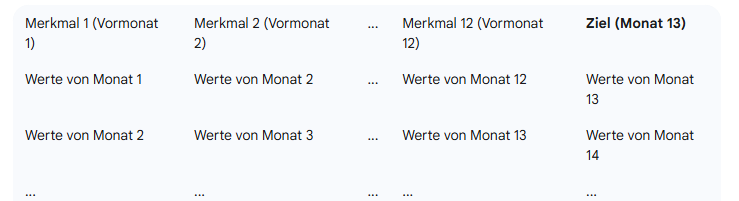

Diese Technik nennt man Feature Engineering. Wir erstellen neue Spalten aus den bestehenden Daten, die das Modell für seine Vorhersage nutzen kann. Die 12 Vormonate sind die Features, und der 13. Monat ist unsere Zielvariable. Mit dieser Tabelle kann das Modell nun lernen, wie die Werte der letzten 12 Monate zusammenhängen, um den Wert des nächsten Monats zu schätzen.

Dieser Ansatz ist effektiv, da er die Stärken von Machine Learning-Modellen nutzt, um komplexe Muster und Nichtlinearitäten in den Daten zu erkennen, die bei rein statistischen Ansätzen wie SARIMA schwieriger zu erfassen wären.

2 Jahre sollten es schon mindestens sein, damit Saisonalität vom Modell erkannt werden kann.

In [ ]:
#Setting our ground data for test and train our models
#12 consecutive months as features, the 13th month in this sequence as target; repeating it for next month on, all in a loop
#this ensures that more months will train our model, not only the default target/feature split. We want our model to learn
#as much monthly patterns as possible. The trick question: how will you receive highest accuracy? Training on 3 months, 6 months,
# one complete year or even on 2 years..? One would argue that it should be at least one complete year, so the model
#can learn any yearly patterns, if there are any at all..

def datasets(df, x_len=12, y_len=1, y_test_len=3): #train with 12 months, predict 1 month, test predict last three months in this loop
#def datasets(df, x_len=12, y_len=3, y_test_len=3):
    D = df.values
    periods = D.shape[1]

    # Training set creation: run through all the possible time windows
    loops = periods + 1 - x_len - y_len - y_test_len
    train = []
    for col in range(loops):
        train.append(D[:,col:col+x_len+y_len])
    train = np.vstack(train)
    X_train, Y_train = np.split(train,[x_len],axis=1)

    # Test set creation: unseen "future" data with the demand just before
    max_col_test = periods + 1 - x_len - y_len
    test = []
    for col in range(loops,max_col_test):
        test.append(D[:,col:col+x_len+y_len])
    test = np.vstack(test)
    X_test, Y_test = np.split(test,[x_len],axis=1)

    # this data formatting is needed if we only predict a single period
    if y_len == 1:
        Y_train = Y_train.ravel()
        Y_test = Y_test.ravel()

    return X_train, Y_train, X_test, Y_test

In [ ]:
#Train and Test Models
#Linear Regression model
import numpy as np
import pandas as pd

df = import_data()
X_train, Y_train, X_test, Y_test = datasets(df)

In [ ]:
X_train

array([[51265, 56692, 53954, 55496, 53552, 56768, 58746, 57704, 58465,
        65217, 65711, 56186],
       [56692, 53954, 55496, 53552, 56768, 58746, 57704, 58465, 65217,
        65711, 56186, 70530],
       [53954, 55496, 53552, 56768, 58746, 57704, 58465, 65217, 65711,
        56186, 70530, 61501],
       [55496, 53552, 56768, 58746, 57704, 58465, 65217, 65711, 56186,
        70530, 61501, 65768],
       [53552, 56768, 58746, 57704, 58465, 65217, 65711, 56186, 70530,
        61501, 65768, 59127],
       [56768, 58746, 57704, 58465, 65217, 65711, 56186, 70530, 61501,
        65768, 59127, 59921],
       [58746, 57704, 58465, 65217, 65711, 56186, 70530, 61501, 65768,
        59127, 59921, 55445],
       [57704, 58465, 65217, 65711, 56186, 70530, 61501, 65768, 59127,
        59921, 55445, 64553],
       [58465, 65217, 65711, 56186, 70530, 61501, 65768, 59127, 59921,
        55445, 64553, 57779],
       [65217, 65711, 56186, 70530, 61501, 65768, 59127, 59921, 55445,
        64553, 57779

In [ ]:
Y_train

array([70530, 61501, 65768, 59127, 59921, 55445, 64553, 57779, 57880,
       81414, 59926, 55524, 65351, 61533, 63582, 60256, 58522, 74844,
       69858, 54703, 68626, 71152, 68024, 59575, 64466, 57192, 73512,
       63722, 55871, 72258])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

reg = LinearRegression() # Create a linear regression object

linreg = reg.fit(X_train,Y_train) # Fit it to the training data
linreg.score(X_train, Y_train)
linreg.score(X_test, Y_test)

# Create two predictions for the training and test sets
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print ("Linear Regression on train set coefficient determination of R^2:",linreg.score(X_train, Y_train)*100)
print ("Linear Regression on test set coefficient determination of R^2:",linreg.score(X_test, Y_test)*100)


# Compute the MAE% for both the training and test sets
MAElinear_train = np.mean(abs(Y_train - Y_train_pred))/np.mean(Y_train)
MAElinear_test = np.mean(abs(Y_test - Y_test_pred))/np.mean(Y_test)

# Compute the MAE for both the training and test sets
MAEabslinear_train = np.mean(abs(Y_train - Y_train_pred))
MAEabslinear_test = np.mean(abs(Y_test - Y_test_pred))

# Compute the MSE for both the training and test sets
MSElinear_train=mean_squared_error(Y_train,Y_train_pred)
MSElinear_test=mean_squared_error(Y_test,Y_test_pred)

# Print the results
print("Linear Regression train set MAE%:",round(MAElinear_train*100,1))
print("Linear Regression test set MAE%:",round(MAElinear_test*100,1))
print("Linear Regression train set MAE:",round(MAEabslinear_train,1))
print("Linear Regression test set MAE:",round(MAEabslinear_test,1))
print("Linear Regression train set MSE:",round(MSElinear_train,1))
print("Linear Regression test set MSE:",round(MSElinear_test,1))

Linear Regression on train set coefficient determination of R^2: 51.75277010831557
Linear Regression on test set coefficient determination of R^2: -24.312653224277405
Linear Regression train set MAE%: 5.5
Linear Regression test set MAE%: 7.1
Linear Regression train set MAE: 3503.5
Linear Regression test set MAE: 4761.2
Linear Regression train set MSE: 20939144.3
Linear Regression test set MSE: 44310798.5


# Aufgabe: Ist dieses Ergebnis besser als die "einfache Lineare Regression ML" aus dem vorherigen Schritt?  
Lohnt sich also das Feature Engineering tatsächlich?  
Ändern Sie den Zeitraum der Vorhersagen bzw. das Zeitfenster der Daten, anhand derer das Modell trainiert wird.


In [ ]:
# Geben Sie hier Ihren Code ein...










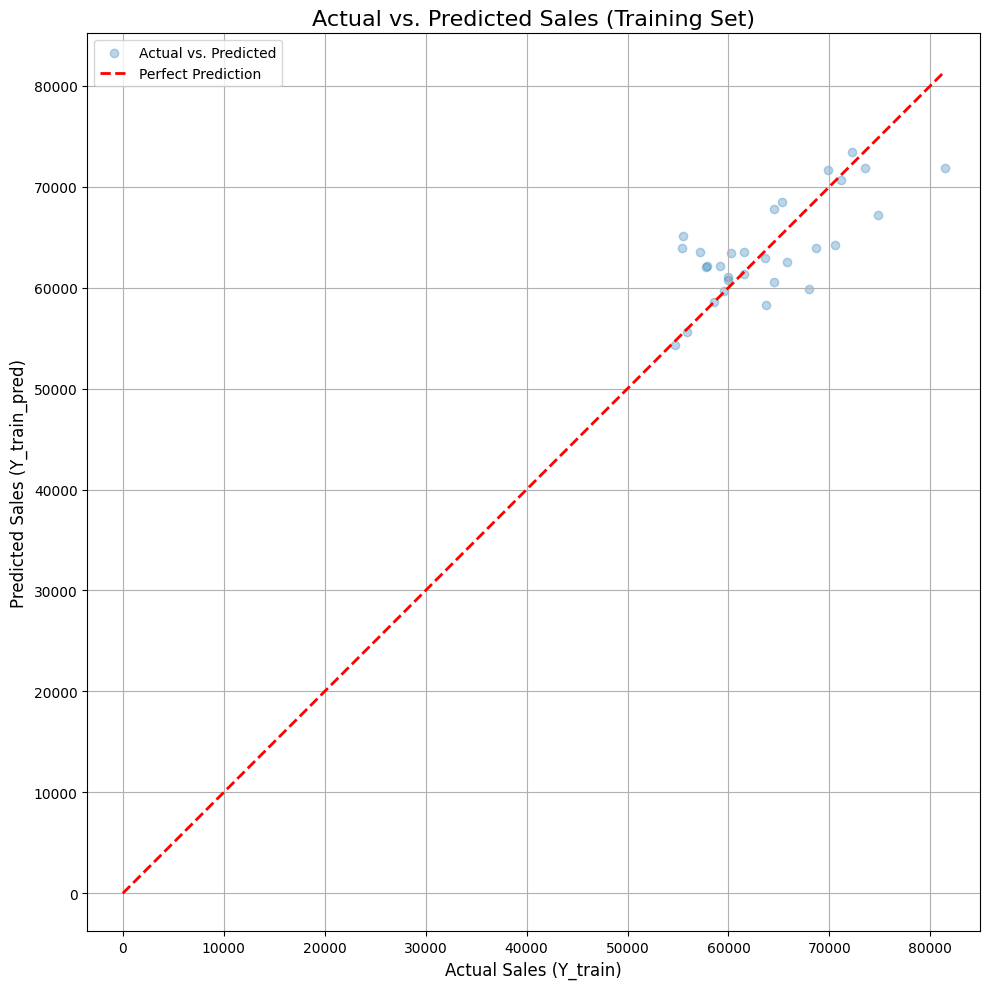

In [ ]:
# --- Plotting Section ---
# This plot shows how well the predictions match the actual values.
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from warnings import simplefilter
plt.figure(figsize=(10, 10))

# Create a scatter plot of actual vs. predicted values
plt.scatter(Y_train, Y_train_pred, alpha=0.3, label='Actual vs. Predicted')

# Add a line for perfect predictions (y=x)
# This helps visualize the model's accuracy.
max_val = max(np.max(Y_train), np.max(Y_train_pred))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# --- Formatting the Plot ---
plt.title('Actual vs. Predicted Sales (Training Set)', fontsize=16)
plt.xlabel('Actual Sales (Y_train)', fontsize=12)
plt.ylabel('Predicted Sales (Y_train_pred)', fontsize=12)
plt.legend()
plt.grid(True)
plt.axis('equal') # Ensures the x and y axes have the same scale for a true 45-degree line
plt.tight_layout()

# Display the plot
plt.show()


Es gibt deutlich beeindruckendere Machine Learning Modelle als die lineare Regression. Schauen wir uns daher als nächsten Kandidaten die Decision Trees an.

### Decision Tree

Ein Decision Tree (Entscheidungsbaum) ist ein Algorithmus, der aus einer Reihe von "Ja" oder "Nein" Fragen lernt, um eine Entscheidung zu treffen. Das Ziel ist es, mit jeder Frage die Daten so aufzuteilen, dass die Gruppen am Ende so rein wie möglich sind, d. h. die Ergebnisse innerhalb einer Gruppe sich sehr ähnlich sind.

| Periode 1 ($X_1$) | Periode 2 ($X_2$) | Periode 3 ($X_3$) | Periode 4 ($X_4$) | Ergebnis ($Y$) |
|:---:|:---:|:---:|:---:|:---:|
| 12 € | 15 € | 8 € | 10 € | 8 € |
| 5 € | 6 € | 4 € | 5 € | 3 € |
| 18 € | 22 € | 16 € | 20 € | 15 € |
| 7 € | 8 € | 5 € | 6 € | 4 € |
| 14 € | 17 € | 10 € | 12 € | 9 € |
| 4 € | 5 € | 3 € | 4 € | 2 € |
| 20 € | 25 € | 18 € | 22 € | 16 € |
| 6 € | 7 € | 4 € | 5 € | 3 € |
| 11 € | 14 € | 9 € | 11 € | 7 € |
| 19 € | 21 € | 17 € | 19 € | 14 € |

---
## Was ist eine gute Frage für einen Decision Tree?
Eine **gute Frage** ist also eine, die die Daten in zwei Gruppen teilt, die jeweils **sehr homogen** sind. Mit anderen Worten: Die Werte von $Y$ in der einen Gruppe sind sich alle sehr ähnlich, und die Werte von $Y$ in der anderen Gruppe sind sich ebenfalls sehr ähnlich, aber die beiden Gruppen unterscheiden sich stark voneinander.

In unserer Tabelle könnte eine gute Frage lauten:

**"Ist der Umsatz in Periode 1 (X1) kleiner als 10 €?"**

* **Wenn die Antwort "Ja" ist** (Umsatz < 10 €):
    * Die Datensätze sind: (5 €, 6 €, 4 €, 5 €), (7 €, 8 €, 5 €, 6 €), (4 €, 5 €, 3 €, 4 €) und (6 €, 7 €, 4 €, 5 €).
    * Die entsprechenden **Ergebnisse ($Y$)** sind: 3 €, 4 €, 2 € und 3 €.
    * Diese Ergebnisse sind alle **relativ niedrig und ähneln sich stark**.

* **Wenn die Antwort "Nein" ist** (Umsatz ≥ 10 €):
    * Die Datensätze sind: (12 €, 15 €, 8 €, 10 €), (18 €, 22 €, 16 €, 20 €), (14 €, 17 €, 10 €, 12 €), (20 €, 25 €, 18 €, 22 €), (11 €, 14 €, 9 €, 11 €) und (19 €, 21 €, 17 €, 19 €).
    * Die entsprechenden **Ergebnisse ($Y$)** sind: 8 €, 15 €, 9 €, 16 €, 7 € und 14 €.
    * Diese Ergebnisse sind alle **relativ hoch und ähneln sich ebenfalls stark**.

Durch diese einfache Beispielfrage haben wir unsere Daten in zwei sehr klare, voneinander getrennte Gruppen aufgeteilt. Der Decision Tree lernt so, dass ein niedriger Umsatz in der ersten Periode wahrscheinlich zu einem niedrigen Gesamtergebnis führt und umgekehrt. Das ist das Kernprinzip, um eine Klassifizierung zu optimieren.

In [ ]:
import pandas as pd
import numpy as np

#DecisionTree Regressor Model

df = import_data()
X_train, Y_train, X_test, Y_test = datasets(df)

# import regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# create a regressor object
#regressor = DecisionTreeRegressor(random_state = 0) # best result on test mae
# - Instantiate a Decision Tree Regressor 5 11 5, 7 11 11, 12 --> random state 0 seems to result in lower test mae!
regressor = DecisionTreeRegressor(max_depth=8,max_features=3,min_samples_leaf=16) #random state 0 seems to result in lower test mae!



## Decision Trees: Warum weniger manchmal mehr ist

Stellen wir uns einen **Entscheidungsbaum** (Decision Tree) als eine Reihe von Ja/Nein-Fragen vor, die ein Computer stellt, um zu einer Entscheidung zu gelangen. Ohne die richtigen Regeln würde der Baum so lange wachsen, bis er für jedes einzelne Target eine eigene, sehr spezifische Antwort findet.

Das ist, als würde man für jede Person die eine perfekte Adresse auswendig lernen, anstatt sich einfach zu merken, in welcher Stadt sie wohnt. Dieses Auswendiglernen nennt man **Overfitting**. Der Baum passt sich so stark an die Trainingsdaten an, dass er bei neuen, ihm unbekannten Daten schlechte Ergebnisse liefert. Er kann dann nicht mehr **verallgemeinern**.

Um dies zu verhindern und den Baum nützlicher zu machen, verwenden wir Begrenzungen. Die wichtigsten sind:

---

### Die wichtigsten Begrenzungskriterien

* **Maximale Tiefe (`max_depth`)**: Dies legt fest, wie viele Fragen der Baum maximal hintereinander stellen darf. Wir sagen dem Baum gewissermaßen: "Frag nicht mehr als 5 Ja/Nein-Fragen, egal was passiert." Das hält den Baum kompakt und verhindert, dass er zu spezifisch wird.

* **Mindestanzahl von Beobachtungen für eine Teilung (`min_samples_split`)**: Dieses Kriterium bestimmt, wie viele Datenpunkte in einem "Knoten" (einem Punkt, an dem eine Frage gestellt wird) vorhanden sein müssen, damit der Baum eine neue Frage stellen darf. Wenn du diesen Wert auf 6 setzt, wird ein Knoten mit nur 5 Datenpunkten nicht weiter geteilt.

* **Mindestanzahl von Beobachtungen in einem Blatt (`min_samples_leaf`)**: Dies ist ein sehr wichtiger Parameter. Er gibt an, wie viele Datenpunkte mindestens in einem "Blatt" (dem Endpunkt, an dem die Entscheidung getroffen wird) sein müssen. Je kleiner dieser Wert ist (z. B. 1 oder 2), desto höher ist die Gefahr des Overfittings, weil der Baum dann wachsen kann, bis er jede einzelne Beobachtung isoliert. Ein größerer Wert zwingt den Baum dazu, Beobachtungen zu gruppieren und allgemeine Muster zu finden.

Diese Kriterien helfen uns, einen Baum zu erstellen, der nicht nur auf den Trainingsdaten gut funktioniert, sondern auch auf neuen, unbekannten Daten genaue Vorhersagen machen kann.

In [ ]:
# fit the regressor with X and Y data
regressor.fit(X_train, Y_train)
regressor.fit(X_test, Y_test)

#Running regressor for accuracy test and train
treereg=regressor.fit(X_train, Y_train)
treereg.score(X_train, Y_train)

treereg_test=regressor.fit(X_test, Y_test)
treereg_test.score(X_test, Y_test)

print ("DecisiontreeRegressor on train set Accuracy:",treereg.score(X_train, Y_train)*100)
print ("DecisiontreeRegressor on test set Accuracy:",treereg_test.score(X_test, Y_test)*100)
# Create a prediction based on our model
Y_train_pred = treereg.predict(X_train)
Y_test_pred = treereg_test.predict(X_test)

# Compute the Mean Absolute Error of the model
import numpy as np
MAE_tree = np.mean(abs(Y_train - Y_train_pred))/np.mean(Y_test)
MAE_test = np.mean(abs(Y_test - Y_test_pred))/np.mean(Y_test)

# Compute the MAE for both the training and test sets
MAEabs_train = np.mean(abs(Y_train - Y_train_pred))
MAEabs_test = np.mean(abs(Y_test - Y_test_pred))

# Compute the MSE for both the training and test sets
MSE_train=mean_squared_error(Y_train,Y_train_pred)
MSE_test=mean_squared_error(Y_test,Y_test_pred)


# Print the results
print("DecisiontreeRegressor on train set MAE%:",round(MAE_tree*100,1))
print("DecisiontreeRegressor on test set MAE%:",round(MAE_test*100,1))
print("DecisiontreeRegressor on train set MAE:",round(MAEabs_train,1))
print("DecisiontreeRegressor on test set MAE:",round(MAEabs_test,1))
print("DecisiontreeRegressor on train set MSE:",round(MSE_train,1))
print("DecisiontreeRegressor on test set MSE:",round(MSE_test,1))

DecisiontreeRegressor on train set Accuracy: -20.97085274009094
DecisiontreeRegressor on test set Accuracy: 0.0
DecisiontreeRegressor on train set MAE%: 9.4
DecisiontreeRegressor on test set MAE%: 8.1
DecisiontreeRegressor on train set MAE: 6306.3
DecisiontreeRegressor on test set MAE: 5376.0
DecisiontreeRegressor on train set MSE: 52500965.2
DecisiontreeRegressor on test set MSE: 35644640.7


### MAE und MSE/RMSE im Decision Tree

Stellen wir uns vor, wir wären der Decision Tree und müssten entscheiden, wie man eine Gruppe von Daten am besten in zwei teilst.

* **Mit der MSE-Regel:** die Teilung so zu machen, dass die größten "Fehltritte" in den Gruppen so klein wie möglich sind. Das Ergebnis ist eine Gruppe mit sehr ähnlichen Werten und wenigen extremen Ausreißern.

* **Mit der MAE-Regel:** die durchschnittliche Entfernung zu minimieren. Große und kleine Fehler werden dabei gleich behandelt.

In der Praxis ist der MSE aufgrund seiner mathematischen Eigenschaften (Differenzierbarkeit) effizienter, um die optimalen Teilungspunkte in einem Decision Tree zu finden. Deshalb ist er der Standard in vielen Bibliotheken wie scikit-learn, obwohl der MAE manchmal eine intuitivere Metrik für die Bewertung der Modellleistung sein kann.

## Aufgabe: Schrauben Sie an den Parametern für den DecisionTreeRegressor. Welche Kombination führt zu den besten Ergebnissen?

In [ ]:
# Geben Sie hier Ihren Code ein...












# Parameter Optimierer (Finetuning)

Glücklicherweise müssen wir nicht manuell nach der besten Kombination suchen, sondern können uns dabei unterstützen lassen.  
In diesem [scrollytelling](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/) Artikel wird das Prinzip des Model Optimierens auf eindrückliche Weise erläutert.

### RandomizedSearchCV
**Randomized Search** optimiert die Hyperparameter eines Entscheidungsbaums (Decision Tree).
* **`RandomizedSearchCV`**: Dies ist der Algorithmus, der eine zufällige Auswahl aus dem `param_dist`-Menü trifft und die besten Parameter findet. Im Gegensatz zu Grid Search, das jede mögliche Kombination testet, ist dies viel schneller, da nur eine zufällige Stichprobe der Kombinationen untersucht wird.
---

In [ ]:
#DecisionTree Regressor Optimization
max_depth = list(range(5,11))
max_depth.append(None)
min_samples_leaf = range(5,20)

param_dist = {"max_depth": max_depth,
              "min_samples_leaf": min_samples_leaf}

#this takes ages
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

tree = DecisionTreeRegressor()
tree_cv = RandomizedSearchCV(tree, param_dist, n_jobs=-1, cv=10, verbose=1, n_iter=1, scoring="neg_mean_absolute_error")#n_iter=100
tree_cv.fit(X_train,Y_train)

print("Tuned Regression Tree Parameters:",tree_cv.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Tuned Regression Tree Parameters: {'min_samples_leaf': 9, 'max_depth': None}
Tree on training set MAE%: 5.6
Tree on test set MAE%: 6.4




### Erklärungen der Parameter

* **`param_dist`**: Dies ist das "Menü" aller Parameter und ihrer möglichen Werte, die der Randomized Search ausprobieren soll.
    * `max_depth`: Dies ist die maximale Tiefe des Baums. Der Code schlägt vor, Tiefen von 5 bis 10 und zusätzlich `None` (unbegrenzt) zu testen.
    * `min_samples_leaf`: Dies ist die Mindestanzahl an Proben, die in einem "Blatt" des Baumes sein müssen. Hier werden Werte von 5 bis 19 getestet.



* **`n_jobs = -1`**: Dieser Parameter steuert, wie viele Prozessorkerne die Optimierung nutzen soll. `n_jobs = -1` bedeutet, dass **alle verfügbaren Kerne** verwendet werden. Das beschleunigt den Prozess erheblich, weil die verschiedenen Hyperparameter-Kombinationen parallel getestet werden können.

* **`cv = 10`**: Dies steht für **Cross-Validation** (Kreuzvalidierung) und gibt an, wie oft das Modell mit verschiedenen Teilen der Daten trainiert und getestet werden soll. `cv=10` bedeutet, dass die Daten in 10 gleich große Teile (`Folds`) aufgeteilt werden. Das Modell wird 10-mal trainiert: Jedes Mal wird ein anderer Teil als Testset verwendet, während die restlichen 9 als Trainingssets dienen.  Dies sorgt dafür, dass die Ergebnisse zuverlässiger sind und nicht zufällig gut aussehen.

* **`verbose = 1`**: Dies steuert die "Ausführlichkeit" der Ausgabe. Der Wert 1 bedeutet, dass die Konsole eine Fortschrittsmeldung ausgibt, wie viele Tests bereits durchgeführt wurden. Ein höherer Wert würde noch mehr Details liefern.

* **`n_iter = 1`**: Dies ist die Anzahl der **zufälligen Kombinationen**, die getestet werden sollen. In deinem Code ist der Wert auf 1 gesetzt, was zu wenig ist. Der Code kommentiert aber `n_iter=100`, was ein guter Wert wäre, um eine umfassendere Suche durchzuführen und bessere Parameter zu finden.

* **`scoring = "neg_mean_absolute_error"`**: Dies ist die Bewertungsmetrik, nach der der Algorithmus die beste Hyperparameter-Kombination auswählt.
    * **Mean Absolute Error (MAE)** misst den durchschnittlichen absoluten Unterschied zwischen den vorhergesagten und den tatsächlichen Werten.
    * Da Scikit-learn davon ausgeht, dass ein **höherer Wert besser** ist, muss man das Vorzeichen umkehren (`neg_` für "negativ"), damit ein kleinerer Fehler einen größeren Score ergibt.



Jezt lassen wir uns die beste Kombination ausgeben, die gefunden wurde.

In [ ]:
Y_train_pred = tree_cv.predict(X_train)
MAE_test = np.mean(abs(Y_train - Y_train_pred))/np.mean(Y_train)
print("Tree on training set MAE%:",round(MAE_test*100,1))

Y_test_pred = tree_cv.predict(X_test)
MAE_test = np.mean(abs(Y_test - Y_test_pred))/np.mean(Y_test)
print("Tree on test set MAE%:",round(MAE_test*100,1))


### Dauer der Validierung

Der Code verwendet die Kombination aus **Randomized Search** und **10-facher Kreuzvalidierung**, um die optimalen Parameter zu finden. Obwohl Random Search schneller ist als Grid Search, muss der Prozess für jede getestete Kombination das Modell **10-mal neu trainieren** (einmal pro `cv`-Fold). Wenn wir `n_iter = 100` verwenden, bedeutet das **100 * 10 = 1000** Trainingsläufe. Dies erklärt, warum der Prozess auf großen Datensätzen lange dauern kann.

## Modell Speichern und Anfragen gegen das Modell schicken

Pickle ist ein **Python-Modul zum Serialisieren und Deserialisieren von Python-Objekten**. Serialisierung bedeutet, ein beliebiges Python-Objekt (wie eine Liste, ein Dictionary oder sogar ein trainiertes Machine-Learning-Modell) in einen **Bytestrom** umzuwandeln. Dieser Bytestrom kann dann einfach in einer Datei gespeichert oder über ein Netzwerk übertragen werden.


Der Hauptvorteil von Pickle ist, dass es uns ermöglicht, den **Zustand von Python-Objekten** zu speichern, ohne diese mühsam in ein anderes Format (wie CSV oder JSON) umwandeln zu müssen.

* **Speichern:** Wir können ein komplexes Objekt wie ein trainiertes Machine-Learning-Modell mit all seinen Parametern und internen Strukturen in einer einzigen Binärdatei speichern.
* **Laden:** Später können wir diese Datei einfach wieder laden, und Pickle rekonstruiert das Objekt exakt in seinem ursprünglichen Zustand.



In [ ]:
import pickle # Importiert die Pickle-Bibliothek, um das Modell zu speichern und zu laden
try:
    # Öffnet eine Datei im binären Schreibmodus ('wb')
    with open('decision_tree_model.pkl', 'wb') as file:
        # Verwendet pickle.dump(), um das Modellobjekt zu serialisieren und in der Datei zu speichern
        pickle.dump(treereg, file)
    print("\nModell erfolgreich als 'decision_tree_model.pkl' gespeichert.")
except Exception as e:
    print(f"\nFehler beim Speichern des Modells: {e}")



Model saved successfully as 'decision_tree_model.pkl'


In [ ]:
try:
    # Öffnet die gespeicherte Datei im binären Lesemodus ('rb')
    with open('decision_tree_model.pkl', 'rb') as file:
        # Verwendet pickle.load(), um das Modellobjekt zu deserialisieren und zu laden
        loaded_model = pickle.load(file)
    print("Modell erfolgreich geladen.")

    # Erstellt einen neuen Datenpunkt für die Vorhersage.
    # Dieser muss die gleiche Anzahl an Merkmalen (Spalten) wie die Trainingsdaten haben.
    new_data_point = np.array([[5000, 6000, 6500, 4000,5000, 6000, 6500, 4000,5000, 6000, 6500, 4000]])

    # Führt eine Vorhersage mit dem geladenen Modell durch
    new_prediction = loaded_model.predict(new_data_point)

    # Gibt die Vorhersage aus
    print(f"Vorhersage für den neuen Datenpunkt {new_data_point[0]}: {round(new_prediction[0], 2)}")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")

Model loaded successfully.
Prediction for the new data point [5000 6000 6500 4000 5000 6000 6500 4000 5000 6000 6500 4000]: 66764.0


# (Random) Forest

Dieser Codeausschnitt definiert und trainiert ein **Random Forest**-Modell. Ein Random Forest ist ein Machine-Learning-Algorithmus, der viele einzelne **Entscheidungsbäume** erstellt und ihre Vorhersagen kombiniert, um ein besseres, stabileres Ergebnis zu erzielen.  Die genannten Parameter steuern, wie diese einzelnen Bäume gebaut werden.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest = RandomForestRegressor(bootstrap=True, max_features="sqrt", min_samples_leaf=9, max_depth=7)

# Train the model on the training data
forest.fit(X_train, Y_train)

# Evaluate on the training data
Y_train_pred = forest.predict(X_train)
rf_train_score = forest.score(X_train, Y_train)
MAE_train_per = np.mean(abs(Y_train - Y_train_pred)) / np.mean(Y_train)
MAE_train = np.mean(abs(Y_train - Y_train_pred))
MSE_train = mean_squared_error(Y_train, Y_train_pred)

# Evaluate on the test data
Y_test_pred = forest.predict(X_test)
rf_test_score = forest.score(X_test, Y_test)
MAE_test_per = np.mean(abs(Y_test - Y_test_pred)) / np.mean(Y_test)
MAE_test = np.mean(abs(Y_test - Y_test_pred))
MSE_test = mean_squared_error(Y_test, Y_test_pred)

print("Random Forest on train set Accuracy:", rf_train_score * 100)
print("Random Forest on test set Accuracy:", rf_test_score * 100)
print("Random Forest on train set MAE%:", round(MAE_train_per * 100, 1))
print("Random Forest on test set MAE%:", round(MAE_test_per * 100, 1))
print("Random Forest on train set MAE:", round(MAE_train, 1))
print("Random Forest on test set MAE:", round(MAE_test, 1))
print("Random Forest on train set MSE:", round(MSE_train, 1))
print("Random Forest on test set MSE:", round(MSE_test, 1))

Random Forest on train set Accuracy: 19.80989988723527
Random Forest on test set Accuracy: -24.039267239504426
Random Forest on train set MAE%: 7.7
Random Forest on test set MAE%: 7.2
Random Forest on train set MAE: 4910.4
Random Forest on test set MAE: 4798.0
Random Forest on train set MSE: 34802248.3
Random Forest on test set MSE: 44213351.1


---

### Parameter-Erklärung

* **`bootstrap=True`**: Dies ist der Kern des "Random"-Teils im Namen. `bootstrap=True` bedeutet, dass jeder einzelne Entscheidungsbaum im Forest auf einer **zufälligen Stichprobe** der ursprünglichen Daten trainiert wird. Dabei können manche Datenpunkte mehrfach vorkommen, während andere gar nicht verwendet werden. Dies sorgt für eine Vielfalt unter den Bäumen und macht das Modell robuster gegen Überanpassung (Overfitting).

* **`max_features="sqrt"`**: Dieser Parameter steuert, wie viele Merkmale (Features) ein einzelner Baum bei jeder Entscheidung (Split) berücksichtigen darf. `"sqrt"` bedeutet, dass jeder Baum nur die **Quadratwurzel der Gesamtzahl der Features** zufällig auswählt, um den besten Split zu finden. Das führt zu einer weiteren Diversifizierung der Bäume.

* **`min_samples_leaf=9`**: Dieser Parameter gibt die **Mindestanzahl an Beobachtungen** an, die in einem "Blatt" (dem Endpunkt eines Baumes) sein müssen. Ein höherer Wert zwingt den Baum, größere Gruppen zu bilden, und verringert die Wahrscheinlichkeit von Überanpassung.

* **`max_depth=7`**: Dies begrenzt die **maximale Tiefe** jedes Baumes, also die Anzahl der aufeinanderfolgenden Fragen, die gestellt werden dürfen. Eine geringere Tiefe verhindert, dass der Baum zu spezifisch für die Trainingsdaten wird, und hilft ebenfalls, Überanpassung zu vermeiden.

### Erklärungen der Logik

* **`forest.fit(X_train, Y_train)`**: Dieser Befehl trainiert das Modell. Der Random Forest analysiert die Trainingsdaten (`X_train`) und lernt, wie sie mit den gewünschten Ergebnissen (`Y_train`) zusammenhängen. Das ist der einzige richtige Ort, um das `fit`-Kommando aufzurufen, da das Modell nur auf Trainingsdaten lernen sollte.

* **`Y_train_pred = forest.predict(X_train)`**: Das trainierte Modell wird verwendet, um Vorhersagen für die Trainingsdaten zu treffen. Dies dient zur Überprüfung, wie gut das Modell auf den Daten funktioniert, die es bereits "gesehen" hat.

* **`Y_test_pred = forest.predict(X_test)`**: Dies ist der entscheidende Schritt. Das Modell trifft Vorhersagen für die **Testdaten**, die es noch nie zuvor gesehen hat. Die Leistung auf diesen Daten (`Y_test`) gibt einen realistischen Eindruck davon, wie gut das Modell in der realen Welt funktionieren würde.

# Aufgabe: Ändern der Trainingsparameter  
Probieren Sie unterschiedliche Variationen. Wer trainert das beste Random Forest Model?

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest = RandomForestRegressor(Geben Sie hier Ihren Code ein...)

# Train the model on the training data
forest.fit(X_train, Y_train)

# Evaluate on the training data
Y_train_pred = forest.predict(X_train)
rf_train_score = forest.score(X_train, Y_train)
MAE_train_per = np.mean(abs(Y_train - Y_train_pred)) / np.mean(Y_train)
MAE_train = np.mean(abs(Y_train - Y_train_pred))
MSE_train = mean_squared_error(Y_train, Y_train_pred)

# Evaluate on the test data
Y_test_pred = forest.predict(X_test)
rf_test_score = forest.score(X_test, Y_test)
MAE_test_per = np.mean(abs(Y_test - Y_test_pred)) / np.mean(Y_test)
MAE_test = np.mean(abs(Y_test - Y_test_pred))
MSE_test = mean_squared_error(Y_test, Y_test_pred)

print("Random Forest on train set Accuracy:", rf_train_score * 100)
print("Random Forest on test set Accuracy:", rf_test_score * 100)
print("Random Forest on train set MAE%:", round(MAE_train_per * 100, 1))
print("Random Forest on test set MAE%:", round(MAE_test_per * 100, 1))
print("Random Forest on train set MAE:", round(MAE_train, 1))
print("Random Forest on test set MAE:", round(MAE_test, 1))
print("Random Forest on train set MSE:", round(MSE_train, 1))
print("Random Forest on test set MSE:", round(MSE_test, 1))

# Aufgabe: Random Forest Optimierer
Führen Sie u.s. Zelle aus. Hatten Sie manuell ein besseres Ergebnis erzielen können?

In [ ]:
#For Random Forest, optimal parameter findings:
#takes appr. 0,5h
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#from warnings import simplefilter

#simplefilter(action='ignore', category=FutureWarning)

max_features = range(1,3)#3,8
max_depth = range(6,11)
min_samples_split = range(5,15)
min_samples_leaf = range(5,15)
bootstrap = [True,False]

param_dist = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

forest = RandomForestRegressor(n_estimators=50, n_jobs=1)
forest_cv = RandomizedSearchCV(forest, param_dist, cv=3, n_jobs=-1, verbose=2, n_iter=2, scoring="neg_mean_absolute_error")#verbose=2, n_iter=400, scoring="neg_mean_absolute_error")
forest_cv.fit(X_train,Y_train)

print("Tuned Forest Parameters:", forest_cv.best_params_)

Y_train_pred = forest_cv.predict(X_train)
MAE_train = np.mean(abs(Y_train - Y_train_pred))
MAE_trainper = np.mean(abs(Y_train - Y_train_pred))/np.mean(Y_train)
#print("Forest on training set MAE%:",round(MAE_train*100,1))

Y_test_pred = forest_cv.predict(X_test)
MAE_test = np.mean(abs(Y_test - Y_test_pred))
MAE_testper = np.mean(abs(Y_test - Y_test_pred))/np.mean(Y_test)
#print("Forest on test set MAE%:",round(MAE_test*100,1))

rf_train=forest_cv.fit(X_train, Y_train)

rf_test=forest_cv.fit(X_test, Y_test)



# Compute the MSE for both the training and test sets
MSE_train=mean_squared_error(Y_train,Y_train_pred)
MSE_test=mean_squared_error(Y_test,Y_test_pred)

print ("Random Forest on train set Accuracy:",rf_train.score(X_train, Y_train)*100)
print ("Random Forest on test set Accuracy:",rf_test.score(X_test, Y_test)*100)
print("Random Forest on train set MAE%:",round(MAE_trainper*100,1))
print("Random Forest on test set MAE%:",round(MAE_testper*100,1))
print("Random Forest on train set MAE:",round(MAE_train,1))
print("Random Forest on test set MAE:",round(MAE_test,1))
print("Random Forest on train set MSE:",round(MSE_train,1))
print("Random Forest on test set MSE:",round(MSE_test,1))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Tuned Forest Parameters: {'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 2, 'max_depth': 7, 'bootstrap': False}
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Random Forest on train set Accuracy: -630630.0
Random Forest on test set Accuracy: -537600.0
Random Forest on train set MAE%: 5.8
Random Forest on test set MAE%: 5.5
Random Forest on train set MAE: 3689.2
Random Forest on test set MAE: 3670.2
Random Forest on train set MSE: 19822825.7
Random Forest on test set MSE: 31309473.2


# Feature Importance und Feature Optimization

Das Konzept der **Feature Importance** ist entscheidend, um Machine-Learning-Modelle, die oft als "Black Boxes" gelten, besser zu verstehen.

Bei traditionellen statistischen Modellen, wie beispielsweise der linearen Regression, können Sie direkt ablesen, wie stark eine bestimmte Input-Variable (z.B. der Preis) den Output (z.B. den Umsatz) beeinflusst. Diese Modelle sind transparent und leicht zu interpretieren.

Machine-Learning-Modelle, insbesondere komplexe Ensembles wie der **Random Forest**, lernen dagegen sehr komplexe, nicht-lineare Muster, die der menschlichen Logik schwer zugänglich sind. Sie können nicht einfach zeigen, ob sie beispielsweise einen monatlichen Trend oder eine saisonale Schwankung erkannt haben. Hier kommt die Feature Importance ins Spiel. Sie hilft uns, die "Denkweise" des Modells zu entschlüsseln, indem sie offenlegt, welche Input-Variablen für seine Vorhersagen am wichtigsten waren.



Die Feature Importance für einen Random Forest Regressor berechnen wir folgendermaßen:

1.  **Modell-Setup:**
    `forest = RandomForestRegressor(...)`
    Hier wird ein Random Forest Modell mit bestimmten Parametern erstellt. **Wichtig:** Diese Parameter steuern das Verhalten jedes einzelnen Baumes im Forest.

2.  **Modell-Training:**
    `forest.fit(X_train, Y_train)`
    Das Modell wird auf den Trainingsdaten (`X_train`) trainiert. Während dieses Prozesses analysiert der Algorithmus, welche Input-Features (`X_train`-Spalten) am effektivsten sind, um die richtigen Vorhersagen (`Y_train`) zu treffen. Die Bedeutung jedes Features wird dabei im Hintergrund berechnet.

3.  **Feature Importance extrahieren:**
    `imp_forest = forest.feature_importances_.reshape(-1,1)`
    Nach dem Training hat das `forest`-Objekt ein Attribut namens **`.feature_importances_`**. Dieses Attribut enthält eine Liste von Werten, die angeben, wie wichtig jedes Feature für die Vorhersagen des Modells war. Je höher der Wert, desto wichtiger das Feature.

4.  **Daten aufbereiten und visualisieren:**
    Der Rest des Codes bereitet die extrahierten Wichtigkeitswerte auf und visualisiert sie. Das **Balkendiagramm** zeigt visuell, welche Features am wichtigsten waren, von der höchsten zur niedrigsten Bedeutung. So können wir auf einen Blick erkennen, welche Input-Variablen das Modell am meisten beeinflusst haben.

<Axes: >

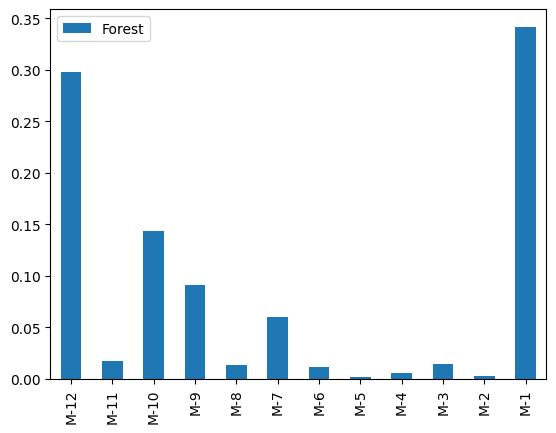

In [ ]:
import pandas as pd
import numpy as np

df = import_data()
X_train, Y_train, X_test, Y_test = datasets(df)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=200, min_samples_split=12,
                               min_samples_leaf=8, max_features=4, max_depth=9, bootstrap=False)
forest.fit(X_train,Y_train)

features = []
columns = X_train.shape[1]
for column in range(columns):
    features.append("M-"+str(columns-column))


imp_forest = forest.feature_importances_.reshape(-1,1)

importances = pd.DataFrame(data=imp_forest,index=features,columns=["Forest"])


importances.plot(kind="bar")

Dieses Balkendiagramm zeigt die **Feature Importance** eines Random-Forest-Modells, das zur Vorhersage von Datenpunkten basierend auf zwölf vergangenen Monaten (Perioden) trainiert wurde.  Die Ergebnisse lassen sich wie folgt interpretieren:

---

### Interpretation

* **Höchste Wichtigkeit von M-1 und M-12:** Die Balken für **M-1** (den letzten Monat) und **M-12** (den Monat vor einem Jahr) sind mit Abstand am höchsten. Dies bedeutet, dass diese beiden Features die größte Bedeutung für die Vorhersagen des Modells haben.
    * **M-1 (letzter Monat):** Es ist logisch, dass der Wert des unmittelbar vorhergehenden Monats die wichtigste Information für eine kurzfristige Prognose ist. Der Algorithmus hat gelernt, dass die Vorhersage für den nächsten Monat stark von der aktuellen Situation abhängt.
    * **M-12 (Monat des Vorjahres):** Die hohe Wichtigkeit dieses Features deutet darauf hin, dass das Modell eine **Saisonalität** erkannt hat. Es weiß, dass der Wert im Vorhersagemonat stark mit dem Wert des gleichen Monats im letzten Jahr korreliert.

* **Mittlere Wichtigkeit von M-9 und M-10:** Die Monate **M-9** und **M-10** sind ebenfalls von gewisser Bedeutung, wenn auch deutlich weniger als M-1 und M-12. Dies könnte auf weitere, komplexere saisonale oder zyklische Muster hindeuten, die das Modell erkannt hat.

* **Geringe Wichtigkeit der restlichen Monate:** Die Werte für **M-2**, **M-3**, **M-4**, **M-5**, **M-6**, **M-7**, **M-8** und **M-11** sind sehr gering. Das zeigt, dass der Random Forest diese Datenpunkte als relativ unwichtig für die Vorhersage des 13. Monats einstuft.

Das Modell konzentriert sich hauptsächlich auf die jüngste Vergangenheit (den letzten Monat) und die saisonalen Einflüsse (den gleichen Monat im Vorjahr). Es hat gelernt, dass die anderen Monate zwar Informationen enthalten, diese aber für die Prognose des nächsten Monats weitgehend vernachlässigbar sind. Diese Erkenntnis ist ein gutes Beispiel dafür, wie **Feature Importance** uns hilft, die "Denkweise" eines komplexen Machine-Learning-Modells zu verstehen, auch wenn es sich um eine Black Box handelt.

# Aufgabe: Welche Vorteile bringt der Einsatz von Machine Learning (ML)?

In [ ]:
# Geben Sie hier Ihre Gedanken ein...























### Machine Learning: Besser, aber nicht immer

Obwohl fortgeschrittene Machine-Learning-Modelle sehr interessant sind, bieten sie in unserem Fall nur eine geringfügige Verbesserung gegenüber der einfachen linearen Regression. Der Hauptgrund dafür ist, dass die lineare Regression bei kurzfristigen Vorhersagen – wie der Vorhersage für nur einen Monat – oft schon sehr präzise ist.

Unsere aktuellen Modelle nutzen als Eingangsdaten ausschließlich die Zeitreihen, also vergangene Messwerte, und sonst nichts. Die Stärke von Machine-Learning-Modellen liegt jedoch genau darin, viele verschiedene Datenquellen (sogenannte **Features**) miteinander zu verknüpfen, um verborgene Muster automatisch zu erkennen und daraus Vorhersagen zu treffen.

Daher ist dies nicht unsere endgültige Analyse, sondern erst der Anfang. Für die Zukunft planen wir, mehr Features aus unseren Daten zu gewinnen oder zu ergänzen. Wir hoffen, dass wir dadurch die Genauigkeit unserer Modelle deutlich steigern können.

Zunächst einmal setzen wir uns aber noch genauer mit der Vorhersagegüte des ML- Modells auseinander.

Model has been trained on all available historical data.
Forecasting for 10 months, from 2019-05 to 2020-02...

--- Forecast vs. Actual Values (including future) ---
 Period  Prediction   Actual
2019-05     64466.0  64466.0
2019-06     57192.0  57192.0
2019-07     73512.0  73512.0
2019-08     63722.0  63722.0
2019-09     55871.0  55871.0
2019-10     72258.0  72258.0
2019-11     64899.0  64899.0
2019-12     60565.0  60565.0
2020-01     74828.0  74828.0
2020-02     81414.0         


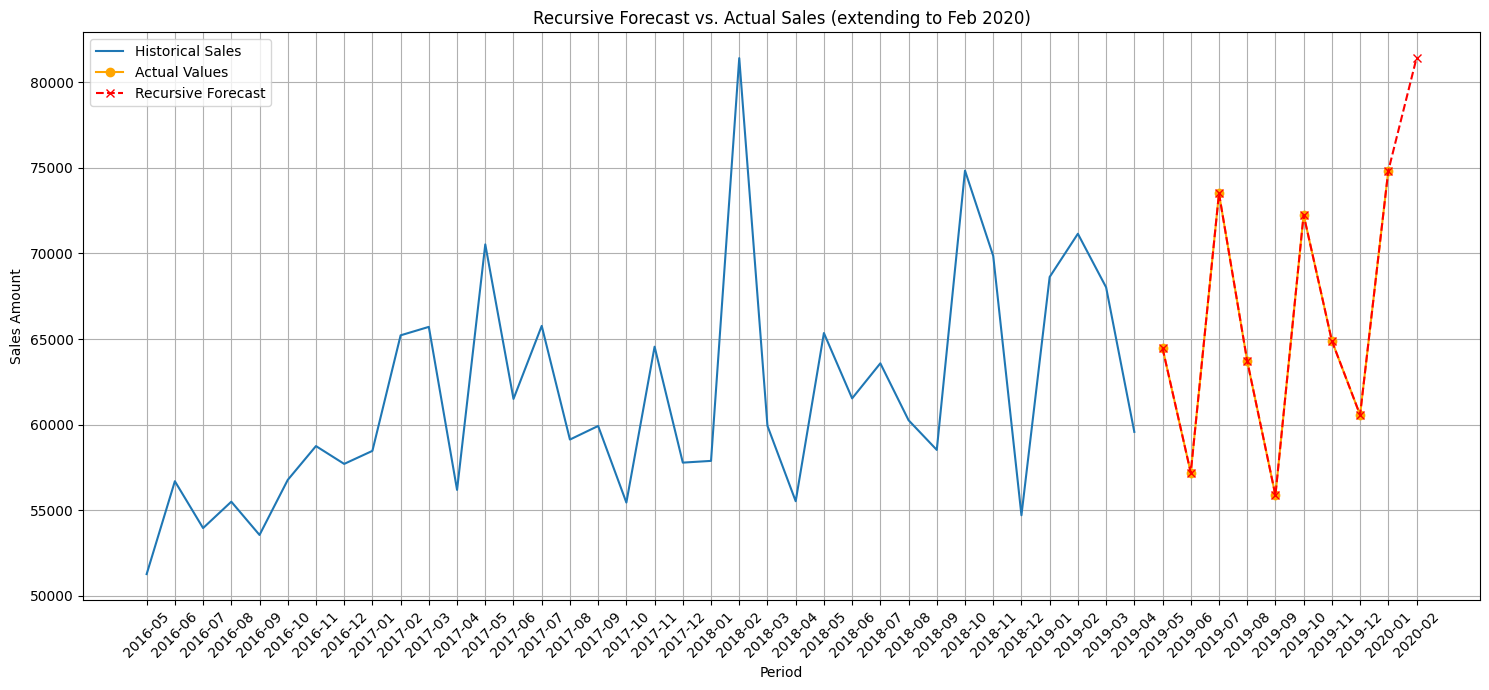

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# --- 1. Data Import and Preparation Functions ---
def import_data():
    """Imports and pivots the data to get a time series of total sales."""
    df = pd.read_excel('https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx', parse_dates=['SalesDate'])
    df['Year'] = pd.DatetimeIndex(df['SalesDate']).year
    df['Month'] = pd.DatetimeIndex(df['SalesDate']).month
    df["Period"] = df["Year"].astype(str) + "-" + df["Month"].astype(str)
    df["Period"] = pd.to_datetime(df["Period"]).dt.strftime("%Y-%m")
    df_pivoted = pd.pivot_table(data=df, values="SalesAmount", columns="Period", aggfunc='sum', fill_value=0)
    return df_pivoted

def datasets(df, x_len=12, y_len=1):
    """Creates training sequences from the entire historical data."""
    D = df.values
    periods = D.shape[1]

    loops = periods + 1 - x_len - y_len
    train = []
    for col in range(loops):
        train.append(D[:, col:col + x_len + y_len])
    train = np.vstack(train)
    X_train, Y_train = np.split(train, [x_len], axis=1)

    Y_train = Y_train.ravel()

    return X_train, Y_train

# --- 2. Load Data and Train the Model ---
df = import_data()
X_train_full, Y_train_full = datasets(df)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_full, Y_train_full)

print("Model has been trained on all available historical data.")

# Get the initial input data (the 12 months before May 2019)
last_12_months = df.loc[:, :'2019-04'].iloc[:, -12:]
#  Start with a 1D array by using .flatten()
current_input = last_12_months.values.flatten()

# List to store our predictions
predictions = []

# Define the forecast periods, including the new date
n_forecast_steps = 10
forecast_periods = pd.date_range(start='2019-05-01', periods=n_forecast_steps, freq='MS').strftime("%Y-%m").tolist()

print(f"Forecasting for {n_forecast_steps} months, from {forecast_periods[0]} to {forecast_periods[-1]}...")

for _ in range(n_forecast_steps):
    # Reshape the 1D input to the 2D shape the model expects
    current_input_reshaped = current_input.reshape(1, -1)

    # Predict the next value
    next_prediction = regressor.predict(current_input_reshaped)[0]

    # Store the prediction
    predictions.append(next_prediction)

    # Update the 1D array using 1D slicing
    # Drop the first month and append the new prediction
    current_input = np.append(current_input[1:], next_prediction)

# --- 4. Create a Comparison DataFrame ---
results_df = pd.DataFrame({
    'Period': forecast_periods,
    'Prediction': predictions
})

# Get actual values where they exist
actuals = []
for period in forecast_periods:
    if period in df.columns:
        actuals.append(df[period].values[0])
    else:
        actuals.append(np.nan) # Use NaN for dates with no actual data

results_df['Actual'] = actuals

print("\n--- Forecast vs. Actual Values (including future) ---")
print(results_df.fillna('').to_string(index=False))


# --- 5. Visualization ---
plt.figure(figsize=(15, 7))
# Plot historical data
history_to_plot = df.loc[:, :'2019-04'].T
history_to_plot.columns = ['Historical Sales']
plt.plot(history_to_plot.index, history_to_plot['Historical Sales'], label='Historical Sales')

# Plot the actual values from the test period
plt.plot(results_df['Period'], results_df['Actual'], label='Actual Values', color='orange', marker='o')

# Plot the forecasted values
plt.plot(results_df['Period'], results_df['Prediction'], label='Recursive Forecast', color='red', linestyle='--', marker='x')

plt.title('Recursive Forecast vs. Actual Sales (extending to Feb 2020)')
plt.xlabel('Period')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Model has been trained on all available historical data.
Forecasting the next 6 months, starting from 2020-02...

--- 6-Month Sales Forecast ---
 Period  Prediction Actual
2020-02     81414.0       
2020-03     59926.0       
2020-04     59575.0       
2020-05     65351.0       
2020-06     58522.0       
2020-07     74828.0       


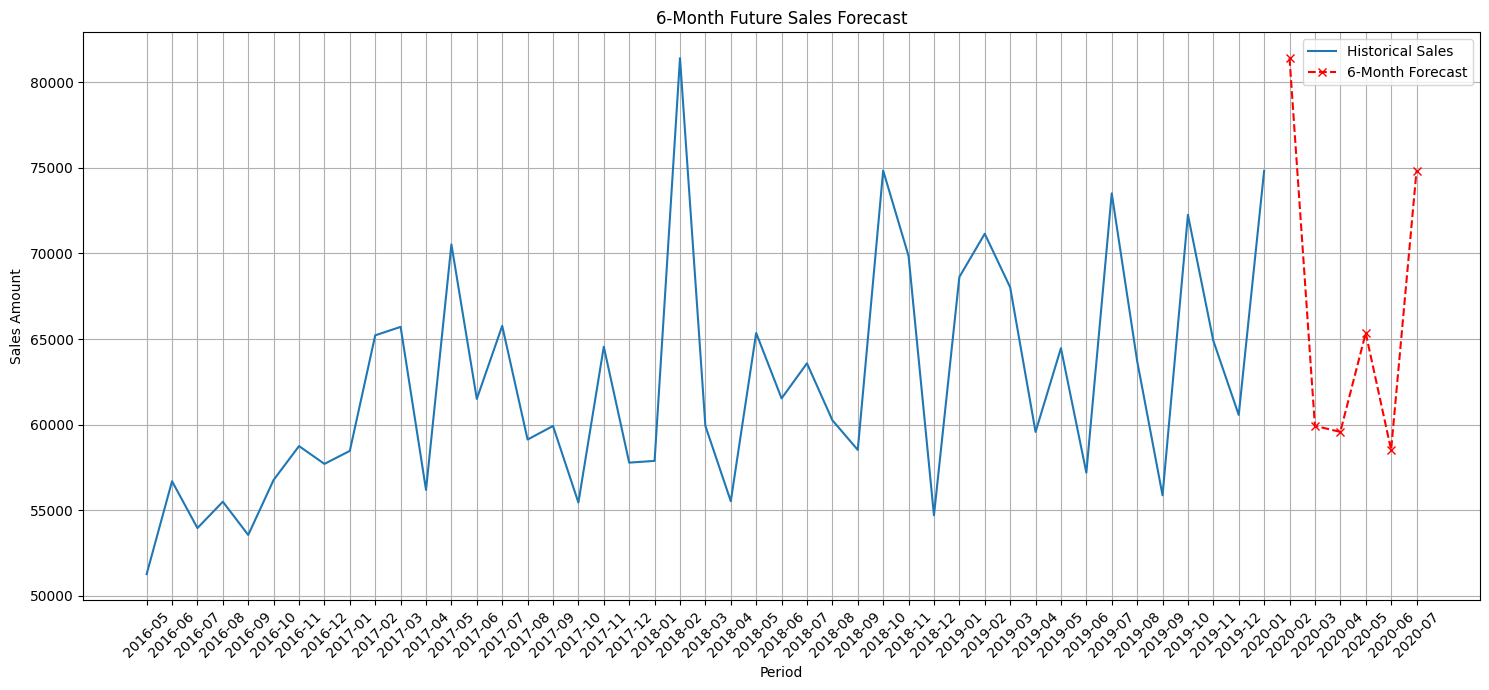

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# --- 1. Data Import and Preparation Functions ---
def import_data():
    """Imports and pivots the data to get a time series of total sales."""
    df = pd.read_excel('https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx', parse_dates=['SalesDate'])
    df['Year'] = pd.DatetimeIndex(df['SalesDate']).year
    df['Month'] = pd.DatetimeIndex(df['SalesDate']).month
    df["Period"] = df["Year"].astype(str) + "-" + df["Month"].astype(str)
    df["Period"] = pd.to_datetime(df["Period"]).dt.strftime("%Y-%m")
    df_pivoted = pd.pivot_table(data=df, values="SalesAmount", columns="Period", aggfunc='sum', fill_value=0)
    return df_pivoted

def datasets(df, x_len=12, y_len=1):
    """Creates training sequences from the entire historical data."""
    D = df.values
    periods = D.shape[1]

    loops = periods + 1 - x_len - y_len
    train = []
    for col in range(loops):
        train.append(D[:, col:col + x_len + y_len])
    train = np.vstack(train)
    X_train, Y_train = np.split(train, [x_len], axis=1)

    Y_train = Y_train.ravel()

    return X_train, Y_train

# --- 2. Load Data and Train the Model ---
df = import_data()
X_train_full, Y_train_full = datasets(df)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_full, Y_train_full)

print("Model has been trained on all available historical data.")

# --- 3. Implement 6-Month Recursive Forecast ---

# Get the last 12 months of ACTUAL data from the dataset
# This will be the input to predict the first future month (Feb 2020)
last_12_months = df.iloc[:, -12:]
current_input = last_12_months.values.flatten()

# List to store our predictions
predictions = []

# Define the number of future months to predict
n_forecast_steps = 6
# Generate the date labels for our forecast period
last_known_date = df.columns[-1]
forecast_periods = pd.date_range(start=last_known_date, periods=n_forecast_steps + 1, freq='MS')[1:].strftime("%Y-%m").tolist()


print(f"Forecasting the next {n_forecast_steps} months, starting from {forecast_periods[0]}...")

for _ in range(n_forecast_steps):
    # Reshape the 1D input to the 2D shape the model expects
    current_input_reshaped = current_input.reshape(1, -1)

    # Predict the next value
    next_prediction = regressor.predict(current_input_reshaped)[0]

    # Store the prediction
    predictions.append(next_prediction)

    # Update the input for the next loop by rolling forward
    current_input = np.append(current_input[1:], next_prediction)

# --- 4. Create a Results DataFrame ---
results_df = pd.DataFrame({
    'Period': forecast_periods,
    'Prediction': predictions
})

# Since this is a pure forecast, the 'Actual' column will be empty
results_df['Actual'] = np.nan

print("\n--- 6-Month Sales Forecast ---")
print(results_df.fillna('').to_string(index=False))

# --- 5. Visualization ---
plt.figure(figsize=(15, 7))

# Plot all historical data
plt.plot(df.columns, df.values.flatten(), label='Historical Sales')

# Plot the forecasted values
plt.plot(results_df['Period'], results_df['Prediction'], label=f'{n_forecast_steps}-Month Forecast', color='red', linestyle='--', marker='x')

plt.title('6-Month Future Sales Forecast')
plt.xlabel('Period')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Over- und Underfitting
Die Ergebnisse des Decision Tree Regressors zeigen eine R² von 99.81% auf dem Trainingsset und nur 82.74% auf dem Testset. Dies ist ein perfektes Beispiel für Overfitting:   
Das Modell hat die Trainingsdaten auswendig gelernt, anstatt die zugrundeliegenden Muster zu erkennen.

In [ ]:
# Display the tree
from sklearn import tree
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_11 <= 2117.50
|   |--- feature_8 <= 303.50
|   |   |--- feature_11 <= 56.50
|   |   |   |--- feature_10 <= 17.50
|   |   |   |   |--- feature_11 <= 7.50
|   |   |   |   |   |--- feature_7 <= 5.50
|   |   |   |   |   |   |--- feature_9 <= 2.50
|   |   |   |   |   |   |   |--- feature_10 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_8 <= 49.50
|   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 388.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 40
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  388.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 33
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |  

--- Generating Tree Image ---


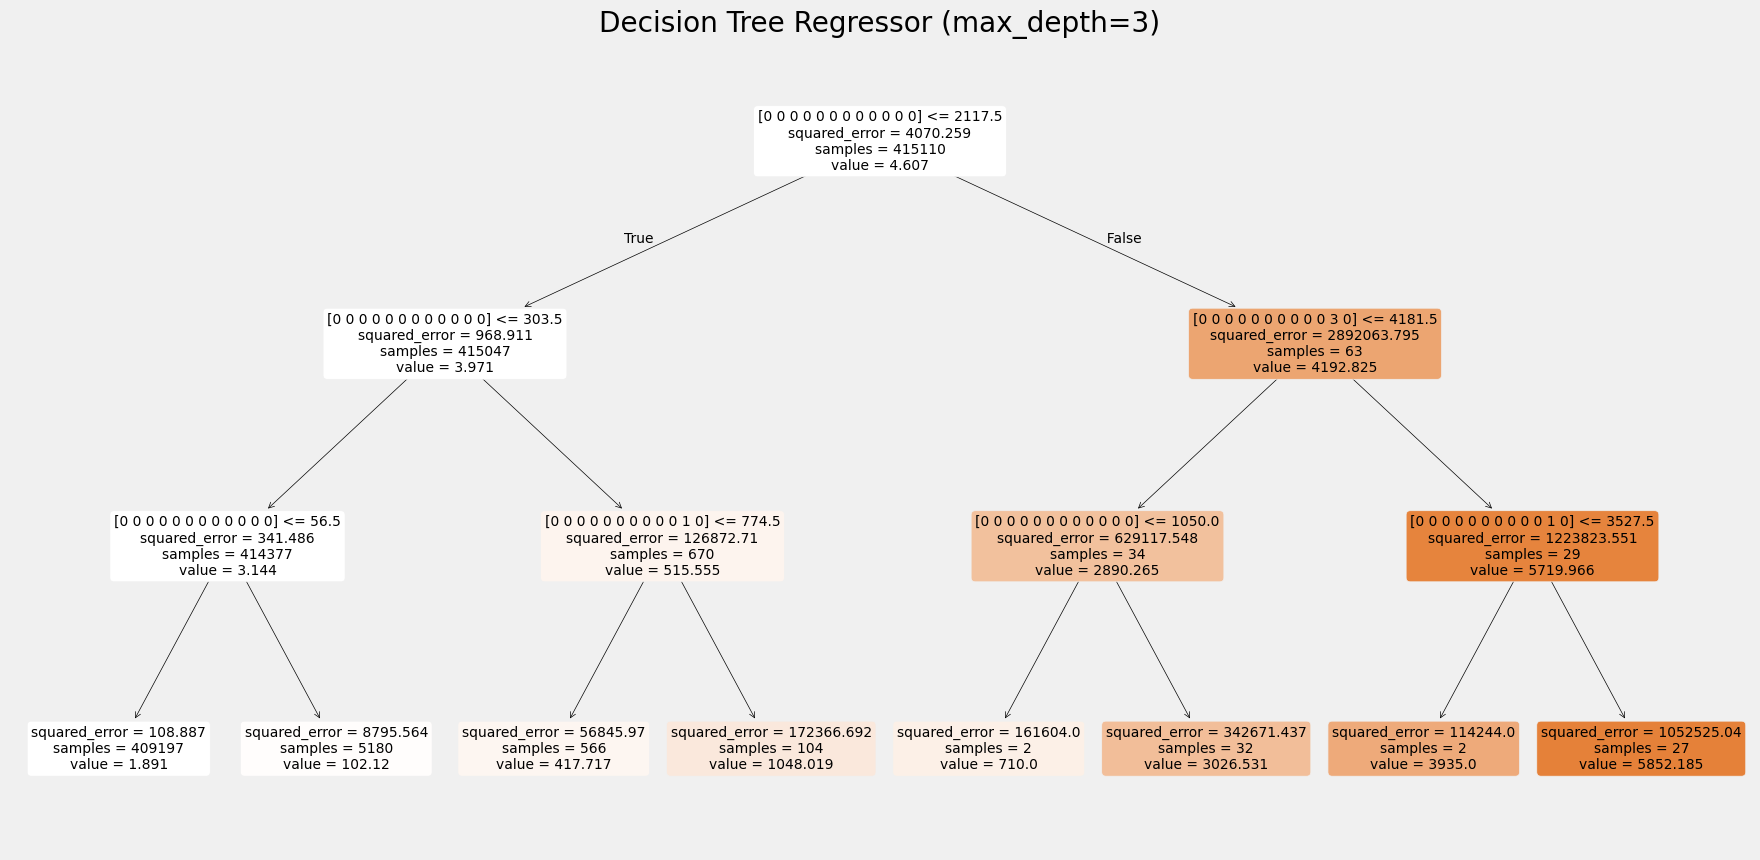

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

# Assume X_train and Y_train are already loaded

# --- FIX: Define and train 'simple_tree' before plotting ---
# Create a new model with a limited depth to make it readable
simple_tree = DecisionTreeRegressor(max_depth=3, random_state=0)

# Train the model
simple_tree.fit(X_train, Y_train)


# --- 3. Output the Simple Tree as an Image ---
print("--- Generating Tree Image ---")
plt.figure(figsize=(20, 10))

# Now this line will work because 'simple_tree' exists
tree.plot_tree(simple_tree,
               feature_names=X_train,
               filled=True,
               rounded=True,
               fontsize=10)

plt.title("Decision Tree Regressor (max_depth=3)")
plt.show()

In [ ]:
#DecisionTree Regressor Optimization
max_depth = list(range(5,11))
max_depth.append(None)
min_samples_leaf = range(5,20)

param_dist = {"max_depth": max_depth,
              "min_samples_leaf": min_samples_leaf}

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

tree = DecisionTreeRegressor()
tree_cv = RandomizedSearchCV(tree, param_dist, n_jobs=-1, cv=10, verbose=1, n_iter=1, scoring="neg_mean_absolute_error")#n_iter=100
tree_cv.fit(X_train,Y_train)

print("Tuned Regression Tree Parameters:",tree_cv.best_params_)


Y_train_pred = tree_cv.predict(X_train)
MAEDTRegopt_test = np.mean(abs(Y_train - Y_train_pred))/np.mean(Y_train)
print("Tree on training set MAE%:",round(MAEDTRegopt_test*100,1))

Y_test_pred = tree_cv.predict(X_test)
MAEDTRegopt_test = np.mean(abs(Y_test - Y_test_pred))/np.mean(Y_test)
print("Tree on test set MAE%:",round(MAEDTRegopt_test*100,1))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Tuned Regression Tree Parameters: {'min_samples_leaf': 9, 'max_depth': 6}
Tree on training set MAE%: 61.8
Tree on test set MAE%: 64.6


## [Prophet Sales](https://facebook.github.io/prophet/docs/quick_start.html#python-api)

In [ ]:
pip install prophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

%matplotlib inline

data =  pd.read_excel("https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx")
df3=data.drop(columns=[ 'Customer', 'SalesItem','SalesTransactionID','SalesValue'])
df3['SalesDate'] = pd.to_datetime(df3['SalesDate'])
df3 = df3.set_index('SalesDate')
daily_df = df3.resample('MS').sum()# M End of month, MS start of month vs D daily ws weekly w,
d_df = daily_df.reset_index().dropna()

In [ ]:
d_df.columns = ['ds', 'y']
d_df.head()

ds      y
0 2016-05-01  51265
1 2016-06-01  56692
2 2016-07-01  53954
3 2016-08-01  55496
4 2016-09-01  53552

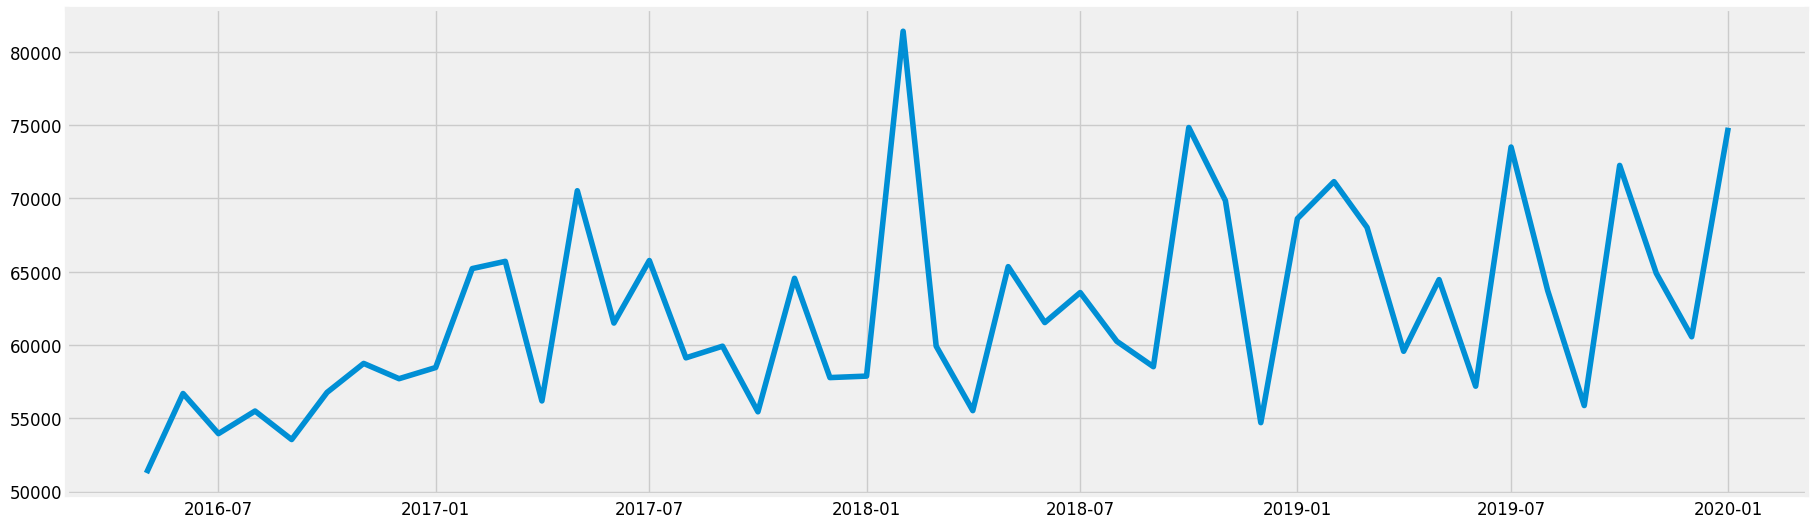

In [ ]:
d_df.columns = ['ds', 'y']
fig = plt.figure(facecolor='w', figsize=(20, 6))
plt.plot(d_df.ds, d_df.y)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6ysfeat/vxd1m1cw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6ysfeat/u5xasd40.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57223', 'data', 'file=/tmp/tmpd6ysfeat/vxd1m1cw.json', 'init=/tmp/tmpd6ysfeat/u5xasd40.json', 'output', 'file=/tmp/tmpd6ysfeat/prophet_model8t0oq46m/prophet_model-20250813125750.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:57:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:57:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


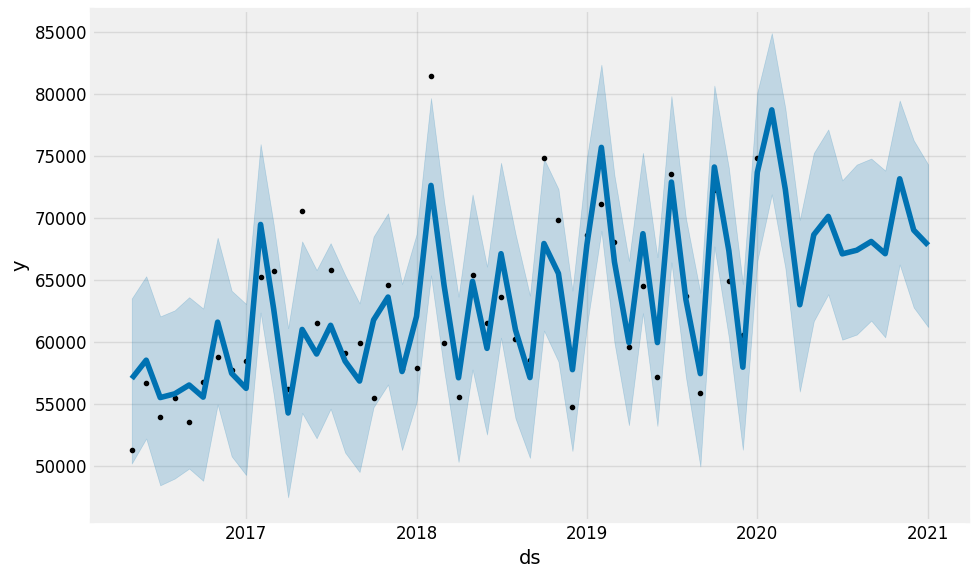

In [ ]:
m = Prophet(seasonality_mode='additive',interval_width=0.95).fit(d_df) #additive vs multiplicative seasonality, 95% Konfidenzintervall
future = m.make_future_dataframe(periods=12, freq='MS')# vs just periods=365 --> which works well for weekly and daily
fcst = m.predict(future)
fig = m.plot(fcst)

In [ ]:
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
fig = plot_plotly(m,fcst)
#py.iplot(fig)
fig.show(renderer="colab")

In [ ]:
m = Prophet()
m.fit(d_df)
future = m.make_future_dataframe(periods=12, freq='MS') #periods=12, freq='MS' for monthly start month vs periods=365 for daily and weekly
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6ysfeat/_gpzcbey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6ysfeat/3u1u7wib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61855', 'data', 'file=/tmp/tmpd6ysfeat/_gpzcbey.json', 'init=/tmp/tmpd6ysfeat/3u1u7wib.json', 'output', 'file=/tmp/tmpd6ysfeat/prophet_modelvkff73yi/prophet_model-20250813125753.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:57:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:57:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds          yhat    yhat_lower    yhat_upper
52 2020-09-01  68091.081757  63338.589384  72371.671671
53 2020-10-01  67106.203837  62741.337641  71640.132552
54 2020-11-01  73151.432362  69050.829342  77357.243903
55 2020-12-01  69011.079802  64684.215907  73458.769994
56 2021-01-01  67792.268206  63324.751514  72203.520092

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-90:]

ds          yhat    yhat_lower    yhat_upper
0  2016-05-01  57026.721375  52488.458952  61595.012369
1  2016-06-01  58512.905682  54118.191349  63079.047065
2  2016-07-01  55496.794025  50953.946100  59739.113084
3  2016-08-01  55797.478235  51691.204068  60488.979662
4  2016-09-01  56509.017147  52099.155507  60968.622616
5  2016-10-01  55531.013624  51039.234230  60023.207386
6  2016-11-01  61583.345693  57338.908749  66083.225411
7  2016-12-01  57449.867506  53218.625200  61883.257802
8  2017-01-01  56237.919895  51756.459061  60541.381548
9  2017-02-01  69467.467984  64828.824332  73847.274501
10 2017-03-01  62647.510922  57897.364770  66716.451014
11 2017-04-01  54249.648210  49992.625934  58636.911861
12 2017-05-01  60992.097575  56536.051032  65510.049024
13 2017-06-01  59010.524180  54403.764243  63552.268149
14 2017-07-01  61329.151934  56762.063089  65818.698348
15 2017-08-01  58439.809380  54185.189445  62781.729895
16 2017-09-01  56827.047535  52275.098183  61155.490159
17 2017-10-01  61755.239083  57553.572963  66288.877896
18 2017-11-01  63607.577468  59056.223060  68037.533884
19 2017-12-01  57598.607552  52787.573593  61877.298558
20 2018-01-01  62038.233270  57727.690423  66458.579160
21 2018-02-01  72616.646624  68185.550987  77413.463552
22 2018-03-01  64562.279849  59912.852066  69332.634153
23 2018-04-01  57093.138266  52909.537256  61695.909338
24 2018-05-01  64876.288470  60151.144455  69286.988848
25 2018-06-01  59465.781272  54811.657823  64086.718516
26 2018-07-01  67107.527773  62670.538083  71633.061883
27 2018-08-01  60956.546003  56643.111472  65403.711257
28 2018-09-01  57111.787713  52663.441908  61593.799271
29 2018-10-01  67927.101003  63327.140730  72273.411994
30 2018-11-01  65513.207430  60906.266112  69991.468247
31 2018-12-01  57747.589022  53541.900111  62150.837262
32 2019-01-01  67837.812692  63445.936497  72124.064052
33 2019-02-01  75687.586920  71665.599711  80566.276288
34 2019-03-01  66441.597684  62216.089808  70899.806852
35 2019-04-01  59934.361247  55478.702929  64420.574100
36 2019-05-01  68722.219137  64060.249169  72934.139898
37 2019-06-01  59932.916029  55533.164907  64343.036295
38 2019-07-01  72889.051174  68315.734547  77367.565154
39 2019-08-01  63413.550957  59194.876106  67644.475488
40 2019-09-01  57427.646256  53044.226246  61968.823692
41 2019-10-01  74102.746601  69568.624785  78343.604511
42 2019-11-01  67355.055762  62845.152483  71591.265312
43 2019-12-01  57946.895644  53748.827812  62350.117716
44 2020-01-01  73675.111243  68840.442374  78248.981769
45 2020-02-01  78714.384096  74206.066663  83371.125539
46 2020-03-01  72297.566288  68098.969399  76757.372234
47 2020-04-01  62986.118235  58624.604130  67339.491890
48 2020-05-01  68636.971088  64064.636882  73172.947016
49 2020-06-01  70116.051821  65797.312544  74380.666816
50 2020-07-01  67093.065754  62499.469142  71364.082114
51 2020-08-01  67386.646409  62573.043899  71862.699709
52 2020-09-01  68091.081757  63338.589384  72371.671671
53 2020-10-01  67106.203837  62741.337641  71640.132552
54 2020-11-01  73151.432362  69050.829342  77357.243903
55 2020-12-01  69011.079802  64684.215907  73458.769994
56 2021-01-01  67792.268206  63324.751514  72203.520092

In [ ]:
# # Use this, if you want to export the results to Excel
# ForecastExcel=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-90:]
# ForecastExcel.to_excel("ProphetResultsExport.xlsx")

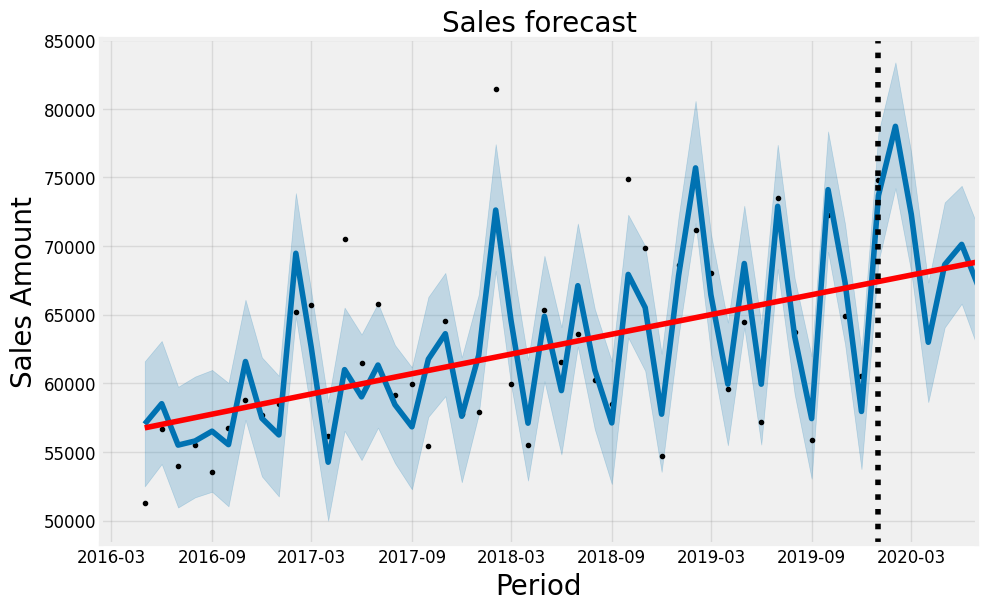

In [ ]:
from datetime import datetime, timedelta
from prophet.plot import add_changepoints_to_plot #trend line
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast) #trend line
datenow = datetime(2020, 1, 1)
dateend = datenow + timedelta(days=180)
datestart = dateend - timedelta(days=1600)
plt.xlim([datestart, dateend])
plt.title("Sales forecast", fontsize=20)
plt.xlabel("Period", fontsize=20)
plt.ylabel("Sales Amount", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

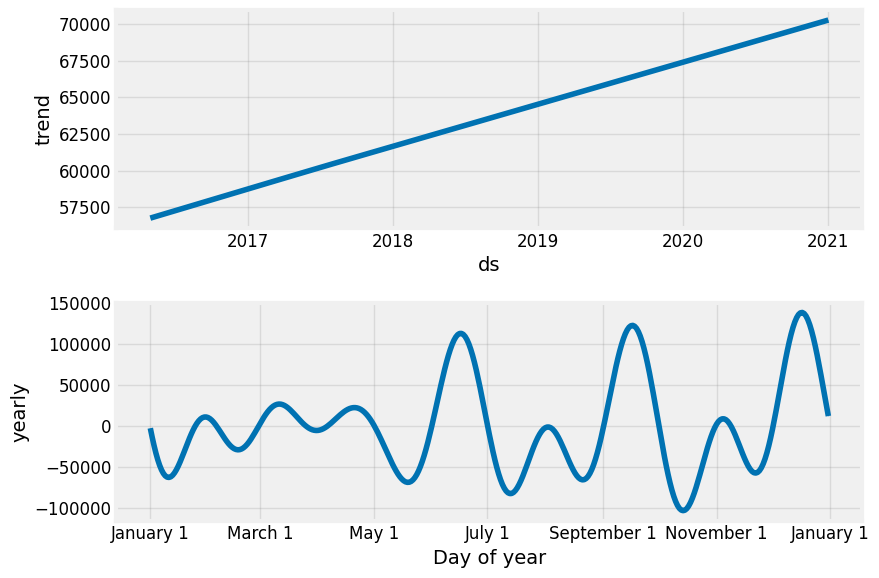

In [ ]:
fig2 = m.plot_components(forecast)

Durch **Kreuzvalidierung von Zeitreihenmodellen** und der anschließenden Bewertung der Prognosegenauigkeit wird simuliert, wie gut das **Prophet-Modell** in der Vergangenheit abgeschnitten hätte, um seine Leistung für die Zukunft zu beurteilen.


### Kreuzvalidierung (`cross_validation`)

Kreuzvalidierung ist eine Methode, um die Vorhersagequalität eines Modells zu testen, indem man es auf Daten testet, die es noch nie zuvor gesehen hat.

Die Funktion `cross_validation` führt diese Bewertung  durch:
* **`m`**: Dies ist unser bereits trainiertes Prophet-Modell.
* **`horizon='90 days'`**: Dies gibt an, wie weit in die Zukunft wir mit jeder Vorhersage blicken wollen. In diesem Beispiel werden Vorhersagen für 90 Tage nach jedem "Cutoff" (Stichtag) gemacht.
* Die Kreuzvalidierung kann noch detaillierter konfiguriert werden.
    * **`initial`**: Die Menge der anfänglichen Daten, die zum Trainieren des Modells verwendet werden.
    * **`period`**: Das Zeitintervall, um das die Cutoffs verschoben werden.



Prophet teilt die Zeitreihe in mehrere Trainings- und Test-Sets auf. Es startet mit einem Trainingsset, macht eine Vorhersage für den definierten Horizont, verschiebt dann den Stichtag um den angegebenen Zeitraum und wiederholt den Prozess. Dies geschieht so lange, bis das Ende der Daten erreicht ist.




In [ ]:

from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='90 days')
#df_cv = cross_validation(m, initial='1095 days', period='30 days', horizon = '60 days')#365 days = 1year
#do cross-validation to assess prediction performance on a horizon of 60 days, starting with 1095 days of training data in
#the first cutoff and then making predictions every 30 days. This corresponds to x total forecasts.
#initial: how many days for training
df_p = performance_metrics(df_cv)
df_p.head(5)
#mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE),
#and coverage of the yhat_lower and yhat_upper estimates.

#The performance_metrics utility can be used to compute some useful statistics of the
#prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff
#(how far into the future the prediction was). The statistics computed are mean squared error (MSE),
#root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE),
#and coverage of the yhat_lower and yhat_upper estimates. These are computed on a rolling window of the predictions
#in df_cv after sorting by horizon (ds minus cutoff). By default 10% of the predictions will be included in each window,
#but this can be changed with the rolling_window argument.

INFO:prophet:Making 20 forecasts with cutoffs between 2017-05-31 00:00:00 and 2019-10-03 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6ysfeat/xo62bkr4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6ysfeat/0bjhhkes.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86076', 'data', 'file=/tmp/tmpd6ysfeat/xo62bkr4.json', 'init=/tmp/tmpd6ysfeat/0bjhhkes.json', 'output', 'file=/tmp/tmpd6ysfeat/prophet_modelrd7dvd5b/prophet_model-20250813125755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:57:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:58:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6ysfeat/3t8d7crd.json
DEBUG:cmdstanpy:input tempfil

horizon           mse          rmse           mae      mape     mdape  \
0  8 days  2.305049e+09  48010.924142  31789.753749  0.524909  0.313178   
1  9 days  3.162377e+08  17783.072173  12064.491832  0.202048  0.072339   
2 11 days  1.725253e+08  13134.887633   8441.914769  0.141495  0.072339   
3 13 days  2.108253e+07   4591.572086   4099.371860  0.068574  0.068229   
4 17 days  2.820824e+07   5311.143128   4662.354987  0.078607  0.068229   

      smape  coverage  
0  0.359932  0.000000  
1  0.168517  0.166667  
2  0.123650  0.166667  
3  0.067504  0.333333  
4  0.075609  0.333333

In [ ]:
#do cross-validation to assess prediction performance on a horizon of 60 days, starting with 1095 days of training data in
#the first cutoff and then making predictions every 30 days. This corresponds to x total forecasts.
#initial: how many days for training
df_cv.head(20)
#cross-validation to assess prediction performance on a horizon of 60 days, starting with 1095 days/3years of training data in the first cutoff and then making predictions every 30 days. On this >3 year time series, this corresponds to ? total forecasts.
# y is actual, yhat is predicted value

ds           yhat     yhat_lower     yhat_upper      y     cutoff
0  2017-06-01  169753.725715  169595.159059  169905.786313  61501 2017-05-31
1  2017-07-01   99186.601558   98679.270017   99662.553571  65768 2017-05-31
2  2017-08-01   77952.361063   76913.376498   78817.272215  59127 2017-05-31
3  2017-08-01   67144.475733   66755.302308   67485.706829  59127 2017-07-15
4  2017-09-01   66846.883567   65580.163784   67973.610396  59921 2017-07-15
5  2017-10-01   86795.951536   84375.832718   89037.185827  55445 2017-07-15
6  2017-09-01   44534.205071   43670.349028   45435.465626  59921 2017-08-29
7  2017-10-01   75716.490643   72980.363324   78662.256474  55445 2017-08-29
8  2017-11-01   75925.330409   71009.836440   81511.522975  64553 2017-08-29
9  2017-11-01   97813.351077   97813.348523   97813.353897  64553 2017-10-13
10 2017-12-01   31323.576246   31323.568252   31323.585508  57779 2017-10-13
11 2018-01-01   80899.110287   80899.094305   80899.127967  57880 2017-10-13
12 2017-12-01   79132.476956   79123.312295   79142.998417  57779 2017-11-27
13 2018-01-01   66091.752283   66061.059533   66125.378712  57880 2017-11-27
14 2018-02-01   71681.323090   71625.195083   71742.542780  81414 2017-11-27
15 2018-02-01   87846.562806   87846.445614   87846.718756  81414 2018-01-11
16 2018-03-01   77353.224907   77352.823254   77353.714431  59926 2018-01-11
17 2018-04-01   25492.818839   25491.987024   25493.752659  55524 2018-01-11
18 2018-03-01   97100.357916   97091.011353   97112.421693  59926 2018-02-25
19 2018-04-01   11188.732213   11157.873864   11228.054343  55524 2018-02-25


### Leistungsmetriken (`performance_metrics`)

Die Funktion `performance_metrics` nimmt die Ergebnisse aus der Kreuzvalidierung (`df_cv`) und berechnet statistische Metriken, um zu bewerten, wie gut die Vorhersagen waren.

Sie misst, wie weit die Vorhersagen von den tatsächlichen Werten entfernt waren. Es werden verschiedene Metriken berechnet:
* **MSE (Mean Squared Error)**: Misst den durchschnittlichen quadrierten Fehler. Größere Fehler werden stärker bestraft.
* **RMSE (Root Mean Squared Error)**: Die Wurzel des MSE, die in der gleichen Einheit wie die ursprünglichen Daten gemessen wird. Dies ist oft leichter zu interpretieren.
* **MAE (Mean Absolute Error)**: Misst den durchschnittlichen absoluten Fehler. Alle Fehler werden gleich gewichtet.
* **MAPE (Mean Absolute Percent Error)**: Der durchschnittliche absolute prozentuale Fehler, der besonders nützlich ist, um die relative Genauigkeit der Vorhersage zu verstehen.
* **Coverage**: Dies bewertet, wie oft die tatsächlichen Werte innerhalb der vorhergesagten Konfidenzintervalle (`yhat_lower` und `yhat_upper`) lagen.

Die `performance_metrics` Funktion berechnet diese Werte für verschiedene Horizonte, um zu sehen, ob die Vorhersagegenauigkeit abnimmt, je weiter man in die Zukunft blickt. Dies hilft uns zu verstehen, wie zuverlässig die Prognosen für kurze im Vergleich zu längeren Zeiträumen sind.

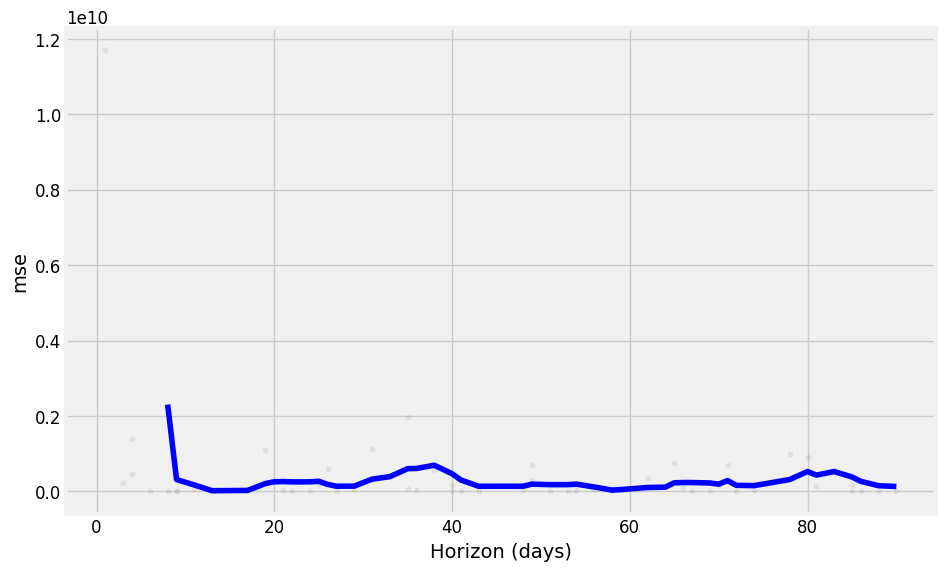

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mse')

In [ ]:
# # The model should be re-trained when new data becomes available. There is no point to re-train model, if data is not changed.
# # Save model instead and use it again, when user wants to call predict function. Use pickle functionality for that:


# by default, the model will be saved in your users folder
import pickle
with open('forecast_model.pckl', 'wb') as fout:
    pickle.dump(m, fout)
with open('forecast_model.pckl', 'rb') as fin:
   m2 = pickle.load(fin)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-90:]

ds          yhat    yhat_lower    yhat_upper
0  2016-05-01  57026.721375  52488.458952  61595.012369
1  2016-06-01  58512.905682  54118.191349  63079.047065
2  2016-07-01  55496.794025  50953.946100  59739.113084
3  2016-08-01  55797.478235  51691.204068  60488.979662
4  2016-09-01  56509.017147  52099.155507  60968.622616
5  2016-10-01  55531.013624  51039.234230  60023.207386
6  2016-11-01  61583.345693  57338.908749  66083.225411
7  2016-12-01  57449.867506  53218.625200  61883.257802
8  2017-01-01  56237.919895  51756.459061  60541.381548
9  2017-02-01  69467.467984  64828.824332  73847.274501
10 2017-03-01  62647.510922  57897.364770  66716.451014
11 2017-04-01  54249.648210  49992.625934  58636.911861
12 2017-05-01  60992.097575  56536.051032  65510.049024
13 2017-06-01  59010.524180  54403.764243  63552.268149
14 2017-07-01  61329.151934  56762.063089  65818.698348
15 2017-08-01  58439.809380  54185.189445  62781.729895
16 2017-09-01  56827.047535  52275.098183  61155.490159
17 2017-10-01  61755.239083  57553.572963  66288.877896
18 2017-11-01  63607.577468  59056.223060  68037.533884
19 2017-12-01  57598.607552  52787.573593  61877.298558
20 2018-01-01  62038.233270  57727.690423  66458.579160
21 2018-02-01  72616.646624  68185.550987  77413.463552
22 2018-03-01  64562.279849  59912.852066  69332.634153
23 2018-04-01  57093.138266  52909.537256  61695.909338
24 2018-05-01  64876.288470  60151.144455  69286.988848
25 2018-06-01  59465.781272  54811.657823  64086.718516
26 2018-07-01  67107.527773  62670.538083  71633.061883
27 2018-08-01  60956.546003  56643.111472  65403.711257
28 2018-09-01  57111.787713  52663.441908  61593.799271
29 2018-10-01  67927.101003  63327.140730  72273.411994
30 2018-11-01  65513.207430  60906.266112  69991.468247
31 2018-12-01  57747.589022  53541.900111  62150.837262
32 2019-01-01  67837.812692  63445.936497  72124.064052
33 2019-02-01  75687.586920  71665.599711  80566.276288
34 2019-03-01  66441.597684  62216.089808  70899.806852
35 2019-04-01  59934.361247  55478.702929  64420.574100
36 2019-05-01  68722.219137  64060.249169  72934.139898
37 2019-06-01  59932.916029  55533.164907  64343.036295
38 2019-07-01  72889.051174  68315.734547  77367.565154
39 2019-08-01  63413.550957  59194.876106  67644.475488
40 2019-09-01  57427.646256  53044.226246  61968.823692
41 2019-10-01  74102.746601  69568.624785  78343.604511
42 2019-11-01  67355.055762  62845.152483  71591.265312
43 2019-12-01  57946.895644  53748.827812  62350.117716
44 2020-01-01  73675.111243  68840.442374  78248.981769
45 2020-02-01  78714.384096  74206.066663  83371.125539
46 2020-03-01  72297.566288  68098.969399  76757.372234
47 2020-04-01  62986.118235  58624.604130  67339.491890
48 2020-05-01  68636.971088  64064.636882  73172.947016
49 2020-06-01  70116.051821  65797.312544  74380.666816
50 2020-07-01  67093.065754  62499.469142  71364.082114
51 2020-08-01  67386.646409  62573.043899  71862.699709
52 2020-09-01  68091.081757  63338.589384  72371.671671
53 2020-10-01  67106.203837  62741.337641  71640.132552
54 2020-11-01  73151.432362  69050.829342  77357.243903
55 2020-12-01  69011.079802  64684.215907  73458.769994
56 2021-01-01  67792.268206  63324.751514  72203.520092

Anomalien werden in dieser Funktion berechnet, indem der **tatsächliche Wert** (`fact`) mit den von Prophet vorhergesagten **Konfidenzintervallen** (`yhat_lower` und `yhat_upper`) verglichen wird. Ein Datenpunkt wird als Anomalie gekennzeichnet, wenn er **außerhalb dieses Vorhersagebereichs** liegt.


**Anomalien identifizieren**: Eine neue Spalte namens `anomaly` wird hinzugefügt und standardmäßig auf 0 gesetzt.
    * **Positive Anomalien**: Die Funktion sucht nach Zeilen, in denen der tatsächliche Wert (`fact`) **größer** ist als die obere Grenze der Prognose (`yhat_upper`). Diese Datenpunkte werden als positive Anomalien markiert, indem der `anomaly`-Wert auf `1` gesetzt wird.
    * **Negative Anomalien**: Umgekehrt werden Zeilen, in denen der tatsächliche Wert (`fact`) **kleiner** ist als die untere Grenze der Prognose (`yhat_lower`), als negative Anomalien markiert. Hier wird der `anomaly`-Wert auf `-1` gesetzt.

**Wichtigkeit der Anomalie berechnen**: Eine weitere Spalte namens `importance` wird eingeführt, um die Stärke der Anomalie zu quantifizieren.
    * Für positive Anomalien (`anomaly == 1`): Die Wichtigkeit wird als der prozentuale Unterschied zwischen dem tatsächlichen Wert und der oberen Grenze berechnet. Eine größere Differenz führt zu einem höheren Wichtigkeitswert.
    * Für negative Anomalien (`anomaly == -1`): Hier wird die Wichtigkeit als der prozentuale Unterschied zwischen der unteren Grenze und dem tatsächlichen Wert berechnet. Auch hier führt eine größere Abweichung zu einem höheren Wert.


In [ ]:

def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']

    return forecasted

In [ ]:
forecast.head(1)

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2016-05-01  56752.803846  52488.458952  61595.012369  56752.803846   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  56752.803846      273.917529            273.917529            273.917529   

       yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  273.917529    273.917529    273.917529                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  57026.721375

## Prophet in a loop

# Aufgabe: Erstellen Sie mit Hilfe von Prophet eine Artikelspezifische Vorhersage

In [ ]:
# Use this loop, if you want to prophet on all combinations in one stroke. The complete result set will be exported in one excel file in the end.

import pandas as pd
data = pd.read_excel("https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx")

from prophet import Prophet

import pandas as pd
#If you should receive an error "future is not defined" when running with your data, your SalesDate column in Excel might not be formatted as date.
gData = data.groupby(['SalesItem', 'SalesDate'])['SalesAmount'].sum() #.agg(F.collect_list("SalesAmount")).sort('SalesItem')
gData = gData.to_frame().reset_index()
itemlist = gData.SalesItem.unique()

m = Prophet()



fcst_all = pd.DataFrame()  # store all forecasts here
for x in itemlist:
    temp = gData[gData.SalesItem == x]
    temp = temp.drop(columns=[ 'SalesItem'])
    temp['SalesDate'] = pd.to_datetime(temp['SalesDate'])
    temp = temp.set_index('SalesDate')

    d_df = temp.resample('MS').sum()
    d_df = d_df.reset_index().dropna()
    d_df.columns = ['ds', 'y']
    #Geben Sier hier Ihren Code ein...


fcst_all.to_excel('ProphetFc.xlsx', index=False)

In [ ]:
fcst_all = pd.DataFrame()  # store all forecasts here
for x in itemlist:
    temp = gData[gData.SalesItem == x]
    temp = temp.drop(columns=[ 'SalesItem'])
    temp['SalesDate'] = pd.to_datetime(temp['SalesDate'])
    temp = temp.set_index('SalesDate')

    d_df = temp.resample('MS').sum()
    d_df = d_df.reset_index().dropna()
    d_df.columns = ['ds', 'y']
    try:
        m = Prophet(seasonality_mode='additive',interval_width=0.95).fit(d_df)
        future = m.make_future_dataframe(periods=12, freq='MS')
    except ValueError:
        pass

    fcst = m.predict(future)
    fcst['Artikel'] = x
    fcst['Fact'] = d_df['y'].reset_index(drop = True)
    fcst_all = pd.concat((fcst_all, fcst))
    print(x)
fcst_all.to_excel('ProphetFc.xlsx', index=False)

## LSTM beyond Testdata

Nun nutzen wir ein Long Short-Term Memory (LSTM)-Modell zur Vorhersage der Zeitreihendaten. LSTMs sind eine spezielle Art von rekurrenten neuronalen Netzen (RNNs), die sich besonders gut für die Verarbeitung und Vorhersage von Sequenzdaten eignen.


Im Gegensatz zu herkömmlichen neuronalen Netzen, die jeden Datenpunkt einzeln verarbeiten, können LSTMs die zeitliche Abfolge und die Abhängigkeiten in den Daten "verstehen" und sich daran erinnern. Ihre Architektur mit "Gattern" (Input, Forget, Output Gates) ermöglicht es ihnen, zu steuern, welche Informationen behalten und welche vergessen werden sollen.  Dies löst das Problem des "verschwindenden Gradienten", das bei klassischen RNNs auftritt und sie daran hindert, langfristige Abhängigkeiten zu lernen

Wobei wir nun nicht klassisch vorgehen, sondern stattdessen keine Trennung in Trainings- und Testdaten vornehmen. Stattdessen trainieren wir das Modell auf allen historischen Daten:

- Es gibt keine echte Metrik für Generalisierung (Out-of-Sample Performance).

- Wir wissen nicht, wie gut das Modell auf neue Daten reagiert.

- Prognosen könnten überoptimistisch sein (Overfitting-Gefahr).

In [ ]:
import pandas as pd

data = pd.read_excel("https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx",parse_dates=['SalesDate']) #data war df, und wurde in nächster zeile von df in data umgewandelt, falls das zu Fehler führt
df3=data.drop(columns=[ 'Customer', 'SalesItem','SalesTransactionID','SalesValue'])
df3['SalesDate'] = pd.to_datetime(df3['SalesDate'])

df3['SalesDate'] = pd.to_datetime(df3['SalesDate'])
df3 = df3.set_index('SalesDate')

daily_df = df3.resample('M').sum()#D

df4 = daily_df.reset_index().dropna()
df4 = df4.set_index('SalesDate')
df4.head()


SalesAmount
SalesDate              
2016-05-31        51265
2016-06-30        56692
2016-07-31        53954
2016-08-31        55496
2016-09-30        53552

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import warnings

warnings.filterwarnings("ignore")

train = df4

# Wendet Min-Max-Skalierung auf alle Daten an (kein Split) und bringt Werte in den Bereich [0,1] → wichtig für LSTM-Stabilität.
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

# Erzeugt aus der Zeitreihe Trainingssequenzen: Jede Eingabesequenz besteht aus 12 aufeinanderfolgenden Monaten (n_input). Target ist der nächste Monat.
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

# LSTM-Layer mit 200 Neuronen, relu-Aktivierung.
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
# Dropout 15 % → reduziert Overfitting.
model.add(Dropout(0.15))
# Dense-Layer mit 1 Neuron → liefert Vorhersage für den nächsten Punkt.
model.add(Dense(1))

# Training nutzt Adam-Optimizer und MSE-Loss.
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')
# Trainiert 800 Epochen auf dem Generator
history = model.fit(generator, epochs=800, verbose=1)

Epoch 1/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1869
Epoch 2/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0899
Epoch 3/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0838
Epoch 4/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0471
Epoch 5/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0492
Epoch 6/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0446
Epoch 7/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0543
Epoch 8/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0487
Epoch 9/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0455
Epoch 10/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0482
Epoch 11/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0411
Epoch 12/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0436
Epoch 13/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0596
Epoch 14/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0518
Epoch 15/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0524
Epoch 16/800
6/6 ━━

In [ ]:
import plotly.offline as pyoff
import plotly.graph_objs as go

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plot_data = [
    go.Scatter(
        x=hist['epoch'],
        y=hist['loss'],
        name='loss'
    )

]

plot_layout = go.Layout(
        title='Training loss'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
#pyoff.iplot(fig)
fig.show(renderer="colab")

In [ ]:
import plotly.offline as pyoff
import plotly.graph_objs as go
from pandas.tseries.offsets import DateOffset

pred_list = []
# Holt sich die letzten n_input (12) Monate
batch = train[-n_input:].reshape((1, n_input, n_features))
# Iterativ werden neue Werte vorhergesagt → autoregressiv (jeder neue Vorhersagewert wird direkt in die nächste Eingabesequenz eingefügt). Ergebnis: 12-Monats-Prognose.
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

# Define the future dates
add_dates = [df4.index[-1] + DateOffset(months=x) for x in range(0,n_input+1) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df4.columns)

# Rechnet Vorhersagen zurück in Originaleinheiten. Hängt sie an die Originaldaten → ergibt Zeitreihe mit historischen + prognostizierten Werten.
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df4,df_predict], axis=1)


plot_data = [
    go.Scatter(
        x=df_proj.index,
        y=df_proj['SalesAmount'],
        name='Actual'
    ),
    go.Scatter(
        x=df_proj.index,
        y=df_proj['Prediction'],
        name='Forecast'
    )
]

plot_layout = go.Layout(
        title='Sales Quantity prediction'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
#pyoff.iplot(fig)
fig.show(renderer="colab")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
plot_data = [
    go.Scatter(
        x=df_proj.index,
        y=df_proj['SalesAmount'],
        name='Actual'
    ),
    go.Scatter(
        x=df_proj.index,
        y=df_proj['Prediction'],
        name='Forecast'
    )
]

plot_layout = go.Layout(
        title='Sales Quantity prediction'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
#pyoff.iplot(fig)
fig.show(renderer="colab")

In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

ActFcast = pd.concat([df4,df_predict], axis=1)

ActFcast.tail(24)

SalesAmount    Prediction
2019-02-28      71152.0           NaN
2019-03-31      68024.0           NaN
2019-04-30      59575.0           NaN
2019-05-31      64466.0           NaN
2019-06-30      57192.0           NaN
2019-07-31      73512.0           NaN
2019-08-31      63722.0           NaN
2019-09-30      55871.0           NaN
2019-10-31      72258.0           NaN
2019-11-30      64899.0           NaN
2019-12-31      60565.0           NaN
2020-01-31      74828.0           NaN
2020-02-29          NaN  68946.281205
2020-03-31          NaN  63286.757625
2020-04-30          NaN  59348.949440
2020-05-31          NaN  65456.507054
2020-06-30          NaN  81827.807084
2020-07-31          NaN  65880.400813
2020-08-31          NaN  60526.688780
2020-09-30          NaN  62625.161190
2020-10-31          NaN  70332.504566
2020-11-30          NaN  75277.703537
2020-12-31          NaN  67058.532802
2021-01-31          NaN  71158.226471

# Aufgabe: LSTM mit klassischem 80/20 Split

In [ ]:
# Geben Sie hier Ihren Code ein...



















Um einen klassischen 80/20 Train-Test-Split für dieses Zeitreihenproblem durchzuführen, muss der Code so angepasst werden, dass die Daten in chronologischer Reihenfolge aufgeteilt werden. Für Zeitreihen ist ein zufälliges Splitting ungeeignet, da die zeitliche Abhängigkeit zerstört würde.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import warnings

warnings.filterwarnings("ignore")

# ------------------------------
# DATENLADEN & VORBEREITUNG
# ------------------------------
# Wichtig: Wir arbeiten mit genau EINER Zielspalte (z.B. 'SalesAmount'),
# weil n_features=1 gesetzt ist.
data = pd.read_excel(
    "https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx",
    parse_dates=['SalesDate']
)

# Entferne nicht benötigte Spalten; 'SalesAmount' behalten wir als Feature/Ziel.
# (Passe die Drop-Liste an, falls deine Datei etwas anders heißt.)
df3 = data.drop(columns=['Customer', 'SalesItem', 'SalesTransactionID', 'SalesValue'], errors='ignore')

# Stelle sicher, dass SalesDate DatetimeIndex ist
df3['SalesDate'] = pd.to_datetime(df3['SalesDate'])
df3 = df3.set_index('SalesDate')

# Auf Monatsbasis aggregieren
monthly_df = df3.resample('M').sum()

# -> Wähle exakt eine Spalte für das Modell (n_features=1).
# Falls deine Spalte anders heißt, HIER anpassen:
target_col = 'SalesAmount'
if target_col not in monthly_df.columns:
    raise ValueError(f"Erwartete Spalte '{target_col}' nicht gefunden. Verfügbare Spalten: {list(monthly_df.columns)}")

df4 = monthly_df[[target_col]].dropna()

# ------------------------------
# TRAIN / TEST SPLIT (chronologisch)
# ------------------------------
split_point = int(len(df4) * 0.8)
train_data = df4.iloc[:split_point]
test_data  = df4.iloc[split_point:]

print(f"Trainingsdaten-Größe: {len(train_data)}")
print(f"Testdaten-Größe: {len(test_data)}")

# ------------------------------
# SKALIERUNG (nur auf Train fitten)
# ------------------------------
scaler = MinMaxScaler()
scaler.fit(train_data.values)                 # fit nur auf Train
train_scaled = scaler.transform(train_data.values)
test_scaled  = scaler.transform(test_data.values)

# ------------------------------
# TIMESERIES GENERATORS
# ------------------------------
n_input = 12        # 12 Monate Kontext
n_features = 1
batch_size = 6

# Trainings-Generator (X=Train, y=Train, um nächstes Sample vorherzusagen)
train_gen = TimeseriesGenerator(train_scaled, train_scaled, length=n_input, batch_size=batch_size)

# TEST-Generator:
# Korrekt ist es, die letzten n_input Punkte aus dem Train mit dem Testconcat zu füttern,
# damit der erste Test-Input vollständig ist.
test_inputs = np.concatenate([train_scaled[-n_input:], test_scaled], axis=0)
test_gen = TimeseriesGenerator(test_inputs, test_inputs, length=n_input, batch_size=1)

# ------------------------------
# MODELL
# ------------------------------
model = Sequential()
# Tipp: Standard-Aktivierung bei LSTM ist 'tanh'; 'relu' kann instabil sein.
model.add(LSTM(200, input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# ------------------------------
# TRAINING
# ------------------------------
# Hinweis: 800 Epochen sind viel; starte ggf. mit 50–200 und nutze EarlyStopping.
history = model.fit(train_gen, epochs=200, verbose=1)

# ------------------------------
# EVALUATION
# ------------------------------
mse_test = model.evaluate(test_gen, verbose=0)
print(f"\nMean Squared Error (MSE) auf Testdaten: {mse_test:.6f}")

# ------------------------------
# FORECAST (n_input Schritte in die Zukunft)
# ------------------------------
# Skaliere den vollen Datensatz und nimm die letzten n_input Punkte als Startsequenz
full_scaled = scaler.transform(df4.values)
last_seq = full_scaled[-n_input:]               # Shape: (n_input, 1)
batch = last_seq.reshape((1, n_input, n_features))

pred_list = []
forecast_horizon = n_input  # z.B. 12 Monate in die Zukunft

for _ in range(forecast_horizon):
    # Vorhersage für den nächsten Punkt
    pred_scaled = model.predict(batch, verbose=0)  # Shape: (1, 1)
    # Liste der skalierten Vorhersagen sammeln (2D für inverse_transform später)
    pred_list.append(pred_scaled[0])               # -> (1,)
    # Neue Sequenz: schiebe um 1 nach links und hänge Vorhersage an (als 3D)
    batch = np.concatenate([batch[:, 1:, :], pred_scaled.reshape(1, 1, 1)], axis=1)

# Rückskalierung der Vorhersagen
pred_array_scaled = np.array(pred_list)            # Shape: (forecast_horizon, 1)
pred_array = scaler.inverse_transform(pred_array_scaled)

# Zukünftige Datenindizes erzeugen
from pandas.tseries.offsets import DateOffset
future_idx = [df4.index[-1] + DateOffset(months=i) for i in range(1, forecast_horizon + 1)]

df_predict = pd.DataFrame(pred_array, index=pd.DatetimeIndex(future_idx), columns=['Prediction'])

# Historisch + Prognose zusammenführen
df_proj = pd.concat([df4, df_predict], axis=1)

# ------------------------------
# PLOTTING (Plotly)
# ------------------------------
import plotly.graph_objs as go

plot_data = [
    go.Scatter(
        x=df_proj.index,
        y=df_proj[target_col],
        name='Actual'
    ),
    go.Scatter(
        x=df_proj.index,
        y=df_proj['Prediction'],
        name='Forecast'
    )
]

plot_layout = go.Layout(title='Sales Quantity Prediction')
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()


Trainingsdaten-Größe: 36
Testdaten-Größe: 9
Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.1723
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0512 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0533
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0671
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0693
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0489
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0652
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0464
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0534
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0517
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0406
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0421
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0518
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0490
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s